# Part 1: Probabilistic Models and Sequence Analysis

---

In [1]:
# Prices
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("Loading HMM data...")
url = 'https://drive.google.com/uc?id=1YBEwyZblijkXiMad3mqqmaWwgQpiVlKl'
data_hmm = pd.read_csv(url)
X = data_hmm.values
print("✓ Loaded HMM data")

Loading HMM data...
✓ Loaded HMM data


### Introducing Gaussian Mixture Models

---
<font color=blue>Q1:</font> <br><font color='blue'>
Consider the data matrix $X$ as a collection of independent and identically distributed (i.i.d.) observations $(X_1, \dots, X_T) \in \mathbb{R}^{T \times D}$.
Explain the parameterization of a Gaussian Mixture Model (GMM) with M=3 components for modeling the distribution of these D-dimensional vectors.
- What are the parameters of the model?
- What are the dimensions of each parameter?
- What are the constraints on these parameters?
</font>

---

### **Q1: GMM Parameterization**

Parameters of the model (GMM, with M = 3) Θ = (π,μ,Σ)

where $π$ = ($\pi_1$, $\pi_2$, $\pi_3$)

where $μ$ = ($\mu_1$, $\mu_2$, $\mu_3$)

where $Σ$ = ($\Sigma_1$, $\Sigma_2$, $\Sigma_3$)


Dimensions of each Parameter:

$\pi \in R^3$

$\mu_m \in R^D$ we have M = 3 so $\mu$ is $3 \times D$ arrays

$\Sigma_m \in R^{D \times D}$ we have M=3 so $\Sigma$ is 3 $D \times D$ matrices of the covariance

Constraints on each Parameter:

Non-negativity and must sum to 1:
$$
\pi_m \geq 0,\quad \sum_{m=1}^3 \pi_m = 1
$$

Positive definiteness of covariance matrices:
$$
\Sigma_m \succ 0,\quad \Sigma_m = \Sigma_m^\top,\quad m = 1, 2, 3
$$

In summary, the GMM density is:

$$
\begin{aligned}
p_{\theta}(x_i) &= \sum_{z_i} p_{\theta}(x_i, z_i) \\
                &= \sum_{z_i} p_{\theta}(x_i \mid z_i) \, p_{\theta}(z_i) \\
                &= \sum_{k=1}^{K} p_{\theta}(x_i \mid z_i = k) \, p_{\theta}(z_i = k) \\
                &= \sum_{k=1}^{K} \pi_k \, \mathcal{N}(x_i \mid \mu_k, \Sigma_k)
\end{aligned}
$$

---
<font color=blue>Q2:</font> <br><font color='blue'>
Derive the log-likelihood function $\log L(\theta | X)$ for a Gaussian Mixture Model with the observation matrix $X \in \mathbb{R}^{T \times D}$ and parameters $\theta = (\pi, \mu, \Sigma)$, where $\pi = (\pi_1, \pi_2, \pi_3)$ represents the mixture weights, $\mu = (\mu_1, \mu_2, \mu_3)$ the mean vectors, and $\Sigma = (\Sigma_1, \Sigma_2, \Sigma_3)$ the covariance matrices.

Explain how the Expectation-Maximization (EM) algorithm can be used to maximize this likelihood and learn the GMM parameters. What are the E-step and M-step in this context? Define any additional variables you introduce.
</font>

---

### **Q2: GMM Log-Likelihood & EM Algorithm**

We consider a Gaussian Mixture Model with $M = 3$ components and parameters:  
$\theta = (\pi, \mu, \Sigma) = \left( (\pi_1, \pi_2, \pi_3),\ (\mu_1, \mu_2, \mu_3),\ (\Sigma_1, \Sigma_2, \Sigma_3) \right)$


<br><br>

#### **Log-Likelihood Function:**

Given $X = \{x_1, \dots, x_T\}$ with $x_i \in \mathbb{R}^D$, the likelihood of the data under the GMM is:

$$
L(\theta \mid X) = \prod_{i=1}^T \sum_{k=1}^{3} \pi_k \cdot \frac{1}{(2\pi)^{D/2} |\Sigma_k|^{1/2}} \exp\left( -\frac{1}{2} (x_i - \mu_k)^\top \Sigma_k^{-1} (x_i - \mu_k) \right)
$$

Taking the log gives the log-likelihood:

$$
\log L(\theta \mid X) = \sum_{i=1}^T \log \left( \sum_{k=1}^{3} \pi_k \cdot \frac{1}{(2\pi)^{D/2} |\Sigma_k|^{1/2}} \exp\left( -\frac{1}{2} (x_i - \mu_k)^\top \Sigma_k^{-1} (x_i - \mu_k) \right) \right)
$$

<br><br>

#### **Expectation-Maximization (EM) Algorithm:**

To maximize $\log L(\theta \mid X)$, we apply the EM algorithm.

**E-step** (compute responsibilities):

$$
\gamma_{ik} = p(z_i = k \mid x_i,\ \theta) = \frac{\pi_k \cdot \mathcal{N}(x_i;\ \mu_k,\ \Sigma_k)}{\sum_{j=1}^3 \pi_j \cdot \mathcal{N}(x_i;\ \mu_j,\ \Sigma_j)}
$$

*(In practice, we still use the symbolic Gaussian $\mathcal{N}(x_i;\ \mu_k,\ \Sigma_k)$ here for clarity in updates.)*

**M-step** (update parameters):

$$
N_k = \sum_{i=1}^T \gamma_{ik}
$$

$$
\pi_k = \frac{N_k}{T}, \quad
\mu_k = \frac{1}{N_k} \sum_{i=1}^T \gamma_{ik} x_i
$$

$$
\Sigma_k = \frac{1}{N_k} \sum_{i=1}^T \gamma_{ik} (x_i - \mu_k)(x_i - \mu_k)^\top
$$


The algorithm alternates E-step and M-step until convergence.


---
<font color=blue>Q3:</font> <br><font color='blue'>
In a GMM, after learning the parameters $\theta = (\pi, \mu, \Sigma)$, explain how to compute the posterior probability $p(Z_t = m | X_t = x_t, \theta)$ that an observation $x_t$ belongs to component $m$. Provide the mathematical formula and explain its interpretation.
</font>

---

### **Q3: GMM Posterior Probability**

In a GMM with $M = 3$ components and learned parameters  
$\theta = (\pi, \mu, \Sigma) = ((\pi_1, \pi_2, \pi_3),\ (\mu_1, \mu_2, \mu_3),\ (\Sigma_1, \Sigma_2, \Sigma_3))$,  
we compute the posterior probability that an observation $x_t$ was generated by component $m \in \{1, 2, 3\}$ as:

<br><br>

#### **Posterior Probability Formula:**

$$
p(Z_t = m \mid X_t = x_t,\ \theta) =
\frac{ \pi_m \cdot \mathcal{N}(x_t;\ \mu_m,\ \Sigma_m) }
{ \sum_{k=1}^3 \pi_k \cdot \mathcal{N}(x_t;\ \mu_k,\ \Sigma_k) }
$$

Where the Gaussian density is defined as:

$$
\mathcal{N}(x_t;\ \mu_k,\ \Sigma_k) =
\frac{1}{(2\pi)^{D/2} |\Sigma_k|^{1/2}} \exp\left( -\frac{1}{2}(x_t - \mu_k)^\top \Sigma_k^{-1}(x_t - \mu_k) \right)
$$

<br><br>

#### **Interpretation:**

- This is the **responsibility** $\gamma_{tm}$: the probability that component $m$ was responsible for generating observation $x_t$.
- It combines both:
  - The **prior** probability of choosing component $m$ ($\pi_m$),
  - The **likelihood** of $x_t$ under that component’s Gaussian.

The result is a **normalized posterior** across all components:

$$
\sum_{m=1}^3 p(Z_t = m \mid x_t,\ \theta) = 1
$$


---
<font color=blue>Q4:</font> <br><font color='blue'>
Implement the Expectation-Maximization algorithm to fit a Gaussian Mixture Model with M=3 components to the data matrix X (treating the rows as i.i.d. observations).
Your task:
1. Implement the GMM fitting either using a library of your choice (e.g., sklearn.mixture.GaussianMixture)
2. Set appropriate parameters for the model initialization (random_state=42 for reproducibility if using a library)
3. Print and interpret the learned parameters:
   - Mixture weights $\pi = (\pi_1, \pi_2, \pi_3)$
   - Mean vectors $\mu = (\mu_1, \mu_2, \mu_3)$
   - Covariance matrices $\Sigma = (\Sigma_1, \Sigma_2, \Sigma_3)$
</font>

---


In [2]:
from IPython.display import display, Markdown
from sklearn.mixture import GaussianMixture

# Fit the GMM using EM
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X)

# Extract parameters
pi = gmm.weights_
mu = gmm.means_
Sigma = gmm.covariances_

# Markdown Section
display(Markdown(r"""
### Q4: GMM Implementation & Parameter Estimation

EM Algorithm for GMM (M = 3 Components)

The EM algorithm has been applied to fit a Gaussian Mixture Model with 3 components to the data matrix $X$.
"""))

# Mixture Weights
display(Markdown(r"#### 1. Mixture Weights ($\pi$):"))
print(pi)

# Means
display(Markdown(r"#### 2. Mean Vectors ($\mu$):"))
print(mu)

# Covariances
display(Markdown(r"#### 3. Covariance Matrices ($\Sigma$):"))
for i in range(3):
    print(f"\nComponent {i+1}:\n", Sigma[i])

# Interpretation
display(Markdown(r"""
<br><br>

### Interpretation:

- The **mixture weights** indicate the proportion of data points assigned to each cluster.
- The **means** ($\mu_k$) are the centers of the Gaussians.
- The **covariances** ($\Sigma_k$) describe the shape and orientation of each component.

These parameters will be used for clustering, visualization, and posterior inference in the next steps.
"""))



### Q4: GMM Implementation & Parameter Estimation

EM Algorithm for GMM (M = 3 Components)

The EM algorithm has been applied to fit a Gaussian Mixture Model with 3 components to the data matrix $X$.


#### 1. Mixture Weights ($\pi$):

[0.36715095 0.29099967 0.34184937]


#### 2. Mean Vectors ($\mu$):

[[ 4.93971838  5.01357836]
 [-5.01650225 -4.89772118]
 [-0.05212783  0.09066746]]


#### 3. Covariance Matrices ($\Sigma$):


Component 1:
 [[0.81555637 0.07232671]
 [0.07232671 0.77072343]]

Component 2:
 [[0.75481317 0.03328176]
 [0.03328176 0.77006457]]

Component 3:
 [[0.77296979 0.02661265]
 [0.02661265 0.74109858]]



<br><br>

### Interpretation:

- The **mixture weights** indicate the proportion of data points assigned to each cluster.
- The **means** ($\mu_k$) are the centers of the Gaussians.
- The **covariances** ($\Sigma_k$) describe the shape and orientation of each component.

These parameters will be used for clustering, visualization, and posterior inference in the next steps.


---
<font color=blue>Q5:</font> <br><font color='blue'>
Using the GMM model trained in Question 4, compute the posterior probabilities and visualize the clustering results.
Your task:
1. Compute the posterior probabilities $p(Z_t = m | X_t = x_t, \theta)$ for each observation $t = 1,...,T$ and each mixture component $m = 1,2,3$
2. Create a scatter plot of the data in 2D with the following elements:
   - Each point colored according to its most likely component (use argmax of posterior probabilities)
   - Different colors for each of the three clusters
   - Plot the means of each component as larger points or markers
Ensure your visualization is properly labeled with axes, title, and a legend explaining the color coding of the clusters.
</font>
---

### Introducing Hidden Markov Models


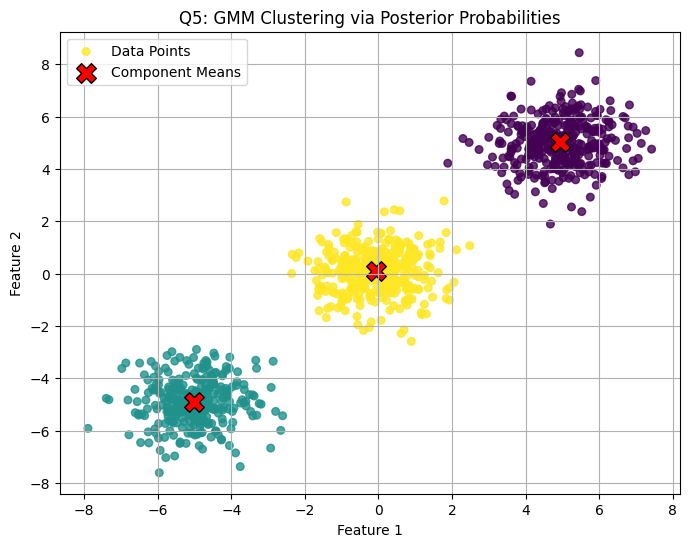

In [3]:
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Compute Posterior Probabilities (Responsibilities)
responsibilities = gmm.predict_proba(X)
cluster_assignments = np.argmax(responsibilities, axis=1)
means = gmm.means_

# Step 2: Plot the Cluster Assignments with Component Means
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='viridis', s=30, alpha=0.8, label='Data Points')
plt.scatter(means[:, 0], means[:, 1], c='red', s=200, marker='X', edgecolor='black', label='Component Means')

plt.title('Q5: GMM Clustering via Posterior Probabilities')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


### **Q5: GMM Visualization & Clustering**

GMM Posterior Probabilities and Clustering – Explained

In this step, we used the Gaussian Mixture Model (GMM) trained in Q4 to perform clustering based on **posterior probabilities**.
#### Posterior Probability Formula

We compute:

$$
p(Z_t = m \mid x_t,\ \theta) =
\frac{ \pi_m \cdot \mathcal{N}(x_t;\ \mu_m,\ \Sigma_m) }
{ \sum_{k=1}^3 \pi_k \cdot \mathcal{N}(x_t;\ \mu_k,\ \Sigma_k) }
$$

Where the multivariate Gaussian density is:

$$
\mathcal{N}(x_t;\ \mu_k,\ \Sigma_k) =
\frac{1}{(2\pi)^{D/2} |\Sigma_k|^{1/2}}
\exp\left( -\frac{1}{2}(x_t - \mu_k)^\top \Sigma_k^{-1} (x_t - \mu_k) \right)
$$

<br><br>

#### Clustering via Argmax

To assign each point to a cluster, we take:

$$
\text{cluster}_t = \arg\max_m \; p(Z_t = m \mid x_t)
$$

This gives a **hard assignment** used for visualization.

<br><br>

#### Visualization Summary

- Each data point is plotted in 2D, colored by its most likely component.
- The **GMM means** ($\mu_1$, $\mu_2$, $\mu_3$) are marked with large red “X”s.
- This shows how the GMM clusters the data using both **density** and **prior**.

<br><br>

This clustering result reflects the **probabilistic foundation of GMMs**:

- Observations are not just grouped by distance (as in K-means),
- But by how likely each component explains the data point under the full Gaussian.


---
<font color=blue>Q6:</font> <br><font color='blue'>
Consider our observation matrix $X \in \mathbb{R}^{T \times D}$ where rows represent observations at consecutive time steps. We now model this data with a Hidden Markov Model (HMM) with hidden states $H_1, H_2, ..., H_T$ where each $H_t \in \{1,2,3\}$.
* Describe the complete parameterization of an HMM with Gaussian emissions:
   * Define the initial state distribution $\pi$
   * Define the transition matrix $Q$
   * Define the emission parameters $\mu$ and $\Sigma$
* For each parameter, specify its dimensions and any constraints it must satisfy.
* Formally state the two key assumptions of an HMM:
   * The Markov property for the hidden state sequence
   * The emission independence property
</font>

---
###  **Q6: HMM Parameterization & Assumptions**

We assume observations $X \in \mathbb{R}^{T \times D}$ and hidden states $H_t \in \{1, 2, 3\}$, and model the data using a Hidden Markov Model (HMM).

The HMM is parameterized by:

$$
\theta = (\pi, Q, \mu, \Sigma) = \left((\pi_1, \pi_2, \pi_3),\ Q \in \mathbb{R}^{3 \times 3},\ (\mu_1, \mu_2, \mu_3),\ (\Sigma_1, \Sigma_2, \Sigma_3)\right)
$$

<br><br>

### **1. Initial State Distribution $\pi$**

- **Definition**: $\pi_m = P(H_1 = m)$  
- **Dimensions**: $\pi \in \mathbb{R}^3$  
- **Constraints**:  
  - $\pi_m \geq 0$  
  - $\sum_{m=1}^3 \pi_m = 1$

<br><br>

### **2. Transition Matrix $Q$**

- **Definition**: $Q_{ij} = P(H_{t+1} = j \mid H_t = i)$  
- **Dimensions**: $Q \in \mathbb{R}^{3 \times 3}$  
- **Constraints**:  
  - $Q_{ij} \geq 0$  
  - $\sum_{j=1}^3 Q_{ij} = 1$ for each $i$

<br><br>

### **3. Emission Parameters $(\mu, \Sigma)$**

Each hidden state emits observations from a multivariate Gaussian:

$$
X_t \mid H_t = m \sim \mathcal{N}_D(\mu_m, \Sigma_m)
$$

- **Means**:  
  $\mu_m \in \mathbb{R}^D \quad \Rightarrow \quad \mu \in \mathbb{R}^{3 \times D}$

- **Covariances**:  
  $\Sigma_m \in \mathbb{R}^{D \times D}$ (symmetric and positive definite)  
  $\Rightarrow \Sigma \in \mathbb{R}^{3 \times D \times D}$

<br><br>

### **Key Assumptions of an HMM**

#### **1. Markov Property (First-order)**

$$
P(H_t \mid H_{1}, \dots, H_{t-1}) = P(H_t \mid H_{t-1})
$$

The hidden state process forms a first-order Markov chain.

#### **2. Emission Independence**

$$
P(X_t \mid H_{1:T}, X_{1:t-1}) = P(X_t \mid H_t)
$$

Each observation is conditionally independent of everything else given the current hidden state.


---
<font color=blue>Q7:</font> <br><font color='blue'>
For an HMM with parameters $\theta = (\pi, Q, \mu, \Sigma)$, we need to compute various posterior probabilities of the hidden states given observations. Let's explore the algorithms for these computations and their role in parameter estimation.
* The Forward-Backward algorithm computes two important sets of probabilities:
  * The filtering probabilities: $\xi(t,h) = P(H_t = h | X_{1:t})$ (probability of being in state $h$ at time $t$ given observations up to time $t$)
  * The smoothing probabilities: $\psi(t,h) = P(H_t = h | X_{1:T})$ (probability of being in state $h$ at time $t$ given all observations)
  * Explain how this algorithm works by:
    * Defining the forward variables $\alpha(t,h)$ and describing how they are recursively computed
    * Defining the backward variables $\beta(t,h)$ and describing how they are recursively computed
    * Showing how these variables are used to calculate $\xi(t,h)$ and $\psi(t,h)$
* The joint smoothing probability $\phi(t,h,h') = P(H_t = h, H_{t+1} = h' | X_{1:T})$ is also important.
  * Provide the formula for computing $\phi(t,h,h')$ in terms of $\alpha$ and $\beta$ variables
* Explain how these probabilities ($\psi$ and $\phi$) are used in the Expectation-Maximization (EM) algorithm:
  * What is computed in the E-step of the EM algorithm?
  * Derive the update formulas for all parameters ($\pi$, $Q$, $\mu$, $\Sigma$) in the M-step
</font>

---

### **Q7: Forward-Backward Algorithm & EM for HMMs**


We consider a Hidden Markov Model (HMM) with parameters  
$$
\theta = (\pi, Q, \mu, \Sigma)
$$  
and a sequence of observations $\tilde{X} = \{\tilde{x}_1, \ldots, \tilde{x}_T\}$.  
We aim to compute **posterior probabilities** over the hidden states, and use them for **parameter estimation** via the Expectation-Maximization (EM) algorithm.

<br><br>

### **Forward-Backward Algorithm**

The algorithm computes two key sets of probabilities:

#### 1. **Filtering probabilities**:  
Probability of being in state $h$ at time $t$ given observations up to time $t$:

$$
\xi(t, h) := P(H_t = h \mid \tilde{X}_{1:t})
$$

#### 2. **Smoothing probabilities**:  
Probability of being in state $h$ at time $t$ given all observations:

$$
\psi(t, h) := P(H_t = h \mid \tilde{X}_{1:T})
$$

<br><br>

### **Forward Propagation (Filtering Probabilities)**

We define the **alpha variables**, which correspond to the joint probability of the observed sequence up to time t and the hidden state at time t:

$$
\alpha(t, h) := P(\tilde{X}_{1:t}, H_t = h)
$$

We also define the **emission tensor** $\Gamma(t)$, a diagonal matrix where each entry corresponds to the likelihood of the current observation given a hidden state:

$$
\Gamma(t) = \text{diag}\left( p(\tilde{x}_t \mid H_t = 1), \ldots, p(\tilde{x}_t \mid H_t = M) \right)
$$

#### Recursive computation of forward variables:

- **Initial step**:
$$
\alpha_1 = \Gamma(1) \pi
$$

- **Recursion** (for $t \geq 2$):
$$
\alpha_t = \Gamma(t) Q^\top \alpha_{t-1}
$$

- **Filtering probabilities**:
$$
\xi_t = \frac{\alpha_t}{\mathbf{1}^\top \alpha_t}
$$

<br><br>

### **Backward Propagation (Smoothing Probabilities)**

We define the **beta variables**, which represents the likelihood of future observations given the current state:

$$
\beta(t, h) := P(\tilde{X}_{t+1:T} \mid H_t = h)
$$

#### Recursive computation of backward variables:

- **Initial step**:
$$
\beta_T = \mathbf{1}_M
$$

- **Recursion** (for $t = T-1, \dots, 1$):
$$
\beta_t = Q \Gamma(t+1) \beta_{t+1}
$$

#### **Smoothing probabilities** using $\alpha$ and $\beta$:

$$
\psi_t = \frac{\alpha_t \odot \beta_t}{\mathbf{1}^\top \alpha_T}
$$

<br><br>

### **Joint Smoothing Probability $\phi(t, h, h')$**

This is the probability of transitioning from $h$ at time $t$ to $h'$ at time $t+1$, given the full sequence:

$$
\phi(t, h, h') := P(H_t = h, H_{t+1} = h' \mid \tilde{X}_{1:T})
$$

Expressed in matrix form:

$$
\phi_t = \frac{\text{diag}(\alpha_t) Q \Gamma(t+1) \text{diag}(\beta_{t+1})}{\mathbf{1}^\top \alpha_T}
$$

The **Forward-Backward algorithm** works by recursively computing forward variables $\alpha_t$ and backward variables $\beta_t$, which are then combined to obtain smoothed state probabilities $\psi(t, h)$ and joint transition probabilities $\phi(t, h, h')$ which are needed for the E-step of the EM algorithm.


<br><br>

### **How $\psi$ and $\phi$ Are Used in the EM Algorithm**

The **EM algorithm** is used to estimate parameters $\theta = (\pi, Q, \mu, \Sigma)$ by maximizing the **expected complete-data log-likelihood**.



### **- E-step:**
The E-step computes the expected complete log-likelihood with respect to the prosterior distribution:

$$
\mathbb{E}_{H \mid \tilde{X}}[\log p_\theta(H, \tilde{X})]
$$

This decomposes into 3 terms:

$$
\begin{aligned}
\mathbb{E}_{H \mid \tilde{X}}[\log p_\theta(H, \tilde{X})] = &\sum_{h=1}^M \log(\pi_h)\psi(1, h) \\
&+ \sum_{t=1}^{T-1} \sum_{h=1}^M \sum_{h'=1}^M \log(Q_{hh'})\phi(t, h, h') \\
&+ \sum_{t=1}^T \sum_{h=1}^M \log\left( \mathcal{N}(\tilde{x}_t; \mu_h, \Sigma_h) \right)\psi(t, h)
\end{aligned}
$$

Where we used the **Forward-Backward algorithm** to compute:

- $\psi(t, h) = P(H_t = h \mid \tilde{X}_{1:T})$  
- $\phi(t, h, h') = P(H_t = h, H_{t+1} = h' \mid \tilde{X}_{1:T})$


>
### **- M-step:**

The M-step maximizes the expected log-likelihood with respect to parameters Θ as follows:

- **Initial state distribution**:
$$
\pi_h^{(i+1)} = \psi(1, h)
$$

- **Transition matrix**:
$$
Q_{h, h'}^{(i+1)} = \frac{\sum_{t=1}^{T-1} \phi(t, h, h')}{\sum_{t=1}^{T-1} \psi(t, h)}
$$

- **Emission means**:
$$
\mu_h^{(i+1)} = \frac{\sum_{t=1}^{T} \psi(t, h) \tilde{x}_t}{\sum_{t=1}^{T} \psi(t, h)}
$$

- **Emission covariances**:
$$
\Sigma_h^{(i+1)} = \frac{\sum_{t=1}^{T} \psi(t, h)(\tilde{x}_t - \mu_h^{(i)})(\tilde{x}_t - \mu_h^{(i)})^\top}{\sum_{t=1}^{T} \psi(t, h)}
$$


---
<font color=blue>Q8:</font> <br><font color='blue'>
After fitting an HMM to the data, we often want to forecast future hidden states. Consider our fitted HMM with parameters $\theta = (\pi, Q, \mu, \Sigma)$ and our observation sequence $X_{1:T}$.
* Derive the formula for predicting the probability distribution of the hidden state at time $T+1$, i.e., $P(H_{T+1} = h | X_{1:T})$ for each $h \in \{1, 2, 3\}$
* Explain the intuition and meaning of each term in your formula
</font>
---

### **Q8: HMM State Forecasting Problem**

After training an HMM on data $\tilde{X}_{1:T}$ and estimating parameters  

$$
\theta = (\pi, Q, \mu, \Sigma)
$$  
we often want to predict the hidden state at the next time step.


The objective is for each $h \in \{1, 2, 3\}$, compute:

$$
P(H_{T+1} = h \mid \tilde{X}_{1:T})
$$

as we want to predict the probability of the next hidden state given the observations.

<br><br>

###  **Deriving the formula**  

The objective is to compute:

$$
P(H_{T+1} = h \mid \tilde{X}_{1:T}), \quad \text{for each } h \in \{1, 2, 3\}
$$

Apply the **Law of Total Probability** over all possible values of $H_T$:



$$
P(H_{T+1} = h \mid \tilde{X}_{1:T}) = \sum_{h'=1}^M P(H_{T+1} = h, H_T = h' \mid \tilde{X}_{1:T})
$$



Apply the **Chain Rule of conditional probability**:

$$
= \sum_{h'=1}^M P(H_{T+1} = h \mid H_T = h') \cdot P(H_T = h' \mid \tilde{X}_{1:T})
$$

Now substitute known quantities:
- $P(H_{T+1} = h \mid H_T = h') = Q_{h'h}$ (transition matrix)
- $P(H_T = h' \mid \tilde{X}_{1:T}) = \xi(T, h')$ (filtering probability from forward algorithm)

Final expression:

$$
\boxed{P(H_{T+1} = h \mid \tilde{X}_{1:T}) = \sum_{h'=1}^M Q_{h'h} \cdot \xi(T, h')}
$$

<br><br>

###**Explanation of the Formula and Intuition**

We derived:
$$
P(H_{T+1} = h \mid \tilde{X}_{1:T}) = \sum_{h'=1}^M Q_{h'h} \cdot \xi(T, h')
$$

Meaning of each term:

- **Filtering probability ($\xi(T, h')$)**:
The probability that the system was in hidden state $h'$ at time $T$, given all observations up to that point.  It captures our current belief about the hidden state at time $T$ based on the data.

- **Transition probability ($Q_{h'h}$)**:
The transition probability of moving from state $h'$ at time $T$ to state $h$ at time $T+1$. It comes from the learned transition matrix $Q$.

- **The summation**:  Since we are uncertain about the exact hidden state at time $T$, we use the Law of Total Probability to average over all possibilities. Each $Q_{h'h}$ is **weighted** by how likely we are to be in $h'$ at $T$ (given by $\xi(T, h')$).

&nbsp;
- The **Markov property** tells us that the hidden state at time $T+1$ depends **only** on the hidden state at time **$T$**, and **not directly** on the observations or earlier states:
  $$
  P(H_{T+1} \mid H_T, \tilde{X}_{1:T}) = P(H_{T+1} \mid H_T)
  $$

  This property justifies why we only need to condition on $H_T$ (not all $\tilde{X}_{1:T}$) when computing $P(H_{T+1} = h \mid \tilde{X}_{1:T})$.

&nbsp;

&nbsp;
We **forecast** the next state by:
  1. Using our belief over $H_T$ (via $\xi(T, h')$)
  2. Propagating it forward with the transition dynamics ($Q$)
  3. Resulting in a **probability distribution** over $H_{T+1}$

---


# Part 2: Cryptocurrency Price Movement Prediction Report

---
<img src="https://github.com/mijitrenkel/stml/blob/main/image5.png?raw=true" alt="Meta-Model Flowchart" width="600"/>




# Table of Contents:

## [1. Feature Engineering](#1-feature-engineering)
- [On-chain Features](#On-Chain-Features)
- [Other Engineered Features](#other-featured-engineered)
- [HMM Modeling](#hmm-modeling)
    - [4D vs 2D for Multiple k Regimes](#4d-vs-2d-for-multiple-k-regimes)

## [2. Creating Labels](#2-creating-labels)
- [Combination of h Values](#combination-of-h-values)
- [Trend Scanning Label Creation](#trend-scanning-label-creation)

## [3. Primary Model Development](#3-primary-model-development)
- [Model Selection](#model-selection)
- [Training Strategies](#training-strategies)

## [4. Meta-Labeling and Target Engineering](#4-meta-labeling-and-target-engineering-triple-barrier-method)
- [Triple Barrier Labeling](#Triple-barrier-method)

## [5. Meta Model Training](#5-meta-model-training)

## [6. Feature Importance Analysis](#6-feature-importance-analysis)

## [7. Model Evaluation ](#7-model-evaluation)

## [8. Backtesting Performance](#8-backtesting-performance)

## [9. Code](#code)


## 1. Feature Engineering

### 1.1 On Chain Features
To enhance the expressiveness of our feature set, we incorporated three key on-chain metrics based on their strong empirical support in the literature and their intuitive alignment with market fundamentals. These features aim to capture network activity and valuation beyond what is reflected in price and volume data alone.

#### **Motivation and Literature Support**

We decided to enhance our feature set by incorporating additional on-chain metrics, specifically the MVRV ratio, number of unique addresses used (daily), and exchange trade volume (USD) which was based on a scan of the primary literature, which consistently shows that these variables improve out-of-sample trend prediction accuracy.

Beyond empirical support, our intuition suggests that on-chain data provides fundamental insight into Bitcoin network behavior and market sentiment. This added richness complements traditional OHLCV features and should benefit both our primary model and the HMM by capturing dynamics not visible in price and volume alone.

On-chain data was sourced from [blockchain.com](https://www.blockchain.com/explorer/charts/n-unique-addresses), which offers comprehensive daily metrics about Bitcoin network activity.


#### **On-Chain Features Extracted**

| Feature Name          | Description                                                   | Intuition / Signal Captured                     |
|----------------------|---------------------------------------------------------------|-------------------------------------------------|
| `MVRV`               | Market Value to Realized Value ratio                          | Over/undervaluation; investor cost basis        |
| `n_unique_addresses` | Number of unique daily active addresses                       | Network activity; proxy for organic adoption    |
| `exchange_volume`    | Daily exchange-traded volume in USD                           | Liquidity, market intensity, speculative flows  |


#### **Data Processing Pipeline**

We accessed and processed the data as follows:

- Downloaded via Google Drive (`gdown`) in `.json` format.
- Timestamps converted from milliseconds and normalized to daily resolution.
- Dates forward-filled to ensure alignment across features.
- Mapped into the hourly `prices` DataFrame using normalized `day` index alignment.

### 1.2 Other Engineered Features
We engineered a broad and targeted set of numerical features from raw OHLCV data to better capture market structure and improve downstream learning tasks. The feature generation process was driven by both domain knowledge and published literature, and was applied over 35,063 hourly Bitcoin observations spanning from January 2018 to December 2021. The goal was to extract interpretable and information-rich signals that could inform both supervised price prediction and unsupervised regime modeling.

We began by computing return-based features over multiple horizons, using both raw and log-transformed scales. This helped normalize scale and handle heavy-tailed distributions often seen in crypto assets. To capture volatility dynamics, we included rolling standard deviations and multi-horizon volatility ratios, such as short-to-long volatility and annualized 24-hour realized volatility.

Momentum and trend features played a key role in our representation. These included both exponential and simple moving averages across varied horizons, as well as technical indicators used in trading literature, such as the MACD and Bollinger Bands. To reflect market psychology, we derived crossover indicators (e.g., golden and death crosses) from pairs of short- and long-term signals. Oscillators like RSI and stochastic %K/%D helped detect overbought or oversold conditions. Volume-weighted features, such as VWAP and On-Balance Volume (OBV), were also added to capture liquidity and investor flow.

To ensure robustness, we performed extensive post-processing. All missing values, infinities, and edge conditions were handled with custom logic. Returns were clipped to avoid distortions, and rolling statistics were safely imputed. Crossover and threshold events were zero-filled to maintain interpretability. The final engineered feature matrix consisted of 69 cleaned features, all stable and ready for modeling.


#### **Log Transforms and Returns**

We created log-based features to stabilize scale:

- `log_close = \log(P_t)`
- `log_vol = \log(V_t)`
- `log\_return_t = \log(P_t) - \log(P_{t-1})`

We also included cumulative return features:

- `return24`, `return30`, `return120` – simple returns
- `log_return30`, `log_return120` – log returns


#### **Volatility Features**

We computed rolling volatility ratios:

- `volatility15 = \frac{\sigma_{15}}{\sigma_{500}}`
- `volatility200 = \frac{\sigma_{200}}{\sigma_{2000}}`
- `rv_24h = \text{std}_{24}(\text{log returns}) \cdot \sqrt{24}`


#### **Trend and Moving Averages**

Moving averages were used to capture trend momentum:

- **Exponential**: `ema21`, `ema35`, `ema80`, `ema250` (normalized by price)
- **Simple**: `sma20`, `sma50`, `sma200`


#### **Volume Anchors**

To capture liquidity and price consensus:

- `vwap` – Volume-weighted average price  
- `vwap_ratio = \frac{\text{vwap}}{\text{close}}`


#### **Oscillators and Indicators**

Used for momentum reversal and overbought/oversold detection:

- RSI: `rsi14` (Relative Strength Index)
- MACD: `macd_line`, `macd_signal`, `macd_hist`
- Bollinger Bands: `bb_upper`, `bb_lower`, `bb_percent_b`, `bb_bandwidth`
- Stochastic: `%K`, `%D`


#### **Trend Strength: ADX System**

We used the ADX family to measure trend intensity:

- `adx14`: Average Directional Index  
- `plus_di14`, `minus_di14`: Directional indicators


#### **Volume Momentum: OBV**

To integrate volume shifts and cumulative sentiment:


\begin{cases}
\text{OBV}_{t-1} + V_t & \text{if } P_t > P_{t-1} \\
\text{OBV}_{t-1} - V_t & \text{if } P_t < P_{t-1} \\
\text{OBV}_{t-1}       & \text{otherwise}
\end{cases}


We used:

- `obv`  
- `obv_ratio = \frac{obv}{\max(obv)_{500}}`


#### **Crossovers and Threshold Flags**

We automatically engineered binary signals for technical events:

- **Golden/death crosses**: e.g. `ema21_ema80_golden_cross`, `sma50_sma200_death_cross`
- **RSI thresholds**: `rsi70_cross_above`, `rsi30_cross_below`
- **Band triggers**: `bb_cross_above`, `bb_cross_below`


#### **Cleaning and Imputation**

To ensure a usable and stable dataset:

- All `±\infty` values were replaced with `NaN`
- Returns imputed with neutral values (e.g. `return30 = 1.0`)
- Volatilities and EMAs clipped or forward-filled
- All crossover flags and band signals were zero-filled
- Remaining time series (e.g. SMAs, OBV) filled using rolling logic

After processing, our feature matrix had:

- 69 total features
- No missing or infinite values
- Consistent coverage over 35,000+ rows


#### **Summary Table of Engineered Features**

| Category               | Features |
|------------------------|----------|
| **Log & Returns**      | `log_close`, `log_vol`, `log_return`, `return24`, `return30`, `return120`, `log_return30`, `log_return120` |
| **Volatility**         | `volatility15`, `volatility200`, `rv_24h` |
| **Moving Averages**    | `ema21`, `ema35`, `ema80`, `ema250`, `sma20`, `sma50`, `sma200` |
| **Volume Anchors**     | `vwap`, `vwap_ratio` |
| **Oscillators**        | `rsi14`, `%K`, `%D`, `macd_line`, `macd_signal`, `macd_hist` |
| **Bollinger Bands**    | `bb_upper`, `bb_lower`, `bb_percent_b`, `bb_bandwidth` |
| **ADX System**         | `adx14`, `plus_di14`, `minus_di14` |
| **Volume Momentum**    | `obv`, `obv_ratio` |
| **Crossovers & Flags** | Momentum-based crosses, RSI flags, Bollinger band signals |


### 1.3 HMM Modeling

We fed the HMM a **two–dimensional vector \([r_t,rv_24h]\)** because both theory and the crypto-regime literature consistently show that this pair captures the bulk of regime structure.

* **Log returns r_t** supply direction & magnitude of price moves and have been the work-horse observable in regime-switching work since Hamilton (1989).  
* **Rolling variance rv_24h** proxies realised volatility, letting the model separate quiet from turbulent periods.

Multiple of Bitcoin papers ( *“Markov-Switching Volatility Models for Bitcoin”*, *“Detecting Crypto Regimes with HMMs”*) report that this minimalist 2-D set explains **≈ 80–90 %** of regime variance. Adding technical indicators, macro variables, or extra on-chain metrics rarely changes regime boundaries; instead it tends to over-fit and spawns minor sub-clusters that vanish out-of-sample. Hence we retained the 2-feature specification.

---

### Searching for the right number of hidden states

We fitted both 2-D and 4-D HMMs with K in (2,8) and compared models with:

* **Bayesian Information Criterion (BIC)**
* **Emission-mean Euclidean distances** (to spot redundant states)
* **Transition matrices (T)** & implied state durations
* Visual inspection of state-coloured return/volatility plots  

#### 2-D results

| K | Redundant / very close states? | Interpretability | Mean-duration stability | Verdict |
|---|--------------------------------|------------------|-------------------------|---------|
| 5 | Yes (0≈2 and 0≈4; dist < 0.5)  | Low  | Tiny unstable clusters | Over-segmented |
| 4 | 1 redundant pair (1≈3; 0.489)  | Moderate | Still two “mild bull” clones | Marginal gain |
| **3** | **None (all d ≥ 0.612)** | **High** – Crash / Quiet Bull / Moderate Bull | **Stable (diag T ≥ 0.96)** | **Chosen** |

The three-state model preserved clear economic meaning, avoided duplication and matched the dominant *crash–bull–calm* triad in the literature.

---


### Testing higher dimensionality – the 4-D 

To test extra information, we added two on-chain metrics (active addresses & transfer volume) and repeated the same steps. 
The returns the joint log-likelihood of the test sequence:
log-likelihood (K = 3)
4-D : +64 473, 2-D : −18 121

A higher (less negative) score for 4-D is **expected** because log-likelihood scales with dimensionality.
## Comparison of 2-D vs 4-D HMM

| Metric       | 2D HMM        | 4D HMM         | Interpretation                                                   |
|:------------:|:-------------:|:--------------:|:-----------------------------------------------------------------|
| **logL_train**  | −35 466.68   | −95 038.41    | Less negative is better. The 2-D model achieves a higher in-sample log-likelihood despite fewer features. |
| **logL_test**   | −33 596.83   | −115 591.81   | Again, 2-D outperforms 4-D out-of-sample; the 4-D HMM’s test log-likelihood collapses. |
| **CE_train**    | 0.67         | 0.90          | CE = (−logL) / (T·d). Lower is better. The 2-D model explains the training data more efficiently per sample×dimension. |
| **CE_test**     | 0.60         | 1.03          | On test data, 2-D still yields much lower CE. The 4-D model struggles to generalize once you normalize for (T·d). |
| **BIC_train**   | 71 136.91    | 190 402.51    | BIC = −2·logL + p·log(T). Despite higher model complexity, 4-D’s extra parameters are heavily penalised, yielding a far larger train-BIC. |
| **BIC_test**    | 67 398.59    | 231 511.51    | Out-of-sample, the 4-D’s BIC skyrockets compared to 2-D. A dramatically higher BIC means 4-D’s complexity is not justified by its predictive power on held-out data. |


1. **2-D HMM consistently outperforms 4-D both in-sample and out-of-sample**  
   - Despite having fewer features, the 2-D HMM achieves a higher (less negative) log-likelihood on both training and test sets.  
   - Its cross-entropy remains markedly lower, indicating it explains the data more efficiently once normalized by sequence length and feature dimension.

2. **4-D HMM exhibits clear signs of overfitting**  
   - While one might expect that adding two on-chain metrics would improve regime detection, the 4-D HMM’s test performance collapses. Its log-likelihood and cross-entropy on the test set are far worse than the 2-D model’s.  
   - The jump from CE_train = 0.90 → CE_test = 1.03 for 4-D shows the model learned spurious patterns that do not generalize.

3. **BIC penalisation confirms that 2-D is the preferable choice**  
   - Even on the training data, 4-D’s train-BIC (190 402) is almost three times larger than the 2-D train-BIC (71 137), meaning the likelihood gain is not sufficient to justify the extra parameters.  
   - On test, the penalty intensifies: 4-D’s test-BIC (231 512) dwarfs 2-D’s (67 399). A lower BIC always indicates the better trade-off between fit and complexity.


- **Therefore we use the  2-D HMM K=3**
  As it generalizes best, avoids regime fragmentation, and aligns with the consensus in Bitcoin regime-switching research.  


---
<p align="center">
  <img src="https://raw.githubusercontent.com/mijitrenkel/stml/main/image1.png" width="500">
</p>

<p align="center">
  <img src="https://raw.githubusercontent.com/mijitrenkel/stml/main/image2.png" width="500">
</p>

<p align="center">
  <img src="https://raw.githubusercontent.com/mijitrenkel/stml/main/image3.png" width="500">
</p>


---

## 2. Creating Labels


**Trend scanning** is a supervised labeling method introduced by Marcos López de Prado that assigns directional labels (upward, downward, or flat) to financial time series based on statistically significant trends. For each observation \( t \), a linear regression is fit over a forward-looking window of \( h \) bars, and a **t-statistic** is computed for the slope. The label assigned to time \( t \) corresponds to the direction of the most statistically significant trend (positive, negative, or none) within a maximum horizon.

### Advantages
- **Statistical rigor**: Labels are based on hypothesis testing, not arbitrary thresholds.
- **Adaptive to local structure**: It can pick up subtle, local trends in volatile markets like crypto.
- **Better signal quality**: Reduces label noise compared to naive fixed-return thresholds.

### Disadvantages
- **Computationally intensive**: Fitting a regression at every time point across multiple horizons is expensive.
- **Lookahead bias risk**: Care must be taken to align labels properly in a backtest context.
- **Sensitive to hyperparameters**: Choice of \( h \) (window) and maximum bars strongly influences label quality.

### Importance of the \( h \) Span

The parameter \( h \), the regression window length, is critical because it determines the **scale** of trends being scanned:
- **Short \( h \)**: detects quick, noisy moves, but may over-label reversals.
- **Long \( h \)**: smooths out noise, finds more persistent trends, but can delay detection.

To find the most predictive span, we ran a **grid search over combinations of \( h \) and max-bar limits**, training a model on each set of labels and evaluating its **out-of-fold Sharpe ratio** across 2018–2020.  
This gave us a robust, model-aware way to select the most informative trend window for our final label generation.


### 2.1 Combination of h Values
## Trend-Scanning Grid Search: Selecting the Optimal Observation Window \(h\)

| Span of h (h_min, h_max) | Sharpe&nbsp;2018 | Sharpe&nbsp;2019 | Sharpe&nbsp;2020 | **Avg&nbsp;Sharpe** |
|:------------------------------:|:---------------:|:---------------:|:---------------:|:------------------:|
| **(15, 96)** | **1.175** | **0.530** | **1.664** | **1.123** |
| (15, 72)     | 0.725 | 0.440 | 1.302 | 0.822 |
| (9, 72)      | 0.644 | 0.347 | 1.113 | 0.701 |
| (6, 72)      | 0.464 | 0.217 | 1.209 | 0.630 |
| (9, 48)      | 0.747 | 0.426 | 0.671 | 0.615 |
| (9, 36)      | 0.425 | 0.476 | 0.758 | 0.553 |

### Why the 15,72 window is optimal  

1. **Higher and more stable risk-adjusted returns**  
   *The longest look-back / holding span* \((h = 15,\; \text{max bars} = 96)\) produces the highest average Sharpe (1.123) **and** dominates the individual-year Sharpe in two out of three years.  
   This suggests that longer trend windows capture sustained moves and filter out intraday noise.

2. **Robustness across regimes**  
   2018-2020 will represent very different market regimes.  
   The \((15, 96)\) span delivers positive Sharpe in every year, indicating that the signal generalises rather than over-fits a single regime.

3. **Noise reduction vs. reactivity trade-off**  
   Shorter windows (e.g., \(h = 6\)) react quickly but suffer lower Sharpe because many micro-trends revert before the triple barrier closes.  
   Longer windows give the underlying linear-regression \(t\)-statistic more data, yielding a **higher signal-to-noise ratio** and more reliable label assignments.

4. **Consistent ranking**  
   As the table shows, *all* spans with \(h = 15\) rank above any span with \(h = 6\) or \(h = 9\).  
   That monotonic ranking reinforces the conclusion that extending the observation window is beneficial for this market and timeframe.

> **Practical implication:** we adopt h=15 with a h=96-bar horizon for label generation.  
> It maximises out-of-fold Sharpe while maintaining interpretability and computational efficiency.


---

### 3.1 Model Selection
To begin the model selection process, we first loaded the fully processed dataset that included all prior feature engineering steps: price-based technical indicators, on-chain metrics, latent regimes inferred from Hidden Markov Models (HMMs), and directional labels derived from Trend Scanning. The data spanned the period from January 2018 to December 2021 and consisted of 81 engineered features per hourly observation. These datasets—`prices_train` and `prices_test`—were pre-split to preserve chronological order and prevent lookahead bias, enabling reliable out-of-sample evaluation.

We then applied a structured preprocessing pipeline to transform and normalize features appropriately before model training. Economic indicators like `MVRV` and `NVT` were log-transformed to stabilize skewness, while `n_unique_addresses` was log-differenced to capture growth trends. Transaction-based features such as `exchange_volume` were scaled using a `log1p` transform to manage long-tailed distributions. Standard financial indicators—returns, volatilities, moving averages, momentum oscillators—were z-score normalized to ensure compatibility across input dimensions. Binary crossover and threshold flags were retained without transformation. This preprocessing was implemented using `sklearn`’s `ColumnTransformer`, making it modular and reproducible. Final feature names were extracted using `get_feature_names_out()` for interpretability and compatibility with downstream modeling workflows.

### 3.1.1 Baseline Model

We use a Random Forest classifier as a strong baseline for this task. As an ensemble of decision trees trained on bootstrapped samples with random feature selection, it is well-suited for structured tabular data like ours, which combines technical (OHLCV), trend-based (HMM), and on-chain features (e.g., MVRV, unique addresses). Random Forests naturally capture non-linear interactions and provide feature importances, which makes them interpretable and robust to noisy inputs. This makes them ideal for initial benchmarking and sanity checks.

### 3.1.2 LSTM
Long Short-Term Memory (LSTM) networks are designed for learning dependencies over sequential data and are particularly adept at modeling long-range temporal patterns. Given our dataset is composed of daily Bitcoin features and labels over time, LSTMs can learn the evolving dynamics in the market. The sliding-window format (e.g., 30-day lookbacks) allows LSTMs to ingest structured sequences of past market behavior, making them suitable for forecasting future trend movements.
### 3.1.3 VSN-LSTM

The VSN-LSTM enhances the basic LSTM with a Variable Selection Network, which applies a learned attention-like gating mechanism over input features at each timestep. This is particularly valuable in our setting, where not all features (e.g., exchange volume vs. on-chain data) are equally informative across all time periods. By learning per-timestep soft weights, the model adapts to feature relevance dynamically. This leads to better generalization on volatile financial time series and adds an interpretable layer of feature attention within the temporal context.

### 3.1.3 TCN
The Temporal Convolutional Network (TCN) employs dilated causal convolutions to capture long-term dependencies without recurrence. In contrast to LSTMs, TCNs are parallelizable and suffer less from vanishing gradients. They are especially effective when trends or dependencies stretch over extended but discrete temporal intervals — a good match for Bitcoin time series, where macro movements (like accumulation/distribution phases) can unfold over weeks. Our 30-day input windows allow the TCN to learn from local and extended temporal patterns with higher efficiency and faster convergence than RNNs.

### 3.2 Training Strategies
To assess model generalization, we implemented two training strategies:

### 3.2.1 Time-Series Cross-Validation
We use a 3-fold TimeSeriesSplit strategy, where each split respects temporal order: future data is never used in training for earlier predictions. This mimics real-world deployment where a model must make predictions without knowledge of future observations. Out-of-Fold (OOF) predictions from this method are used to assess how stable a model's performance is over varying market regimes.

### 3.2.2 Leave-One-Year-Out Cross-Validation (Year-CV)
We also implement Leave-One-Year-Out CV, where we hold out each calendar year once (e.g., train on 2018–2020, test on 2021). This strategy directly evaluates a model's ability to generalize across distinct market years, which is crucial for Bitcoin where macro conditions shift significantly over time (e.g., bull vs. bear markets). Year-CV serves as a robustness test, ensuring that models trained on previous years do not overfit to a specific regime.

In both cases, OOF metrics are used to compare models in a fair, forward-looking manner. Final evaluation on 2021 data is only performed after selecting the most robust model via these CV strategies.

## 4. Meta Labeling and Target Engineering: triple-barrier method
To generate target labels for our meta-model, we apply the **Triple Barrier Method**, which evaluates whether a trade based on the primary model's signal would have been profitable.

We use the same prediction horizon as our trend-scanning approach and define trade outcomes using rolling volatility as a dynamic threshold:

- **Take-Profit Barrier**: `+1 × rolling 20-period volatility`  
- **Stop-Loss Barrier**: `−1 × rolling 20-period volatility`

#### Labeling Logic:
- **Signal = 1 (Long)**:
  - Hits upper barrier → **meta-label = 1**
  - Hits lower barrier → **meta-label = 0**
- **Signal = −1 (Short)**:
  - Hits lower barrier → **meta-label = 1**
  - Hits upper barrier → **meta-label = 0**
- **Neither hit**:  
  - Label determined by whether the price at the end of the horizon moved in the predicted direction

These binary outcomes (1 = successful, 0 = unsuccessful) form the **target variable** for our meta-model. The meta-model learns to estimate the *credibility* of the primary model's signal using:

- Technical indicators  
- On-chain features  
- The primary model’s directional signal and its predicted probabilities

This setup enables selective execution—filtering out low-confidence trades to improve overall strategy robustness.


---
## 5. Meta Model



To enchance the predictions of our primary model—the Temporal Convolutional Network (TCN)—we introduced a meta-modeling layer aimed at filtering out unreliable trade signals, this aids in risk management. Unlike the primary model, which is trained to predict directional price movements directly, **the meta-model serves a different purpose: it predicts whether a given directional signal is likely to be correct**. The target variable for the meta-model is a meta-label, generated using the **triple-barrier method**, which evaluates the ex-post outcome of trades based on profit-taking and stop-loss conditions. The input features for the meta-model include all available features (on-chain, technical indicators, etc.), as well as key signals from the primary model: **the predicted trend direction and its associated class probabilities.** This design allows the meta-model to learn higher-level trade reliability patterns and improve overall decision quality by selectively filtering the primary model’s outputs.


### 5.1 Meta Model Training

Using the constructed meta-dataset, we trained several meta-classifiers to model the conditional probability of a prediction being correct. Each classifier was fit using 3-fold time-series cross-validation, with tuning via grid search. The models included:

We trained three ensemble-based meta-models with hyperparameter tuning: Random Forests (RF), tuned over tree depth, number of estimators, and minimum leaf size; XGBoost (XGB), optimized across tree depth, learning rate, number of estimators, and subsampling ratios; and LightGBM (LGBM), which was tuned over a similar parameter space including maximum depth, number of leaves, learning rate, and subsample rate.


In addition, linear meta-models (OLS, Ridge, Lasso) were also trained. These were included to test whether simpler, interpretable models could match the performance of more complex ensembles.

### 5.2 Validation and Selection

Each meta-model was evaluated using a temporal split: the first 80\% of the meta-labeled dataset was used for training, and the final 20\% for validation. This ensured no data leakage and simulated a real-world deployment scenario. Model selection was based on overall accuracy and interpretability, with particular focus on identifying low-confidence predictions.


The meta-model acts as a filtering layer atop the primary model’s predictions. It learns from historical prediction outcomes to decide whether to act on a signal. By doing so, we add a layer of statistical risk control, reduce false positives, and improve decision robustness. This architecture enables more selective and confident model-driven execution in noisy financial environments.


---



## 6. Feature Importance Analysis (STILL NEEDS TO BE DONE!!)
### Interpreting Feature Importance in Primary model
<img src="https://raw.githubusercontent.com/mijitrenkel/stml/main/image4.png" alt="image4" width="400">

### Interpreting Feature Importance in Meta model



---
## 7. Model Evaluation(STILL NEEDS TO BE DONE!!)



---
## 8. Backtesting Performance(STILL NEEDS TO BE DONE!!)



---


# Code

#### Installing required libraries

In [198]:
"""
Importing all the needed libraries for the project:
"""
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm
from hmmlearn.hmm import GaussianHMM
import statsmodels.api as sm1
from scipy.stats import linregress
import matplotlib.dates as mdates
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model   import LinearRegression, Lasso, Ridge
from sklearn.model_selection import TimeSeriesSplit,ParameterGrid
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import balanced_accuracy_score, f1_score
from tqdm import tqdm
from sklearn.model_selection  import PredefinedSplit, GridSearchCV
from sklearn.base import clone
import warnings
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import gdown
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import seaborn as sns
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import TimeSeriesSplit

warnings.filterwarnings('ignore')

#### Loading in Prices DataSet

In [199]:
# Prices
print("Loading prices data...")
url = 'https://drive.google.com/uc?id=1P_5ykYLd5521QUdCxC_cMytdJ3PqESTw'
prices = pd.read_csv(url, parse_dates=True, index_col=0)
print("✓ Loaded prices")

Loading prices data...


✓ Loaded prices


#### Addtional On-chain data

In [200]:
import gdown
import json
import pandas as pd
def load_and_process_crypto_data():
    file_ids = {
        'mvrv': '1j7k3rF1EZdw8HuOldAUE1pu-GEF0nL0D',
        'naddress': '1n7E8L7TlUhHiefz-mBXyWNONuK7Rdqir',
        'etv': '1CbQeIqn3f1xtifHlMO4rxObPeH6C56Ll',
        'nvt':'1jWr21FSLFvea-gKGe_Ylz3mITm_o3cMR'
    }
    def download_and_load_json(file_id, output_filename):
        url = f"https://drive.google.com/uc?id={file_id}"
        gdown.download(url, output_filename, quiet=True)
        with open(output_filename, 'r') as f:
            return json.load(f)

    # ---- MVRV ----
    data_mvrv = download_and_load_json(file_ids['mvrv'], "data_mvrv.json")
    df_mvrv = pd.DataFrame(data_mvrv)
    df_mvrv['Date'] = pd.to_datetime(df_mvrv['x'], unit='ms')
    df_mvrv['Date'] = df_mvrv['Date'].dt.date
    df_mvrv.rename(columns={'y': 'MVRV'}, inplace=True)
    df_mvrv = df_mvrv[['Date', 'MVRV']].set_index('Date')


    full_index = pd.date_range(start=df_mvrv.index.min(), end=df_mvrv.index.max(), freq='D')
    df_mvrv = df_mvrv.reindex(full_index)
    df_mvrv['MVRV'] = df_mvrv['MVRV'].ffill()
    df_mvrv = df_mvrv.reset_index().rename(columns={'index': 'Date'})


    # ---- n-unique-addresses ----
    data_naddress = download_and_load_json(file_ids['naddress'], "data_naddress.json")
    df_naddress = pd.DataFrame(data_naddress)
    df_naddress['Date'] = pd.to_datetime(df_naddress['x'], unit='ms')
    df_naddress.rename(columns={'y': 'n_unique_addresses'}, inplace=True)
    df_naddress = df_naddress[['Date', 'n_unique_addresses']].set_index('Date')

    full_index_naddress = pd.date_range(start=df_naddress.index.min(), end=df_naddress.index.max(), freq='D')
    df_naddress = df_naddress.reindex(full_index_naddress)
    df_naddress['n_unique_addresses'] = df_naddress['n_unique_addresses'].ffill()
    df_naddress = df_naddress.reset_index().rename(columns={'index': 'Date'})

    # ---- exchange trade volume ----
    data_etv = download_and_load_json(file_ids['etv'], "data_etv.json")
    df_etv = pd.DataFrame(data_etv)
    df_etv['Date'] = pd.to_datetime(df_etv['x'], unit='ms')
    df_etv.rename(columns={'y': 'exchange_volume'}, inplace=True)
    df_etv = df_etv[['Date', 'exchange_volume']].set_index('Date')

    full_index_etv = pd.date_range(start=df_etv.index.min(), end=df_etv.index.max(), freq='D')
    df_etv = df_etv.reindex(full_index_etv)
    df_etv['exchange_volume'] = df_etv['exchange_volume'].ffill()
    df_etv = df_etv.reset_index().rename(columns={'index': 'Date'})
# ---- nvt ----
    data_nvt = download_and_load_json(file_ids['nvt'], "data_nvt.json")
    df_nvt = pd.DataFrame(data_nvt)
    df_nvt['Date'] = pd.to_datetime(df_nvt['x'], unit='ms').dt.normalize()
    df_nvt.rename(columns={'y': 'nvt'}, inplace=True)
    df_nvt = df_nvt[['Date', 'nvt']].set_index('Date')

    full_index_nvt = pd.date_range(start=df_nvt.index.min(), end=df_nvt.index.max(), freq='D')
    df_nvt = df_nvt.reindex(full_index_nvt)
    df_nvt['nvt'] = pd.to_numeric(df_nvt['nvt'], errors='coerce').ffill()
    df_nvt = df_nvt.reset_index().rename(columns={'index': 'Date'})

    return df_mvrv, df_naddress, df_etv, df_nvt

In [201]:
df_mvrv, df_naddress, df_etv , df_nvt= load_and_process_crypto_data()
df_mvrv = df_mvrv[(df_mvrv['Date'] >= '2018-01-01') & (df_mvrv['Date'] <= '2024-03-21')]
df_naddress = df_naddress[(df_naddress['Date'] >= '2018-01-01') & (df_naddress['Date'] <= '2024-03-20')]
df_etv = df_etv[(df_etv['Date'] >= '2018-01-01') & (df_etv['Date'] <= '2024-03-20')]
df_nvt = df_nvt[(df_nvt['Date'] >= '2018-01-01') & (df_nvt['Date'] <= '2024-03-20')]
prices['day'] = prices.index.normalize()
mvrv_map = df_mvrv.set_index('Date')['MVRV']
n_address = df_naddress.set_index('Date')['n_unique_addresses']
etv = df_etv.set_index('Date')['exchange_volume']
nvt = df_nvt.set_index('Date')['nvt']


prices['MVRV'] = prices['day'].map(mvrv_map)
prices['n_unique_addresses'] = prices['day'].map(n_address)
prices['exchange_volume'] = prices['day'].map(etv)
prices['nvt'] = prices['day'].map(nvt)
prices.drop(columns = ['day'])
cutoff = pd.Timestamp("2021-12-31 23:00:00")
prices = prices.loc[:cutoff]

#### Feature Creation (Technical Indicators)

In [202]:
def compute_rsi(close, window=14):
    """
    Compute the 14-period RSI on a closing prices
    """
    #price change
    delta = close.diff()

    #gains / losses
    gain = delta.where(delta > 0, 0.0)
    loss = -delta.where(delta < 0, 0.0)

    #exponential moving averages of gains/losses
    avg_gain = gain.ewm(alpha=1/window, min_periods=window, adjust=False).mean()
    avg_loss = loss.ewm(alpha=1/window, min_periods=window, adjust=False).mean()

    #RS and RSI
    rs  = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    rsi.fillna(50,inplace=True)
    return rsi


In [203]:
def compute_macd(close,
                 fast_period: int = 12,
                 slow_period: int = 26,
                 signal_period: int = 9):
    """
    Compute MACD, signal line, and MACD histogram from close prices

    Parameters: 
    ----------
    close : Series of closing prices.
    fast_period : Lookback for the fast EMA (default 12).
    slow_period : Lookback for the slow EMA (default 26).
    signal_period : Lookback for the signal-line EMA (default 9).

    Returns
    -------
    macd_line : The difference between the fast and slow EMA.
    signal_line : EMA of the macd_line over `signal_period`.
    macd_hist : The difference macd_line - signal_line.
    """
    #fast & slow EMAs
    ema_fast = close.ewm(span=fast_period,  min_periods=fast_period,  adjust=False).mean()
    ema_slow = close.ewm(span=slow_period,  min_periods=slow_period,  adjust=False).mean()

    #MACD line
    macd_line = ema_fast - ema_slow

    #Signal line
    signal_line = macd_line.ewm(span=signal_period, min_periods=signal_period, adjust=False).mean()

    #MACD histogram
    macd_hist = macd_line - signal_line

    return macd_line, signal_line, macd_hist

In [204]:
def compute_bollinger_bands(close, window: int = 20, num_std: float = 2.0):
    """
    Compute Bollinger Bands and related stats.

    Parameters
    ----------
    close : Series of closing prices.
    window : Rolling window length (20).
    num_std : Number of standard deviations for the bands (2).

    Returns
    -------
    mid_band : Simple moving average (SMA) over window
    upper_band : mid_band + num_std * rolling_std.
    lower_band : mid_band - num_std * rolling_std.
    percent_b : (close - lower_band) / (upper_band - lower_band), in [0,1] if within bands.
    band_width : (upper_band - lower_band) / mid_band, a measure of relative width.
    """
    mid_band = close.rolling(window, min_periods=1).mean()
    rolling_std = close.rolling(window, min_periods=1).std()

    upper_band = mid_band + num_std * rolling_std
    lower_band = mid_band - num_std * rolling_std

    #%B where price sits between the bands (below=0, at mid=0.5, above=1)
    percent_b = (close - lower_band) / (upper_band - lower_band)

    #Bandwidth: width relative to the middle band
    band_width = (upper_band - lower_band) / mid_band

    return mid_band, upper_band, lower_band, percent_b, band_width

In [205]:
def compute_adx(high, low, close, window: int = 14):
    """
    Compute the ADX (Average Directional Index) and its +DI, -DI.

    Parameters
    ----------
    high : Series of high prices.
    low : Series of low prices.
    close : Series of closing prices.
    window : Lookback period for ADX (default 14).

    Returns
    -------
    adx : The Average Directional Index.
    plus_di : The +DI line.
    minus_di : The -DI line.
    """
    #True Range (TR)
    prev_close = close.shift(1)
    tr1 = high - low
    tr2 = (high - prev_close).abs()
    tr3 = (low - prev_close).abs()
    tr = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)

    #Directional Movements
    up_move   = high - high.shift(1)
    down_move = low.shift(1) - low
    plus_dm  = np.where((up_move > down_move) & (up_move > 0), up_move, 0.0)
    minus_dm = np.where((down_move > up_move) & (down_move > 0), down_move, 0.0)

    #Wilder’s smoothing (EMA with alpha=1/window)
    tr_s   = tr.ewm(alpha=1/window, min_periods=window, adjust=False).mean()
    pdm_s  = pd.Series(plus_dm,  index=high.index).ewm(alpha=1/window, min_periods=window, adjust=False).mean()
    mdm_s  = pd.Series(minus_dm, index=high.index).ewm(alpha=1/window, min_periods=window, adjust=False).mean()

    #Directional Indices
    plus_di  = 100 * (pdm_s / tr_s)
    minus_di = 100 * (mdm_s / tr_s)

    #DX and ADX
    dx  = 100 * (plus_di - minus_di).abs() / (plus_di + minus_di)
    adx = dx.ewm(alpha=1/window, min_periods=window, adjust=False).mean()

    return adx, plus_di, minus_di

In [206]:
def compute_obv(close, volume):
    """
    Compute On-Balance Volume (OBV).

    OBV_t = OBV_{t-1} + Volume_t   if Close_t > Close_{t-1}
          = OBV_{t-1} - Volume_t   if Close_t < Close_{t-1}
          = OBV_{t-1}             if Close_t == Close_{t-1}

    Parameters
    ----------
    close : Series of closing prices.
    volume : Series of traded volume.
    Returns
    -------
    obv : The OBV series
    """
    #compute the sign of the price change: +1, -1, or 0
    direction = np.sign(close.diff()).fillna(0)
    #multiply by volume and cumulatively sum
    obv = (direction * volume).cumsum()
    return obv


In [207]:
def add_crossovers(out, fast_col, slow_col, prefix=None):
    """
    Given a DataFrame out with two columns (fast_col, slow_col),
    computes:
      - golden_cross: fast moves from ≤ slow to > slow  (1 when it happens, else 0)
      - death_cross:  fast moves from ≥ slow to < slow  (1 when it happens, else 0)
    """
    a = out[fast_col]
    b = out[slow_col]
    p_a = a.shift(1)
    p_b = b.shift(1)

    golden = ((a > b) & (p_a <= p_b)).astype(int)
    death  = ((a < b) & (p_a >= p_b)).astype(int)

    name_g = f"{prefix}_golden_cross" if prefix else "golden_cross"
    name_d = f"{prefix}_death_cross"  if prefix else "death_cross"

    out[name_g] = golden.fillna(0)
    out[name_d] = death.fillna(0)
    return out

In [208]:
def add_threshold_cross(out, series_col, threshold, prefix):
    prev = out[series_col].shift(1)
    curr = out[series_col]

    cross_above = ((curr > threshold) & (prev <= threshold)).astype(int)
    cross_below = ((curr < threshold) & (prev >= threshold)).astype(int)

    out[f"{prefix}_cross_above"] = cross_above.fillna(0)
    out[f"{prefix}_cross_below"] = cross_below.fillna(0)
    return out

In [209]:
def compute_sma(series: pd.Series, window: int) -> pd.Series:
    """
    Compute the simple moving avg 
    """
    return series.rolling(window=window, min_periods=1).mean()

In [210]:
def add_price_features(df):
    out = df.copy()
    out['log_close'] = np.log(out['close'])
    out['log_vol']    = np.log(out['volume'])
    out['log_return'] = out['log_close'] - out['log_close'].shift(1)

    close = out['close']
    high  = out['high']
    low   = out['low']
    vol   = out['volume']
    log_close = out['log_close']

    #1) Returns
    out['return24']  = close / close.shift(24)
    out['return30']  = close / close.shift(30)
    out['return120'] = close / close.shift(120)

    #2) Log returns
    out['log_return30']  = log_close - log_close.shift(30)
    out['log_return120'] = log_close - log_close.shift(120)

    #3) Realized‐volatility ratio on returns
    rets = out['log_return']
    rv15  = rets.rolling(window=15,  min_periods=15).std()
    rv500 = rets.rolling(window=500, min_periods=500).std()
    out['volatility15']  = rv15 / rv500

    rv200  = rets.rolling(window=200,  min_periods=200).std()
    rv2000 = rets.rolling(window=2000, min_periods=2000).std()
    out['volatility200'] = rv200 / rv2000

    #4) Realized 24‐bar volatility (annualized by sqrt(24))
    out['rv_24h'] = rets.rolling(window=24, min_periods=24).std() * np.sqrt(24)

    #5) EMAs (price‐normalized)
    for span in (21, 35, 80, 250):
        col = f'ema{span}'
        out[col] = close.ewm(span=span, min_periods=span//2, adjust=False).mean() / close

    #6) Replace Inf/NaN and clip returns/vols
    for rcol in ['return24','return30','return120']:
        out[rcol].replace([np.inf, -np.inf, np.nan], 1.0, inplace=True)
        out[rcol] = out[rcol].clip(0.5, 2.0)

    for vcol in ['volatility15', 'volatility200', 'rv_24h']:
        out[vcol].replace([np.inf, -np.inf, np.nan], 0.0, inplace=True)

    #7) VWAP and VWAP ratio
    cum_pv = (close * vol).cumsum()
    cum_vol= vol.cumsum()
    out['vwap']       = cum_pv / cum_vol
    out['vwap_ratio'] = out['vwap'] / close
    out['vwap_ratio'].replace([np.inf, -np.inf, np.nan], 1.0, inplace=True)

    #8) RSI
    out['rsi14'] = compute_rsi(out['close'])

    #9) MACD
    macd_line, signal_line, macd_hist = compute_macd(close)
    out['macd_line']   = macd_line.fillna(0)
    out['macd_signal'] = signal_line.fillna(0)
    out['macd_hist']   = macd_hist.fillna(0)

    #10) Bollinger Bands on price
    bb_mid, bb_up, bb_low, bb_pb, bb_bw = compute_bollinger_bands(close)
    out['bb_mid']       = bb_mid.fillna(close)
    out['bb_upper']     = bb_up.fillna(close)
    out['bb_lower']     = bb_low.fillna(close)
    out['bb_percent_b'] = bb_pb.fillna(0.5)
    out['bb_bandwidth'] = bb_bw.fillna(0.0)

    #11) ADX family
    adx, plus_di, minus_di = compute_adx(high, low, close, window=14)
    out['adx14']     = adx.fillna(0)
    out['plus_di14'] = plus_di.fillna(0)
    out['minus_di14']= minus_di.fillna(0)

    #12) OBV & OBV ratio
    out['obv'] = compute_obv(close, vol).fillna(0)
    out['obv_ratio'] = out['obv'] / out['obv'].rolling(500, min_periods=1).max()
    out['obv_ratio'].replace([np.inf, -np.inf, np.nan], 1.0, inplace=True)
    out['obv_ratio'] = out['obv_ratio'].clip(0.5, 2.0)

    #13) Simple moving averages
    out['sma50']  = compute_sma(close, 50)
    out['sma200'] = compute_sma(close, 200)
    out['sma20']  = compute_sma(close, 20)

    #14) Stochastic %K and %D
    sto_k = ((close - low.rolling(14).min()) /
            (high.rolling(14).max() - low.rolling(14).min())) * 100
    sto_d = sto_k.ewm(span=3, adjust=False).mean()
    out['%K'] = sto_k.fillna(50)
    out['%D'] = sto_d.fillna(50)

    #15) Fill any remaining NaNs in EMAs
    for col in ['ema21','ema35','ema80','ema250']:
        out[col].replace([np.inf, -np.inf, np.nan], 1.0, inplace=True)
        out[col] = out[col].clip(0.5, 2.0)

    #16) Crossovers & threshold crosses
    out = add_crossovers(out, fast_col='ema21', slow_col='ema80', prefix='ema21_ema80')
    out = add_crossovers(out, fast_col='sma50', slow_col='sma200', prefix='sma50_sma200')
    out = add_crossovers(out, fast_col='macd_line', slow_col='macd_signal', prefix='macd')
    out = add_crossovers(out, fast_col='plus_di14', slow_col='minus_di14', prefix='di14')
    out = add_crossovers(out, fast_col='close', slow_col='sma20', prefix='price_sma20')
    out = add_crossovers(out, fast_col='%K', slow_col='%D', prefix='sto')
    out = add_crossovers(out, fast_col='close', slow_col='vwap', prefix='price_vwap')
    out = add_threshold_cross(out, 'bb_percent_b', threshold=0.5, prefix='bb')
    out = add_threshold_cross(out, 'rsi14', threshold=70, prefix='rsi70')
    out = add_threshold_cross(out, 'rsi14', threshold=30, prefix='rsi30')
    out['obv_sma20'] = compute_sma(out['obv'], 20)
    out = add_crossovers(out, fast_col='obv', slow_col='obv_sma20', prefix='obv')

    return out

In [211]:
print("Before adding the new features created")
prices.head()

Before adding the new features created


,coin,open,high,low,close,volume,day,MVRV,n_unique_addresses,exchange_volume,nvt
date,,,,,,,,,,,
2018-01-01 01:00:00,BTC,13791.4,13804.9,13680.0,13680.0,5.922596,2018-01-01,2.922937,838926.0,1.506584e+09,7.436993
2018-01-01 02:00:00,BTC,13500.4,13600.0,13480.0,13514.0,9.326084,2018-01-01,2.922937,838926.0,1.506584e+09,7.436993
2018-01-01 03:00:00,BTC,13512.0,13576.4,13512.0,13560.2,11.704644,2018-01-01,2.922937,838926.0,1.506584e+09,7.436993
2018-01-01 04:00:00,BTC,13694.8,13809.8,13667.4,13667.4,17.126073,2018-01-01,2.922937,838926.0,1.506584e+09,7.436993
2018-01-01 05:00:00,BTC,13763.3,13887.9,13658.6,13765.0,9.322753,2018-01-01,2.922937,838926.0,1.506584e+09,7.436993


In [212]:
print("after features have been added")
prices = add_price_features(prices)
prices.head()

after features have been added


,coin,open,high,low,close,volume,day,MVRV,n_unique_addresses,exchange_volume,...,price_vwap_death_cross,bb_cross_above,bb_cross_below,rsi70_cross_above,rsi70_cross_below,rsi30_cross_above,rsi30_cross_below,obv_sma20,obv_golden_cross,obv_death_cross
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,BTC,13791.4,13804.9,13680.0,13680.0,5.922596,2018-01-01,2.922937,838926.0,1.506584e+09,...,0,0,0,0,0,0,0,0.000000,0,0
2018-01-01 02:00:00,BTC,13500.4,13600.0,13480.0,13514.0,9.326084,2018-01-01,2.922937,838926.0,1.506584e+09,...,0,0,1,0,0,0,0,-4.663042,0,1
2018-01-01 03:00:00,BTC,13512.0,13576.4,13512.0,13560.2,11.704644,2018-01-01,2.922937,838926.0,1.506584e+09,...,0,0,0,0,0,0,0,-2.315841,1,0
2018-01-01 04:00:00,BTC,13694.8,13809.8,13667.4,13667.4,17.126073,2018-01-01,2.922937,838926.0,1.506584e+09,...,0,1,0,0,0,0,0,3.139278,0,0
2018-01-01 05:00:00,BTC,13763.3,13887.9,13658.6,13765.0,9.322753,2018-01-01,2.922937,838926.0,1.506584e+09,...,0,0,0,0,0,0,0,8.276900,0,0


In [213]:
pd.DataFrame(prices.columns, columns=["Feature Name"])
from IPython.display import Markdown
Markdown("\n".join([f"- `{col}`" for col in prices.columns]))

- `coin`
- `open`
- `high`
- `low`
- `close`
- `volume`
- `day`
- `MVRV`
- `n_unique_addresses`
- `exchange_volume`
- `nvt`
- `log_close`
- `log_vol`
- `log_return`
- `return24`
- `return30`
- `return120`
- `log_return30`
- `log_return120`
- `volatility15`
- `volatility200`
- `rv_24h`
- `ema21`
- `ema35`
- `ema80`
- `ema250`
- `vwap`
- `vwap_ratio`
- `rsi14`
- `macd_line`
- `macd_signal`
- `macd_hist`
- `bb_mid`
- `bb_upper`
- `bb_lower`
- `bb_percent_b`
- `bb_bandwidth`
- `adx14`
- `plus_di14`
- `minus_di14`
- `obv`
- `obv_ratio`
- `sma50`
- `sma200`
- `sma20`
- `%K`
- `%D`
- `ema21_ema80_golden_cross`
- `ema21_ema80_death_cross`
- `sma50_sma200_golden_cross`
- `sma50_sma200_death_cross`
- `macd_golden_cross`
- `macd_death_cross`
- `di14_golden_cross`
- `di14_death_cross`
- `price_sma20_golden_cross`
- `price_sma20_death_cross`
- `sto_golden_cross`
- `sto_death_cross`
- `price_vwap_golden_cross`
- `price_vwap_death_cross`
- `bb_cross_above`
- `bb_cross_below`
- `rsi70_cross_above`
- `rsi70_cross_below`
- `rsi30_cross_above`
- `rsi30_cross_below`
- `obv_sma20`
- `obv_golden_cross`
- `obv_death_cross`

In [214]:
"""
Cleaning up the Nan and the -inf and +inf:
"""
def cleaning_prices_df(df):
    #Replace ±inf → NaN
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    #Fill price/vol missing rows by dropping
    df.dropna(subset=['open','high','low','close','volume'], inplace=True)

    #Impute the simple “lag” returns
    for col in ['return24','return30','return120']:
        df[col].fillna(1.0, inplace=True)
        df[col] = df[col].clip(0.5, 2.0)

    for col in ['log_return30','log_return120']:
        df[col].fillna(0.0, inplace=True)

    #Impute/clip realized volatility ratios
    for col in ['volatility15','volatility200','rv_24h']:
        df[col].fillna(0.0, inplace=True)

    #Impute EMAs & VWAP ratio
    for col in ['ema21','ema35','ema80','ema250','vwap_ratio']:
        df[col].fillna(1.0, inplace=True)
        df[col] = df[col].clip(0.5, 2.0)

    #Bollinger bands
    df['bb_mid'].fillna(df['close'], inplace=True)
    df['bb_upper'].fillna(df['close'], inplace=True)
    df['bb_lower'].fillna(df['close'], inplace=True)
    df['bb_percent_b'].fillna(0.5, inplace=True)
    df['bb_bandwidth'].fillna(0.0, inplace=True)

    #MACD
    for col in ['macd_line','macd_signal','macd_hist']:
        df[col].fillna(0.0, inplace=True)

    #ADX family
    for col in ['adx14','plus_di14','minus_di14']:
        df[col].fillna(0.0, inplace=True)

    #OBV
    df['obv'].fillna(0.0, inplace=True)
    df['obv_ratio'].fillna(1.0, inplace=True)
    df['obv_ratio'] = df['obv_ratio'].clip(0.5, 2.0)

    #SMAs
    df['sma50'].fillna(df['close'].rolling(50, min_periods=1).mean(), inplace=True)
    df['sma200'].fillna(df['close'].rolling(200, min_periods=1).mean(), inplace=True)
    df['sma20'].fillna(df['close'].rolling(20, min_periods=1).mean(), inplace=True)

    #Stochastic
    df['%K'].fillna(50.0, inplace=True)
    df['%D'].fillna(50.0, inplace=True)

    #Crossovers / threshold flags
    for col in [
        'ema21_ema80_golden_cross','ema21_ema80_death_cross',
        'sma50_sma200_golden_cross','sma50_sma200_death_cross',
        'macd_golden_cross','macd_death_cross',
        'di14_golden_cross','di14_death_cross',
        'price_sma20_golden_cross','price_sma20_death_cross',
        'sto_golden_cross','sto_death_cross',
        'price_vwap_golden_cross','price_vwap_death_cross',
        'bb_cross_above','bb_cross_below',
        'rsi70_cross_above','rsi70_cross_below',
        'rsi30_cross_above','rsi30_cross_below',
        'obv_sma20','obv_golden_cross','obv_death_cross'
    ]:
        if col in df.columns:
            df[col].fillna(0, inplace=True)
    return df

In [215]:
prices = cleaning_prices_df(prices)
prices['log_return'].fillna(0.0, inplace=True)
prices['log_vol'].fillna(method='ffill', inplace=True)
print(prices[['log_vol','log_return']].isna().sum())

log_vol       0
log_return    0
dtype: int64


In [216]:
cut_2021 = pd.Timestamp("2021-12-31 23:00:00")
prices = prices.loc[:cut_2021]

#### Data Splitting

In [217]:
train_cutoff = pd.Timestamp("2020-12-31 23:00:00")
prices_train = prices.loc[:train_cutoff] #2018,2019,2020
prices_test  = prices.loc[train_cutoff + pd.Timedelta(hours=1):] #2021

#### Trend Scanning

In [218]:
def tValLinR(close):
    """
    Calculate the t-value and coefficients of the slope from a linear regression of the time series.

    Parameters:
    - close: A pandas series of closing prices.
    Returns:(t-value of the slope coefficient, coefficients of the regression)
    """
    x = np.ones((close.shape[0], 2))
    x[:, 1] = np.arange(close.shape[0])
    ols = sm1.OLS(close, x).fit()
    return ols.tvalues[1], ols.params


def trend_labels(price_series, observation_span, look_forward=True):
    """
    Generate labels for segments of a time series based on the trend (slope) over a specified observation span.

    Parameters:
    - price_series: A pandas series of prices or any numerical values, indexed by dates or integers.
    - observation_span: A tuple (min_value, max_value) defining the range of observation periods.
    - look_forward: If True, the function analyzes forward trends. If False, it analyzes backward trends.
    Returns: A pandas DataFrame with columns ['t1', 'tVal', 'bin', 'windowSize'].
    """
    #Initialize a DataFrame to store the results with the same index as the price_series
    out = pd.DataFrame(index=price_series.index, columns=['t1', 'tVal', 'bin', 'windowSize'])

    #Define the range of horizons (windows) to test
    hrzns = range(*observation_span)

    #Loop through each index in the price series
    for idx in price_series.index:
        #Dictionary to store the t-values for each horizon
        tval_dict = {}

        #Get the location (integer index) of the current index in the series
        iloc0 = price_series.index.get_loc(idx)

        #Skip the index if there isn't enough data to look forward or backward
        if look_forward and iloc0 > len(price_series) - observation_span[1]:
            continue
        if not look_forward and iloc0 < observation_span[1]:
            continue

        #Loop through each horizon in the specified range
        for hrzn in hrzns:
            if look_forward:
                #Define the window for forward-looking analysis
                dt1 = idx  # Start date
                dt2 = min(iloc0 + hrzn, len(price_series) - 1)  # End date
                dt2 = price_series.index[dt2]
            else:
                #Define the window for backward-looking analysis
                dt1 = max(iloc0 - hrzn, 0)  # Start date
                dt1 = price_series.index[dt1]
                dt2 = idx  # End date

            #Extract the segment of the series for the current window
            df1 = price_series.loc[dt1:dt2]

            #Calculate and store the t-value for the linear trend of this segment
            tval_dict[hrzn], _ = tValLinR(df1.values)

        #Find the horizon with the highest absolute t-value
        max_hrzn = max(tval_dict, key=lambda x: abs(tval_dict[x]))

        #Determine the end date of the window for the maximum t-value
        if look_forward:
            max_dt1 = min(iloc0 + max_hrzn, len(price_series) - 1)
            max_dt1 = price_series.index[max_dt1]
        else:
            max_dt1 = max(iloc0 - max_hrzn, 0)
            max_dt1 = price_series.index[max_dt1]

        #Store the results in the DataFrame
        out.loc[idx, ['t1', 'tVal', 'bin', 'windowSize']] = max_dt1, tval_dict[max_hrzn], np.sign(
            tval_dict[max_hrzn]), max_hrzn

    #Convert 't1' to datetime if the index is of datetime type
    if isinstance(price_series.index, pd.DatetimeIndex):
        out['t1'] = pd.to_datetime(out['t1'])

    #Convert 'bin' to a numeric type, downcasting to the smallest signed integer
    out['bin'] = pd.to_numeric(out['bin'], downcast='signed')

    #Handle extreme t-values by setting a maximum threshold
    tValueVariance = out['tVal'].values.var()
    tMax = min(20, tValueVariance)
    out.loc[out['tVal'] > tMax, 'tVal'] = tMax
    out.loc[out['tVal'] < -tMax, 'tVal'] = -tMax

    #Drop rows with NaN values in the 'bin' column and return the DataFrame
    return out.dropna(subset=['bin'])

##### Finding the optimal h

In [219]:
def backtest_trend(df_price, df_labels):
    """
    Build hourly strategy returns = label[t] * (close[t+1]/close[t] - 1).
    Returns a Series of strategy returns, aligned with df_price.index.
    """
    merged = pd.DataFrame({
        "close": df_price["close"],
        "label": df_labels["bin"].reindex(df_price.index).fillna(0).astype(int)
    })
    merged["next_ret"] = merged["close"].pct_change().shift(-1)
    merged["strat_ret"] = merged["label"] * merged["next_ret"]
    return merged["strat_ret"]

In [220]:
train_cutoff_1 = pd.Timestamp("2021-01-01 00:00:00")
df = prices[['close']]
df_price_train_full = df.loc[:train_cutoff_1].copy()
df_price_test        = df.loc[train_cutoff_1 + pd.Timedelta(hours=1):].copy()

In [221]:
import pandas as pd
import numpy as np

def split_by_year(df, year):
    mask = df.index.year == year
    return df.loc[mask].copy()

def fold_sharpe(span, val_year):
    """
    Train on the two years, then leave one out =  val_year (using look_forward=False),
    then label & backtest on val_year only. Return the annualized Sharpe on val_year.
    """
    years = [2018, 2019, 2020]
    train_years = [y for y in years if y != val_year]
    
    df_train_years = pd.concat(
        [split_by_year(df_price_train_full, y) for y in train_years]
    )
    df_val_year = split_by_year(df_price_train_full, val_year)
    combined = pd.concat([df_train_years["close"], df_val_year["close"]])
    df_labels_all = trend_labels(combined, span, look_forward=False)
    df_labels_val = df_labels_all.loc[df_labels_all.index.year == val_year]
    strat_ret_val = backtest_trend(
        df_val_year.rename(columns={"close": "price"}).rename(columns={"price": "close"}),
        df_labels_val
    ).dropna()
    
    if len(strat_ret_val) < 2:
        return np.nan
    mu_val = strat_ret_val.mean() * 24 * 365
    sigma_val = strat_ret_val.std() * np.sqrt(24 * 365)
    return mu_val / sigma_val if sigma_val > 0 else np.nan


# GRID‐SEARCH OVER candidate_spans USING AVERAGE OF FOLD SHARPES
candidate_spans = [
    (6,72),
    (9, 36),
    (9,48),
    (9, 72),
    (15,72),
    (15,96)
]

results = []

for (min_h, max_h) in candidate_spans:
    span = (min_h, max_h)
    print(f"\n→ Testing span = {span} …")
    
    #Compute Sharpe on each fold (2018, 2019, 2020)
    sharpe_2018 = fold_sharpe(span, val_year=2018)
    sharpe_2019 = fold_sharpe(span, val_year=2019)
    sharpe_2020 = fold_sharpe(span, val_year=2020)
    
    #Average the three fold‐Sharpe’s
    avg_sharpe = np.nanmean([sharpe_2018, sharpe_2019, sharpe_2020])
    
    print(f"  → Sharpe_2018 = {sharpe_2018:.3f}, "
          f"Sharpe_2019 = {sharpe_2019:.3f}, "
          f"Sharpe_2020 = {sharpe_2020:.3f}, "
          f"Avg = {avg_sharpe:.3f}")
    
    results.append({
        "span":      span,
        "Sharpe18":  round(sharpe_2018, 3),
        "Sharpe19":  round(sharpe_2019, 3),
        "Sharpe20":  round(sharpe_2020, 3),
        "AvgSharpe": round(avg_sharpe, 3)
    })

#Collect into DataFrame and sort by AvgSharpe
df_grid = pd.DataFrame(results).set_index("span").sort_values("AvgSharpe", ascending=False)
print("\n=== Grid‐Search Results (sorted by average‐fold Sharpe) ===")
print(df_grid)


→ Testing span = (6, 72) …


  → Sharpe_2018 = 0.464, Sharpe_2019 = 0.217, Sharpe_2020 = 1.209, Avg = 0.630

→ Testing span = (9, 36) …
  → Sharpe_2018 = 0.425, Sharpe_2019 = 0.476, Sharpe_2020 = 0.758, Avg = 0.553

→ Testing span = (9, 48) …
  → Sharpe_2018 = 0.747, Sharpe_2019 = 0.426, Sharpe_2020 = 0.671, Avg = 0.615

→ Testing span = (9, 72) …
  → Sharpe_2018 = 0.644, Sharpe_2019 = 0.347, Sharpe_2020 = 1.113, Avg = 0.701

→ Testing span = (15, 72) …
  → Sharpe_2018 = 0.725, Sharpe_2019 = 0.440, Sharpe_2020 = 1.302, Avg = 0.822

→ Testing span = (15, 96) …
  → Sharpe_2018 = 1.175, Sharpe_2019 = 0.530, Sharpe_2020 = 1.664, Avg = 1.123

=== Grid‐Search Results (sorted by average‐fold Sharpe) ===
          Sharpe18  Sharpe19  Sharpe20  AvgSharpe
span                                             
(15, 96)     1.175     0.530     1.664      1.123
(15, 72)     0.725     0.440     1.302      0.822
(9, 72)      0.644     0.347     1.113      0.701
(6, 72)      0.464     0.217     1.209      0.630
(9, 48)      0.747     

In [222]:
"""
Best span =  15,96
"""
observation_span = (15, 96)
closing_for_trend = prices['close']
trend_df = trend_labels(closing_for_trend,observation_span)

#### HMM modeling

##### HMM 4D

In [223]:
# Imports & 4-D HMM Feature Preparation

features_4D = ['log_return', 'rv_24h', 'exchange_volume', 'MVRV']

X_train_4D = prices_train[features_4D]
X_test_4D  = prices_test[features_4D]
X_full_4D  = prices[features_4D]

scaler_4D = StandardScaler()
X_train_4D_scaled = scaler_4D.fit_transform(X_train_4D)
X_test_4D_scaled  = scaler_4D.transform(X_test_4D)
X_full_4D_scaled  = scaler_4D.transform(X_full_4D)

hmm_index = X_full_4D.index


In [224]:
# HMM Fit & BIC Selection Function
def fit_hmm_and_select_regimes(
    X_train: np.ndarray,
    X_full:  np.ndarray,
    K_min:   int = 2,
    K_max:   int = 8,
    covariance_type: str = 'diag',
    n_iter:  int = 200,
    random_state: int = 42
) -> dict:
    """
    Fit GaussianHMM for K = K_min..K_max on X_train, compute BIC, and select best K.
    Returns a dict with:
      - 'bic_df': DataFrame of {K: BIC} 
      - 'best_K': selected number of regimes
      - 'best_hmm': fitted HMM for best_K
      - 'regime_labels': predicted regimes on X_full using best_hmm
      - 'all_models': dict of all fitted HMMs keyed by K
    """
    bics = {}
    all_models = {}
    
    for K in range(K_min, K_max + 1):
        model = GaussianHMM(
            n_components=K,
            covariance_type=covariance_type,
            n_iter=n_iter,
            random_state=random_state
        )
        model.fit(X_train)
        bic_score = model.bic(X_train)
        bics[K] = bic_score
        all_models[K] = model

    bic_df = pd.DataFrame.from_dict(bics, orient='index', columns=['BIC']).sort_index()
    best_K = bic_df['BIC'].idxmin()
    best_hmm = all_models[best_K]
    regime_labels = best_hmm.predict(X_full)

    return {
        'bic_df':        bic_df,
        'best_K':        best_K,
        'best_hmm':      best_hmm,
        'regime_labels': regime_labels,
        'all_models':    all_models
    }

# Run the selection on our 4-D scaled data
hmm_results_4D = fit_hmm_and_select_regimes(
    X_train       = X_train_4D_scaled,
    X_full        = X_full_4D_scaled,
    K_min         = 2,
    K_max         = 8,
    covariance_type = 'diag',
    n_iter        = 200,
    random_state  = 42
)

bic_df_4D    = hmm_results_4D['bic_df']
best_K_4D    = hmm_results_4D['best_K']
best_hmm_4D  = hmm_results_4D['best_hmm']
regimes_full_4D = hmm_results_4D['regime_labels']

print("4-D HMM: BIC for different K values:\n", bic_df_4D)
print(f"\n4-D HMM: Chosen number of regimes (K) = {best_K_4D}")

4-D HMM: BIC for different K values:
              BIC
2  212979.266384
3  190402.506495
4  172458.679909
5  155635.310605
6  144834.708474
7  138052.433305
8  130582.726238

4-D HMM: Chosen number of regimes (K) = 8


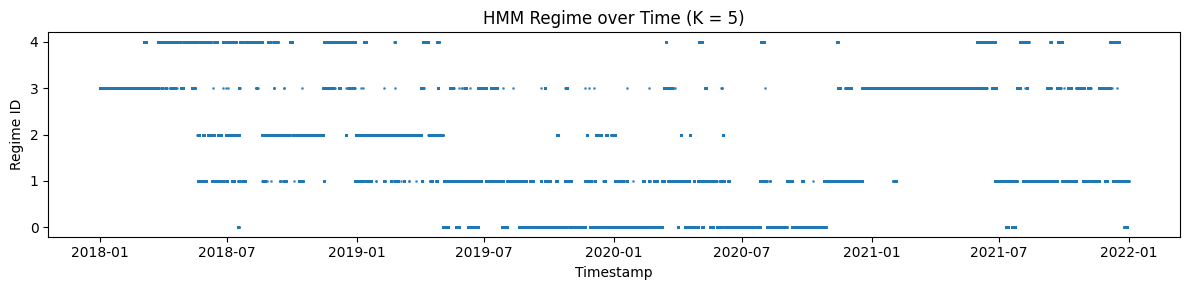

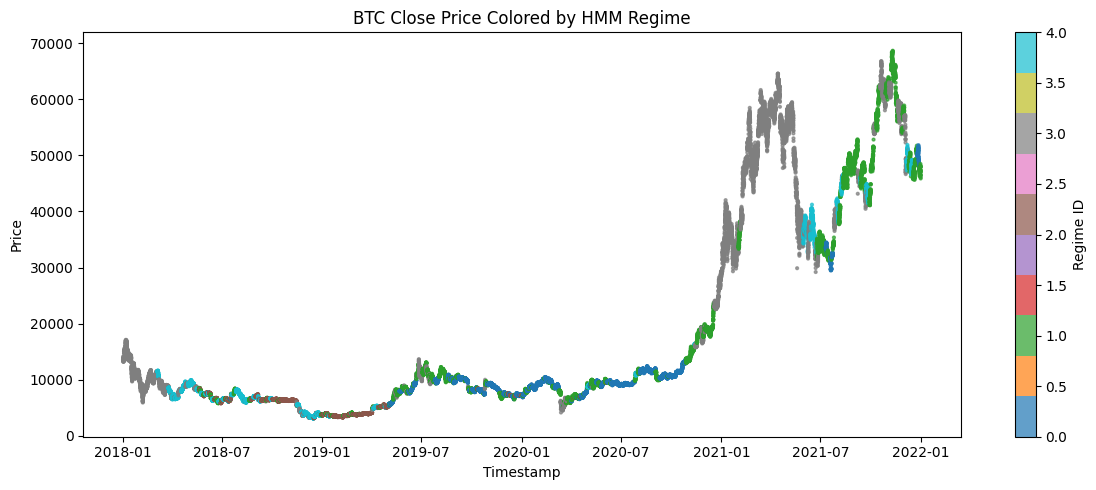

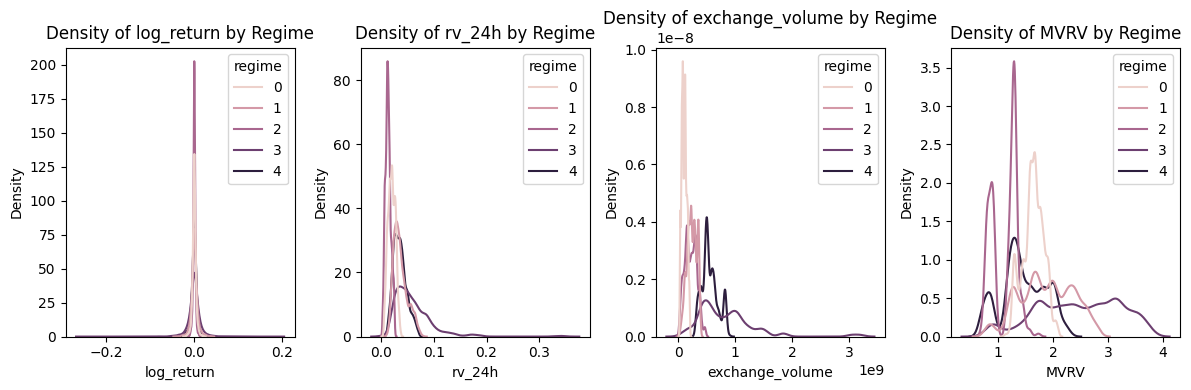


Regime emission means and variances:
 State 0: means = [ 0.0073 -0.5065 -0.7008  0.1571], variances = [0.236383 0.068432 0.018011 0.169884]
 State 1: means = [ 0.0239  0.2278 -0.3473  0.3422], variances = [0.837456 0.294925 0.06437  0.9563  ]
 State 2: means = [ 0.0017 -0.7634 -0.3355 -0.9705], variances = [0.092003 0.038391 0.102985 0.251266]
 State 3: means = [-0.0338  1.4935  1.6039  0.8204], variances = [4.231491 2.2819   1.803192 1.77597 ]
 State 4: means = [-0.0202  0.074   0.7458 -0.5145], variances = [0.599373 0.250208 0.226044 0.526925]

Transition matrix (T) and implied durations:
  State 0: T[0,0] = 0.9906 → E[duration] ≈ 106.4 hours
  State 1: T[1,1] = 0.9737 → E[duration] ≈ 38.1 hours
  State 2: T[2,2] = 0.9837 → E[duration] ≈ 61.5 hours
  State 3: T[3,3] = 0.9775 → E[duration] ≈ 44.5 hours
  State 4: T[4,4] = 0.9843 → E[duration] ≈ 63.9 hours

Full transition matrix:
               S0        S1             S2        S3             S4
S0   9.906038e-01  0.006890   1.06066

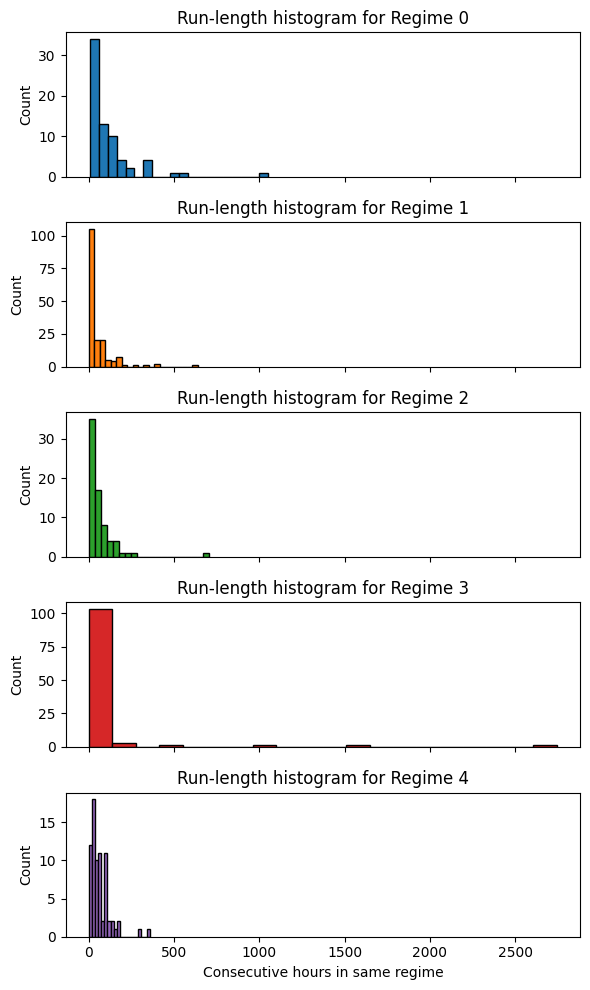

Pairwise Euclidean distances between emission-mean vectors:
  Distance between State 0 and State 1 = 0.836
  Distance between State 0 and State 2 = 1.213
  Distance between State 0 and State 3 = 3.123
  Distance between State 0 and State 4 = 1.698
  Distance between State 1 and State 2 = 1.645
  Distance between State 1 and State 3 = 2.375
  Distance between State 1 and State 4 = 1.398
  Distance between State 2 and State 3 = 3.473
  Distance between State 2 and State 4 = 1.442
  Distance between State 3 and State 4 = 2.129



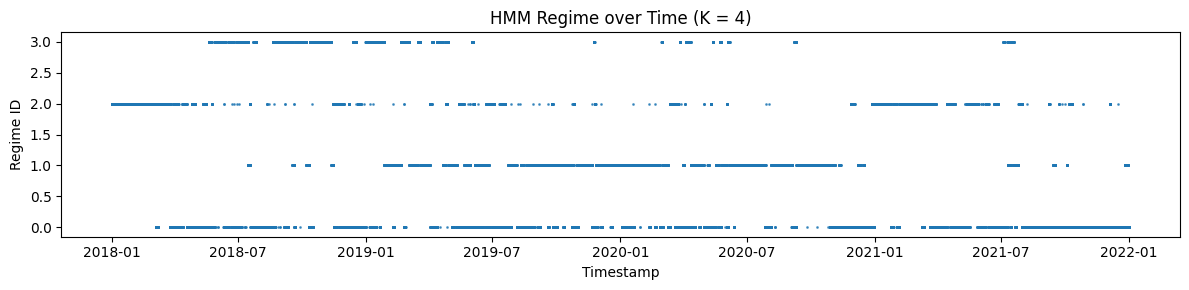

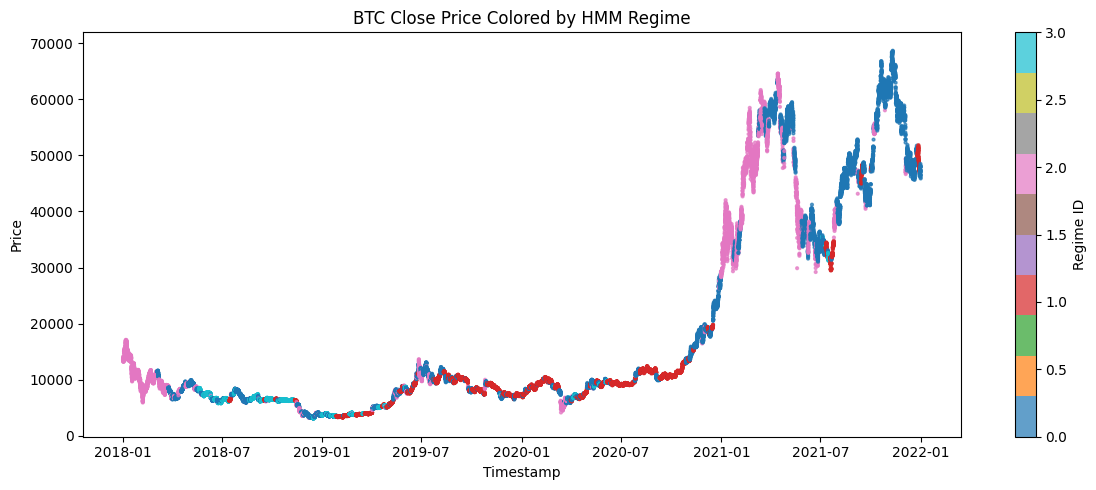

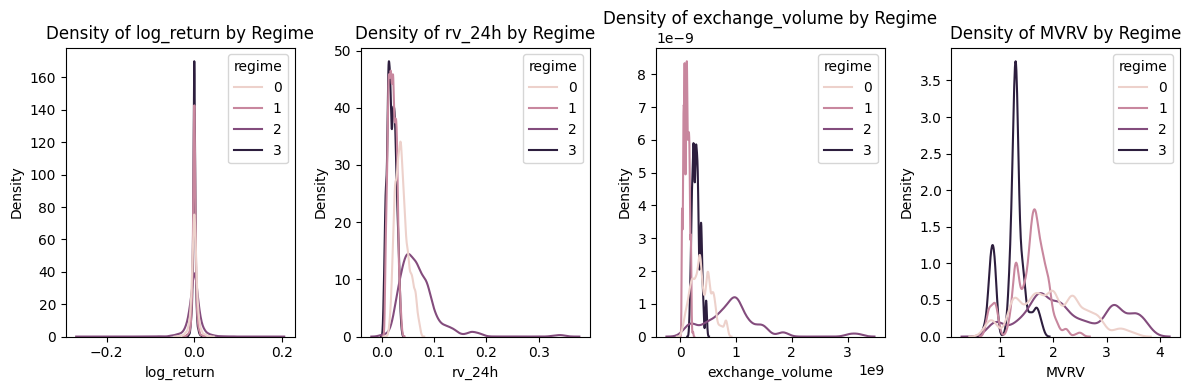


Regime emission means and variances:
 State 0: means = [0.0069 0.2736 0.169  0.1817], variances = [0.827523 0.266641 0.435249 1.300035]
 State 1: means = [ 0.0084 -0.5408 -0.679  -0.0446], variances = [0.220623 0.077766 0.020044 0.522549]
 State 2: means = [-0.0426  1.636   1.6936  0.5792], variances = [4.594761 2.224629 1.887162 1.526011]
 State 3: means = [ 0.0028 -0.5932 -0.1013 -0.7359], variances = [0.15068  0.088391 0.048335 0.260002]

Transition matrix (T) and implied durations:
  State 0: T[0,0] = 0.9738 → E[duration] ≈ 38.2 hours
  State 1: T[1,1] = 0.9918 → E[duration] ≈ 121.3 hours
  State 2: T[2,2] = 0.9728 → E[duration] ≈ 36.7 hours
  State 3: T[3,3] = 0.9824 → E[duration] ≈ 56.7 hours

Full transition matrix:
          S0            S1        S2            S3
S0  0.973792  9.262930e-03  0.008076  8.868587e-03
S1  0.005712  9.917546e-01  0.002228  3.059954e-04
S2  0.027241  5.885786e-09  0.972759  1.885272e-10
S3  0.012118  2.852225e-03  0.002651  9.823785e-01

Average ru

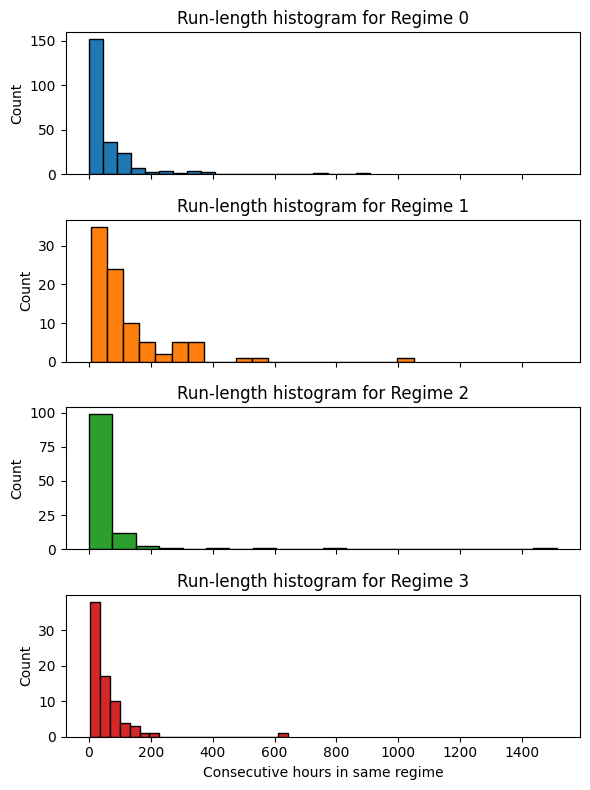

Pairwise Euclidean distances between emission-mean vectors:
  Distance between State 0 and State 1 = 1.197
  Distance between State 0 and State 2 = 2.084
  Distance between State 0 and State 3 = 1.291
  Distance between State 1 and State 2 = 3.280
  Distance between State 1 and State 3 = 0.902
  Distance between State 2 and State 3 = 3.150



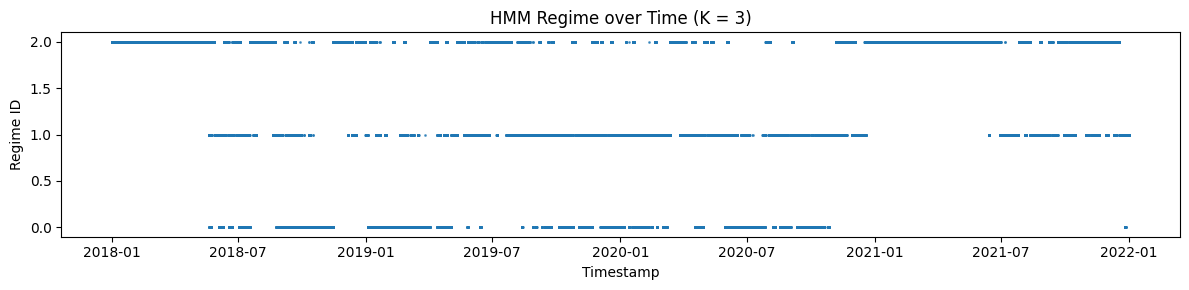

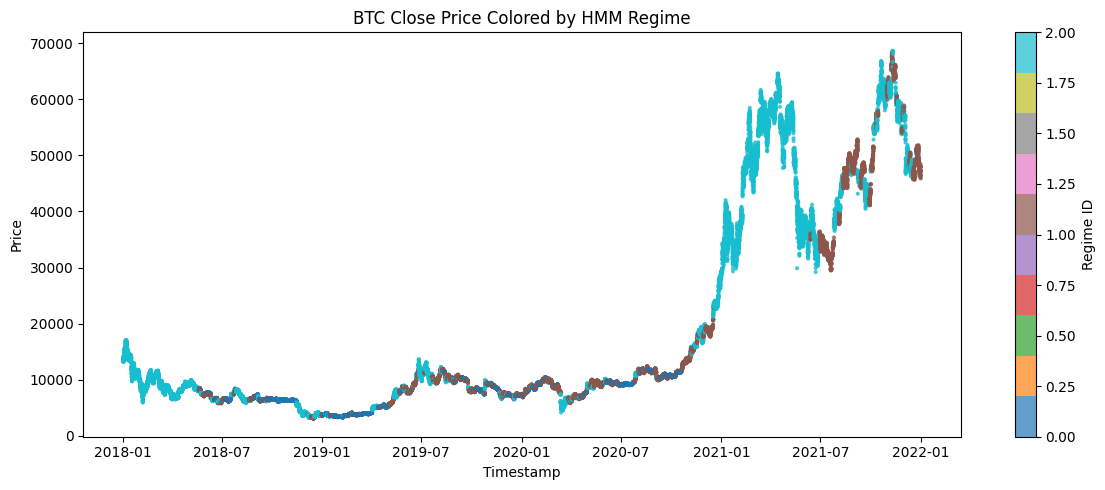

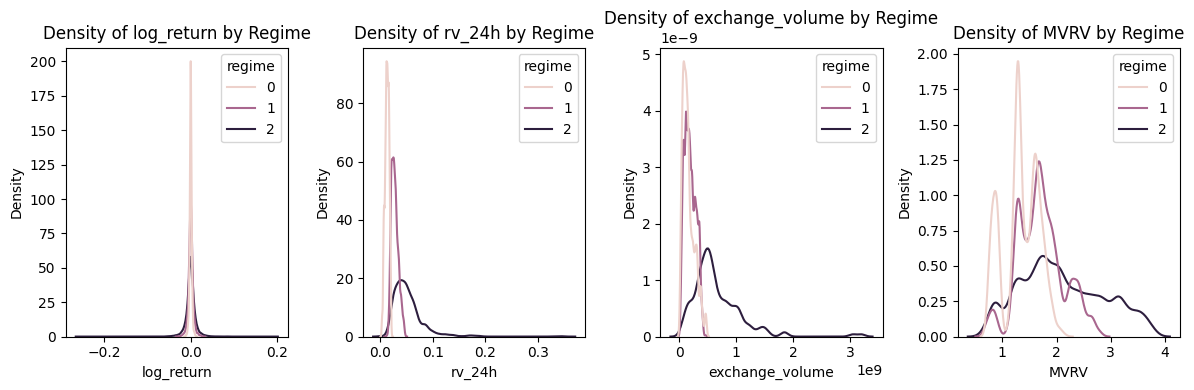


Regime emission means and variances:
 State 0: means = [ 6.000e-04 -7.823e-01 -5.105e-01 -4.647e-01], variances = [0.089575 0.022208 0.104523 0.503511]
 State 1: means = [ 0.0144 -0.2212 -0.4709  0.1053], variances = [0.429095 0.064835 0.087122 0.635307]
 State 2: means = [-0.0155  0.8728  0.9078  0.2734], variances = [2.339942 1.456819 1.414035 1.522262]

Transition matrix (T) and implied durations:
  State 0: T[0,0] = 0.9791 → E[duration] ≈ 47.9 hours
  State 1: T[1,1] = 0.9767 → E[duration] ≈ 42.8 hours
  State 2: T[2,2] = 0.9894 → E[duration] ≈ 94.5 hours

Full transition matrix:
          S0        S1        S2
S0  0.979132  0.017534  0.003334
S1  0.015774  0.976659  0.007567
S2  0.000840  0.009740  0.989420

Average run-length (# hours) per regime (empirical):
  State 0: avg run length = 52.2 hours
  State 1: avg run length = 52.1 hours
  State 2: avg run length = 133.7 hours



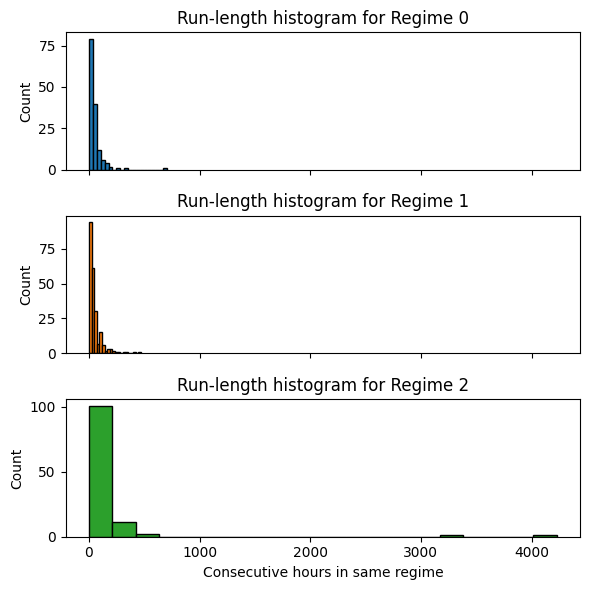

Pairwise Euclidean distances between emission-mean vectors:
  Distance between State 0 and State 1 = 0.801
  Distance between State 0 and State 2 = 2.301
  Distance between State 1 and State 2 = 1.768



In [225]:
#Visual & Statistical Analysis for a Given K ───
def analyze_hmm_for_k(
    K: int,
    X_train: np.ndarray,
    X_full:  np.ndarray,
    full_index: pd.DatetimeIndex,
    price_df: pd.DataFrame
):
    """
    Fits a K-state diag-cov GaussianHMM on X_train, predicts on X_full,
    and then visualizes regimes and prints emission stats & run-lengths.
    """
    model = GaussianHMM(
        n_components=K,
        covariance_type='diag',
        n_iter=200,
        random_state=42
    )
    model.fit(X_train)
    regime_labels = model.predict(X_full)

    # Attach regimes to a copy of the price DataFrame
    df_plot = price_df.copy()
    df_plot['regime'] = np.nan
    df_plot.loc[full_index, 'regime'] = regime_labels

    # 1) Plot regime ID over time
    plt.figure(figsize=(12, 3))
    plt.plot(df_plot.index, df_plot['regime'], '.', markersize=2, alpha=0.7)
    plt.title(f"HMM Regime over Time (K = {K})")
    plt.ylabel("Regime ID")
    plt.xlabel("Timestamp")
    plt.tight_layout()
    plt.show()

    # 2) Plot close price colored by regime
    plt.figure(figsize=(12, 5))
    sc = plt.scatter(
        x = df_plot.index,
        y = df_plot['close'],
        c = df_plot['regime'],
        cmap = 'tab10',
        s = 4,
        alpha = 0.7
    )
    plt.title("BTC Close Price Colored by HMM Regime")
    plt.ylabel("Price")
    plt.xlabel("Timestamp")
    plt.colorbar(sc, label="Regime ID")
    plt.tight_layout()
    plt.show()

    # 3) KDE plots of each feature by regime (only for 4-D analysis, adjust columns accordingly)
    #    If you want just the 2-D features, change the list below to ['log_return','rv_24h'].
    features_to_plot = ['log_return', 'rv_24h', 'exchange_volume', 'MVRV']
    df_sub = df_plot.dropna(subset=['regime']).copy()
    df_sub['regime'] = df_sub['regime'].astype(int)

    fig, axes = plt.subplots(1, len(features_to_plot), figsize=(12, 4))
    for i, feat in enumerate(features_to_plot):
        sns.kdeplot(
            data = df_sub,
            x    = feat,
            hue  = 'regime',
            common_norm = False,
            ax   = axes[i]
        )
        axes[i].set_title(f"Density of {feat} by Regime")

    plt.tight_layout()
    plt.show()

    # 4) Print emission means & variances
    print("\nRegime emission means and variances:")
    for state in range(K):
        mu_k  = model.means_[state]
        var_k = np.diag(model.covars_[state])
        print(f" State {state}: means = {np.round(mu_k,4)}, variances = {np.round(var_k,6)}")
    print()

    # 5) Print transition matrix & implied durations
    print("Transition matrix (T) and implied durations:")
    T_mat = model.transmat_
    for state in range(K):
        stay_prob = T_mat[state, state]
        duration = np.inf if stay_prob >= 0.9999 else 1.0 / (1.0 - stay_prob)
        print(f"  State {state}: T[{state},{state}] = {stay_prob:.4f} → E[duration] ≈ {duration:.1f} hours")
    print("\nFull transition matrix:")
    print(pd.DataFrame(
        T_mat,
        index = [f"S{j}" for j in range(K)],
        columns = [f"S{j}" for j in range(K)]
    ))
    print()

    # 6) Compute empirical run-lengths per regime
    regime_series = df_sub['regime']
    run_lengths = []
    prev_state = int(regime_series.iloc[0])
    count = 1
    for s in regime_series.iloc[1:]:
        s = int(s)
        if s == prev_state:
            count += 1
        else:
            run_lengths.append((prev_state, count))
            prev_state = s
            count = 1
    run_lengths.append((prev_state, count))
    df_runs = pd.DataFrame(run_lengths, columns=['regime','length'])

    print("Average run-length (# hours) per regime (empirical):")
    avg_len = df_runs.groupby('regime')['length'].mean()
    for state in range(K):
        if state in avg_len.index:
            print(f"  State {state}: avg run length = {avg_len.loc[state]:.1f} hours")
        else:
            print(f"  State {state}: (no runs observed)")
    print()

    # 7) Histogram of run-lengths
    fig, axs = plt.subplots(K, 1, figsize=(6, 2 * K), sharex=True)
    for state in range(K):
        lengths_k = df_runs[df_runs['regime'] == state]['length']
        if not lengths_k.empty:
            axs[state].hist(lengths_k, bins=20, color=f"C{state}", edgecolor='black')
        axs[state].set_title(f"Run-length histogram for Regime {state}")
        axs[state].set_ylabel("Count")
    axs[-1].set_xlabel("Consecutive hours in same regime")
    plt.tight_layout()
    plt.show()

    # 8) Pairwise Euclidean distances between emission-mean vectors (for K <= 8)
    if K <= 8:
        from itertools import combinations
        print("Pairwise Euclidean distances between emission-mean vectors:")
        mus = model.means_
        for i, j in combinations(range(K), 2):
            dist = np.linalg.norm(mus[i] - mus[j])
            print(f"  Distance between State {i} and State {j} = {dist:.3f}")
        print()

    return model, regime_labels

# Example: visualize/diagnose K=5, 4, and 3
_ = analyze_hmm_for_k(
    K          = 5,
    X_train    = X_train_4D_scaled,
    X_full     = X_full_4D_scaled,
    full_index = hmm_index,
    price_df   = prices
)
_ = analyze_hmm_for_k(
    K          = 4,
    X_train    = X_train_4D_scaled,
    X_full     = X_full_4D_scaled,
    full_index = hmm_index,
    price_df   = prices
)
_ = analyze_hmm_for_k(
    K          = 3,
    X_train    = X_train_4D_scaled,
    X_full     = X_full_4D_scaled,
    full_index = hmm_index,
    price_df   = prices
)

##### HMM 2D

In [226]:
#2-D HMM Fit & Comparison Metrics

#Prepare just the 2-D features [log_return, rv_24h]
features_2D = ['log_return', 'rv_24h']

X_train_2D = prices_train[features_2D]
X_test_2D  = prices_test[features_2D]
X_full_2D  = prices[features_2D]

scaler_2D = StandardScaler()
X_train_2D_scaled = scaler_2D.fit_transform(X_train_2D)
X_test_2D_scaled  = scaler_2D.transform(X_test_2D)
X_full_2D_scaled  = scaler_2D.transform(X_full_2D)

#Define a helper to fit a 3-state HMM and report comparison metrics
def fit_and_report(X_train, X_test, d):
    """
    Fits a 3-state diag-cov GaussianHMM on X_train, then returns a dict with:
      - logL_train, logL_test
      - CE_train, CE_test   (per-observation cross-entropy)
      - BIC_train, BIC_test
    """
    model = GaussianHMM(n_components=3, covariance_type='diag', n_iter=200, random_state=42)
    model.fit(X_train)

    # Joint log-likelihood on train and test
    logL_train = model.score(X_train)
    logL_test  = model.score(X_test)

    T_train, T_test = X_train.shape[0], X_test.shape[0]

    # Per-observation cross-entropy:  -logL / (T * d)
    ce_train = -logL_train / (T_train * d)
    ce_test  = -logL_test  / (T_test  * d)

    # Count free parameters (diag-cov case):
    k = model.n_components
    param_trans = k * (k - 1)      # transition matrix (rows sum to 1)
    param_init  = k - 1            # initial state probabilities
    param_means = k * d            # one mean per state per dimension
    param_covs  = k * d            # diagonal covariances
    p = param_trans + param_init + param_means + param_covs

    # BIC = -2*logL + p * log(T)
    bic_train = -2 * logL_train + p * np.log(T_train)
    bic_test  = -2 * logL_test  + p * np.log(T_test)

    return {
        "logL_train": logL_train,
        "logL_test":  logL_test,
        "CE_train":   ce_train,
        "CE_test":    ce_test,
        "BIC_train":  bic_train,
        "BIC_test":   bic_test
    }

# (3) Compute metrics for 2-D and 4-D HMMs
results_2D = fit_and_report(X_train_2D_scaled, X_test_2D_scaled, d=2)
results_4D = fit_and_report(X_train_4D_scaled, X_test_4D_scaled, d=4)

# (4) Tabulate comparison
df_compare = pd.DataFrame({
    "Metric":     ["logL_train", "logL_test", "CE_train", "CE_test", "BIC_train", "BIC_test"],
    "2D HMM":     [results_2D[m] for m in ["logL_train","logL_test","CE_train","CE_test","BIC_train","BIC_test"]],
    "4D HMM":     [results_4D[m] for m in ["logL_train","logL_test","CE_train","CE_test","BIC_train","BIC_test"]]
})
df_compare.set_index("Metric", inplace=True)

print("Comparison of 2-D vs 4-D HMM:")
print(df_compare.round(2))


Comparison of 2-D vs 4-D HMM:
              2D HMM     4D HMM
Metric                         
logL_train -35466.68  -95038.41
logL_test  -18121.31  -64473.53
CE_train        0.67       0.90
CE_test         1.03       1.84
BIC_train   71136.91  190402.51
BIC_test    36424.18  129237.56


In [227]:
"""
Now that we have selected K=3 and 2D for the HMM regime dectection we add those into our data as features
"""
model_2D_k3 = GaussianHMM(
    n_components=3,
    covariance_type='diag',
    n_iter=200,
    random_state=42
)
model_2D_k3.fit(X_train_2D_scaled)
regime_labels_full_2D = model_2D_k3.predict(X_full_2D_scaled)
prices_with_regimes_2D = prices.copy()
prices_with_regimes_2D['regime'] = regime_labels_full_2D

In [228]:
print(prices_with_regimes_2D['regime'].value_counts())

regime
0    15363
2    10162
1     9538
Name: count, dtype: int64


In [229]:
prices_train_labeled = prices_with_regimes_2D.loc[
    prices_with_regimes_2D.index <= train_cutoff
].copy()

prices_test_labeled = prices_with_regimes_2D.loc[
    prices_with_regimes_2D.index > train_cutoff
].copy()

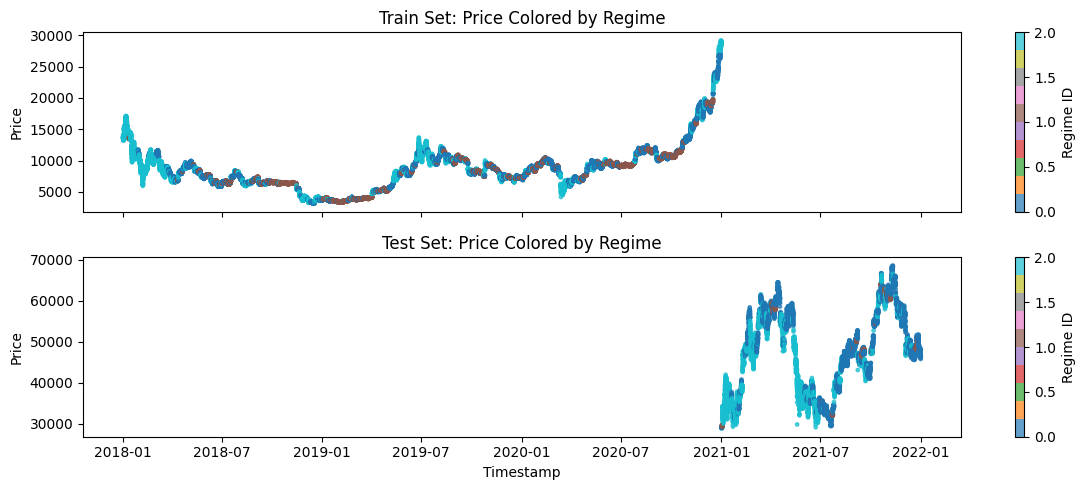

In [230]:
fig, axes = plt.subplots(2, 1, figsize=(12, 5), sharex=True)

ax = axes[0]
subset = prices_train_labeled
scatter = ax.scatter(
    x = subset.index,
    y = subset['close'],
    c = subset['regime'],
    cmap = 'tab10',
    s = 6,
    alpha = 0.7
)
ax.set_title("Train Set: Price Colored by Regime")
ax.set_ylabel("Price")

plt.colorbar(scatter, ax=ax, label="Regime ID")


ax = axes[1]
subset = prices_test_labeled
scatter = ax.scatter(
    x = subset.index,
    y = subset['close'],
    c = subset['regime'],
    cmap = 'tab10',
    s = 6,
    alpha = 0.7
)
ax.set_title("Test Set: Price Colored by Regime")
ax.set_ylabel("Price")
ax.set_xlabel("Timestamp")
plt.colorbar(scatter, ax=ax, label="Regime ID")

plt.tight_layout()
plt.show()


In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def making_graphs_by_regime(df):
    # --- A) Sharpe ratio per regime ---
    grp = df.groupby('regime')['log_return']
    stats = grp.agg(['mean','std','count']).rename(columns={'mean':'μ','std':'σ'})
    stats['Sharpe'] = stats['μ'] / stats['σ']

    # --- B) Cumulative returns per regime ---
    for k in [0,1,2]:
        df[f'ret_regime_{k}'] = np.where(
            df['regime'] == k,
            df['log_return'],
            0.0
        )
        df[f'cumret_regime_{k}'] = df[f'ret_regime_{k}'].cumsum()

    # --- Begin plotting dashboard ---
    fig = plt.figure(constrained_layout=True, figsize=(12, 10))
    gs  = fig.add_gridspec(3, 2)

    # 1) Sharpe bar chart (top left)
    ax0 = fig.add_subplot(gs[0, 0])
    bars = ax0.bar(
        x = stats.index.astype(str),
        height = stats['Sharpe'],
        color = ['#4C72B0','#55A868','#C44E52'],
        alpha = 0.8
    )
    ax0.set_title("Sharpe Ratio by Regime")
    ax0.set_xlabel("Regime ID")
    ax0.set_ylabel("Sharpe = μ/σ")
    for rect, val in zip(bars, stats['Sharpe'].round(3)):
        ax0.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 0.001, f"{val}", 
                ha='center', va='bottom', fontsize=9)
    ax0.grid(alpha=0.2)

    # 2) Cumulative returns (Regime 0, top right)
    ax1 = fig.add_subplot(gs[0, 1])
    ax1.plot(
        df.index,
        df['cumret_regime_0'],
        color='#4C72B0',
        label='Regime 0'
    )
    ax1.set_title("Cum. Return if in Regime 0")
    ax1.set_ylabel("Cumulative log-return")
    ax1.legend(loc='upper left')
    ax1.grid(alpha=0.2)

    # 3) Cumulative returns (Regime 1, middle left)
    ax2 = fig.add_subplot(gs[1, 0])
    ax2.plot(
        df.index,
        df['cumret_regime_1'],
        color='#55A868',
        label='Regime 1'
    )
    ax2.set_title("Cum. Return if in Regime 1")
    ax2.set_ylabel("Cumulative log-return")
    ax2.legend(loc='upper left')
    ax2.grid(alpha=0.2)

    # 4) Cumulative returns (Regime 2, middle right)
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.plot(
        df.index,
        df['cumret_regime_2'],
        color='#C44E52',
        label='Regime 2'
    )
    ax3.set_title("Cum. Return if in Regime 2")
    ax3.set_ylabel("Cumulative log-return")
    ax3.legend(loc='upper left')
    ax3.grid(alpha=0.2)

    # 5) Boxplot of log_return by regime (bottom left)
    ax4 = fig.add_subplot(gs[2, 0])
    sns.boxplot(
        data = df,
        x    = 'regime',
        y    = 'log_return',
        palette = ['#4C72B0','#55A868','#C44E52'],
        ax   = ax4
    )
    ax4.set_title("Distribution of log_return by Regime")
    ax4.set_xlabel("Regime ID")
    ax4.set_ylabel("log_return")
    ax4.grid(axis='y', alpha=0.2)

    # 6) Boxplot of rv_24h by regime (bottom right)
    ax5 = fig.add_subplot(gs[2, 1])
    sns.boxplot(
        data = df,
        x    = 'regime',
        y    = 'rv_24h',
        palette = ['#4C72B0','#55A868','#C44E52'],
        ax   = ax5
    )
    ax5.set_title("Distribution of rv_24h by Regime")
    ax5.set_xlabel("Regime ID")
    ax5.set_ylabel("rv_24h")
    ax5.grid(axis='y', alpha=0.2)

    plt.tight_layout()
    plt.show()

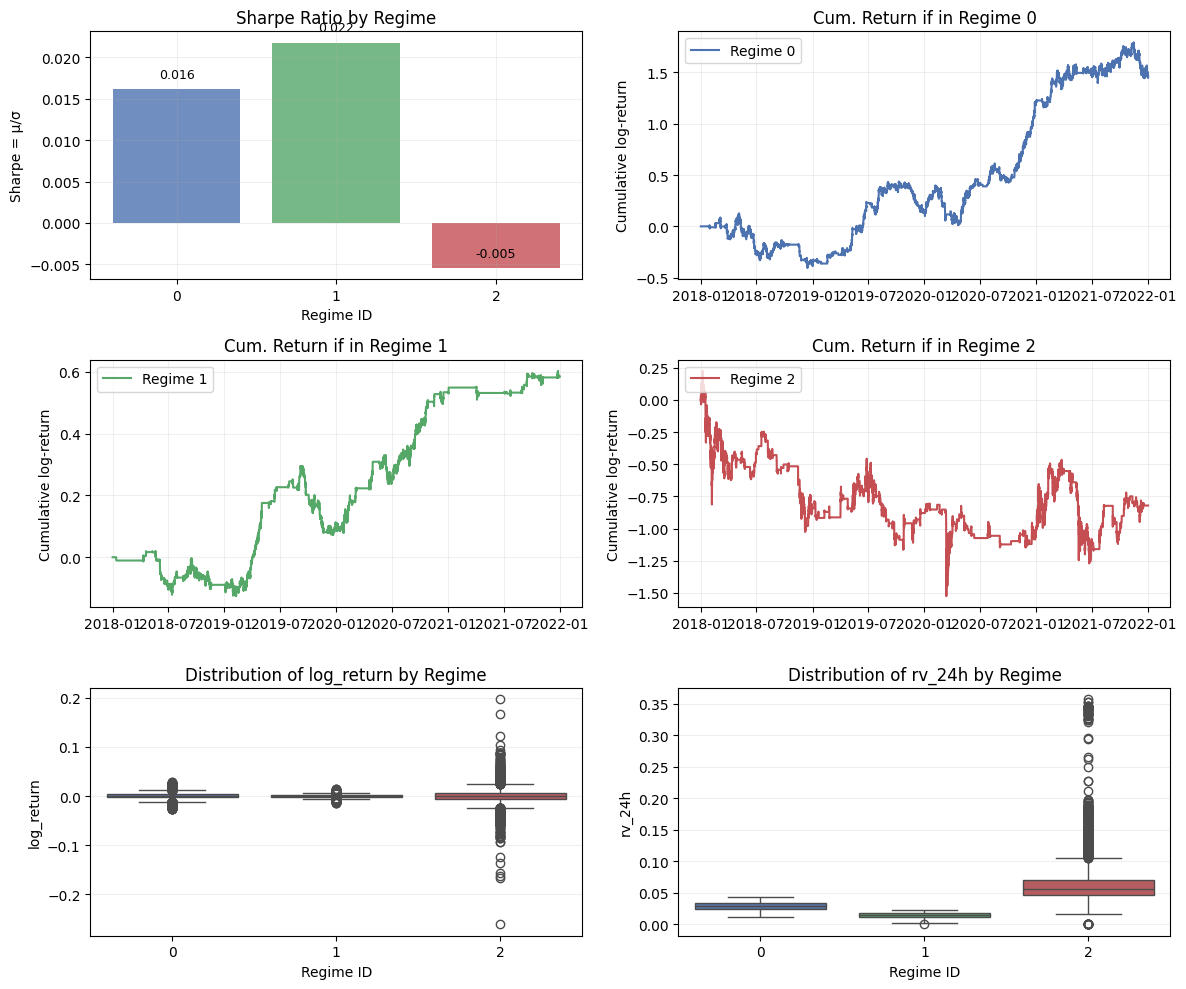

In [232]:
making_graphs_by_regime(prices_with_regimes_2D)

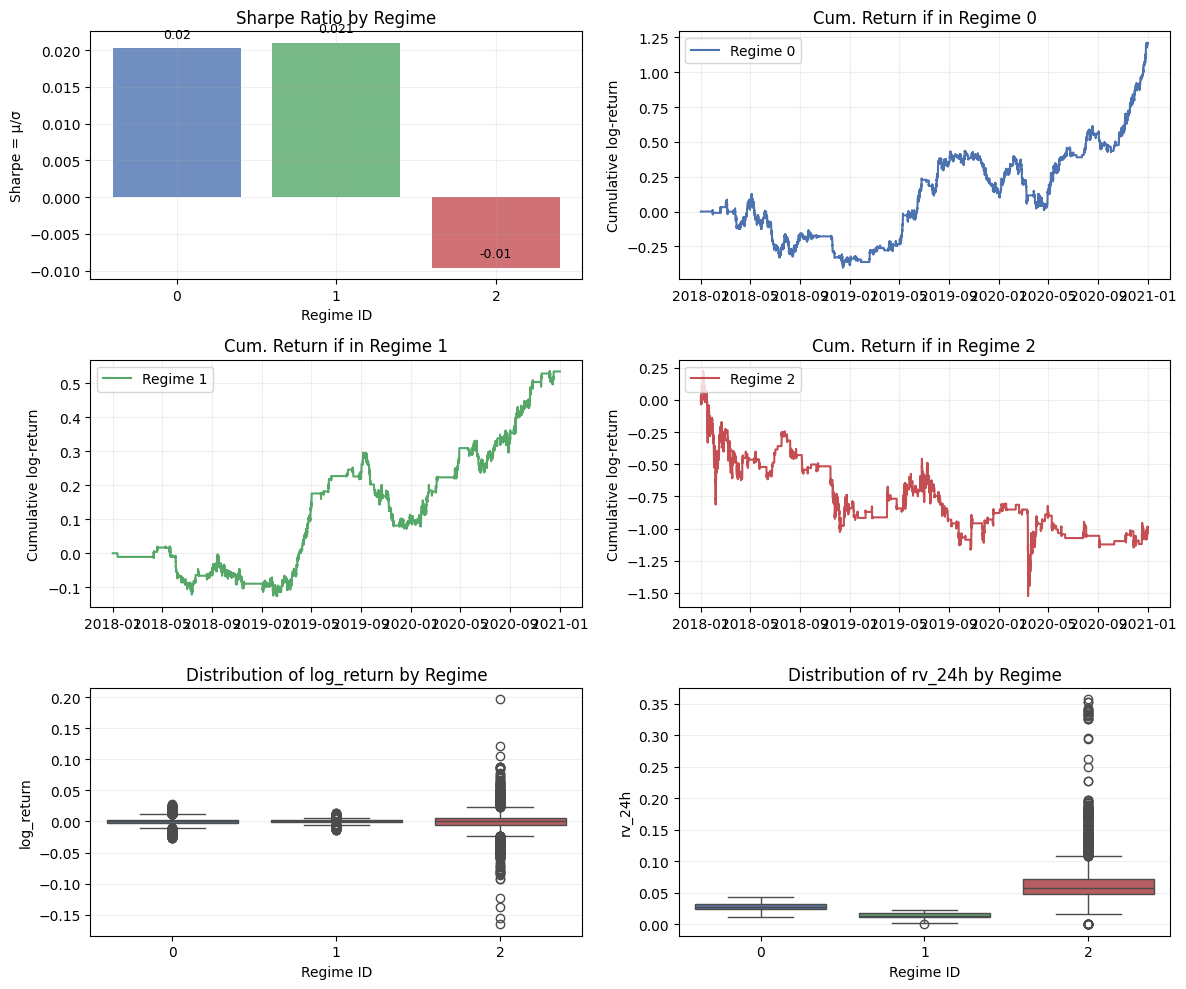

In [233]:
making_graphs_by_regime(prices_train_labeled)

In [234]:
prices_with_regimes_2D['is_regime_0'] = (prices_with_regimes_2D['regime'] == 0).astype(int)
prices_with_regimes_2D['is_regime_1'] = (prices_with_regimes_2D['regime'] == 1).astype(int)
prices_with_regimes_2D['is_regime_2'] = (prices_with_regimes_2D['regime'] == 2).astype(int)

#### Appending the trend_df to the prices with regime

In [235]:
prices_with_regimes_2D = prices_with_regimes_2D.sort_index()
trend_df = trend_df.sort_index()
prices_with_regimes_2D = prices_with_regimes_2D.join(
    trend_df[['t1','tVal','bin','windowSize']],
    how='left'
)

In [236]:
prices_train_labeled = prices_with_regimes_2D.loc[
    prices_with_regimes_2D.index <= train_cutoff
].copy()

prices_test_labeled = prices_with_regimes_2D.loc[
    prices_with_regimes_2D.index > train_cutoff
].copy()

In [237]:
prices_train_labeled = prices_train_labeled.dropna(subset=['bin']).copy()
prices_test_labeled = prices_test_labeled.dropna(subset=['bin']).copy()

#### Save to CSV for future easy of use

In [238]:
prices_train_labeled.to_csv('prices_train_labeled_final.csv', index=True)  
prices_test_labeled.to_csv('prices_test_labeled_final.csv', index=True)
prices_with_regimes_2D.to_csv('prices_with_regimes_final.csv', index = True)

#### Loading the new data in (after feature eng + HMM + trend scanning)


In [239]:
url_train = "https://drive.google.com/uc?id=1RmrpUfiqfqOp5Jb5attauKcltLEx1zKh"
url_test  = "https://drive.google.com/uc?id=1ONursxl7CKdAlf0t_Slmy2_w_Bzj2QbB"
url_all = "https://drive.google.com/uc?id=1drMM8_c-43cOmGjirp4-CRz1RBwgFK_V"

prices_train = pd.read_csv(url_train, parse_dates=True, index_col=0)
prices_test  = pd.read_csv(url_test,  parse_dates=True, index_col=0)
prices  = pd.read_csv(url_all,  parse_dates=True, index_col=0)

In [240]:
print("Full data set target variable balance check: ")
print(prices['bin'].value_counts())
print("Train data set target variable balance check: ")
print(prices_train['bin'].value_counts())

Full data set target variable balance check: 
bin
 1.0    18873
-1.0    16095
Name: count, dtype: int64
Train data set target variable balance check: 
bin
 1.0    14226
-1.0    12077
Name: count, dtype: int64


In [241]:
prices_train_meta = prices_train.copy() # for meta labelling later on

#### X,y split train and test

In [242]:
"""
DATA LOADING
"""

prices['year'] = prices.index.year
prices_train['year'] = prices_train.index.year
prices_test['year'] = prices_test.index.year


X_train = prices_train.drop(columns = ['bin'])
y_train = prices_train['bin'].replace({-1:0,1:1}).astype(int)

X_test = prices_test.drop(columns = ['bin'])
y_test = prices_test['bin'].replace({-1:0,1:1}).astype(int)

X_all = prices.drop(columns = ['bin'])
y_all = prices['bin'].replace({-1:0,1:1}).astype(int)

#### Preprocessing the data

In [243]:
def preprocess_data(df):
    special_log_cols     = ['MVRV', 'nvt']
    special_logdiff_cols = ['n_unique_addresses']
    special_log1p_cols   = ['exchange_volume']

    returns_vol_cols = [
        c for c in df.columns
        if c.startswith('return') or c.startswith('log_return') or c.startswith('volatility')
    ]
    ema_cols = [c for c in df.columns if c in ['ema21','ema35','ema80','ema250']]
    sma_cols = [c for c in df.columns if c in ['sma50','sma200','sma20']]
    other_cont = [
        'rsi14','bb_percent_b','bb_bandwidth','macd_line','macd_hist',
        'adx14','obv','bb_mid','bb_upper','bb_lower','bb_percent_b','bb_bandwidth',
        'plus_di14','minus_di14','%K','%D','obv_sma20'
    ]
    all_continuous = sma_cols + returns_vol_cols + ema_cols + other_cont + ['volume','vwap']
    rest_continuous = [
        c for c in all_continuous
        if c not in special_log_cols + special_logdiff_cols + special_log1p_cols
    ]

    binary_cols = [
        c for c in df.columns
        if c.endswith('cross') or c.endswith('above') or c.endswith('below') or c.startswith('is_regime')
    ]

    log_transform = FunctionTransformer(np.log1p, validate=True)

    def logdiff_column(X):
        col = X.astype(float).ravel()
        logged = np.log1p(col)
        diffed = np.diff(logged, prepend=logged[0])
        return diffed.reshape(-1, 1)
    logdiff_transform = FunctionTransformer(logdiff_column, validate=True)

    log1p_transform = FunctionTransformer(np.log1p, validate=True)

    mvrv_pipeline = Pipeline([('log', log_transform), ('scale', StandardScaler())])
    nvt_pipeline  = Pipeline([('log', log_transform), ('scale', StandardScaler())])
    nua_pipeline  = Pipeline([('logdiff', logdiff_transform), ('scale', StandardScaler())])
    exch_pipeline = Pipeline([('log1p', log1p_transform), ('scale', StandardScaler())])
    rest_pipeline = Pipeline([('scale', StandardScaler())])

    preprocessor = ColumnTransformer([
        ('mvrv_log',    mvrv_pipeline,     ['MVRV']),
        ('nvt_log',     nvt_pipeline,      ['nvt']),
        ('nua_logdiff', nua_pipeline,      ['n_unique_addresses']),
        ('exch_log1p',  exch_pipeline,     ['exchange_volume']),
        ('rest_cont_z', rest_pipeline,     rest_continuous),
        ('passthrough_bin', 'passthrough',  binary_cols),
    ], remainder='drop')

    return preprocessor

#Build template preprocessor for feature names
template_preprocessor = preprocess_data(prices)

In [244]:
# Helper to get transformed feature names
def get_transformed_feature_names():
    ct = template_preprocessor
    ct.fit(X_all.drop(columns=['year']))  # fitting on entire dataset for naming
    try:
        return ct.get_feature_names_out()
    except:
        # sklearn <1.0 compatibility
        output = []
        for name, trans, cols in ct.transformers_:
            if trans == 'drop':
                continue
            if trans == 'passthrough':
                output.extend(cols)
            else:
                # prefix each column with transformer name
                if hasattr(trans, 'named_steps'):
                    last_step = list(trans.named_steps.keys())[-1]
                    for col in cols:
                        output.append(f"{name}__{col}")
                else:
                    for col in cols:
                        output.append(f"{name}__{col}")
        return np.array(output)

feat_names = get_transformed_feature_names()

#### Baseline Model Random Forest

In [280]:
def run_baseline_rf(X, y, split_type='timeseries'):
    """
    Baseline RandomForest:
      - 'timeseries': uses X_train/y_train for CV and X_test/y_test for hold‐out
      - 'year': uses X_all/y_all, leave‐one‐year‐out CV, final train on 2018–2020 and test on 2021
    Returns nicely formatted metrics and plots top‐10 feature importances.
    """
    # Prepare
    if 'year' in X.columns:
        X = X.drop(columns=['year'])
    n = len(X)
    oof_preds = np.zeros(n, dtype=int)
    fi_list = []

    # Build splits
    if split_type == 'timeseries':
        tscv = TimeSeriesSplit(n_splits=3)
        splits = list(tscv.split(np.arange(n)))
    else:
        years = X_all['year'].unique()
        splits = []
        for yr in years:
            train_idx = X_all[X_all['year'] != yr].index
            val_idx   = X_all[X_all['year'] == yr].index
            train_idx = [X.index.get_loc(i) for i in train_idx if i in X.index]
            val_idx   = [X.index.get_loc(i) for i in val_idx if i in X.index]
            if len(train_idx) and len(val_idx):
                splits.append((train_idx, val_idx))

    # CV loop
    for train_idx, val_idx in splits:
        pre = preprocess_data(prices)
        X_train_proc = pre.fit_transform(X.iloc[train_idx])
        X_val_proc   = pre.transform(X.iloc[val_idx])

        y_train_fold = y.iloc[train_idx]
        y_val_fold   = y.iloc[val_idx]

        rf = RandomForestClassifier(
            n_estimators=100,
            random_state=42,
            class_weight='balanced',
            n_jobs=-1
        )
        rf.fit(X_train_proc, y_train_fold)

        fi_list.append(rf.feature_importances_)
        oof_preds[val_idx] = rf.predict(X_val_proc)

    # Compute OOF metrics
    valid_mask = np.zeros(n, dtype=bool)
    for _, val_idx in splits:
        valid_mask[val_idx] = True

    y_true_oof = y.iloc[valid_mask].to_numpy()
    y_pred_oof = oof_preds[valid_mask]

    oof_acc = accuracy_score(y_true_oof, y_pred_oof)
    oof_bal = balanced_accuracy_score(y_true_oof, y_pred_oof)
    oof_f1  = f1_score(y_true_oof, y_pred_oof)
    oof_cm  = confusion_matrix(y_true_oof, y_pred_oof)

    # Top‐10 feature importances
    avg_fi = np.mean(np.vstack(fi_list), axis=0)
    top10_idx = np.argsort(avg_fi)[-10:][::-1]
    top10_feats = feat_names[top10_idx]
    top10_vals  = avg_fi[top10_idx]

    plt.figure(figsize=(8, 5))
    sns.barplot(x=top10_vals, y=top10_feats, palette="viridis")
    plt.title(f"Top 10 Feature Importances ({split_type} CV)")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

    # Final train/test
    if split_type == 'timeseries':
        # Use X_train, y_train and X_test, y_test from outer scope
        pre_full = preprocess_data(prices)
        X_proc_train = pre_full.fit_transform(X_train)
        X_proc_test  = pre_full.transform(X_test)
        y_proc_train = y_train
        y_proc_test  = y_test
    else:
        # Use X_all, y_all split by year
        pre_full = preprocess_data(prices)
        train_mask = (prices['year'] <= 2020).values
        test_mask  = (prices['year'] == 2021).values
        X_proc_train = pre_full.fit_transform(X_all.iloc[train_mask])
        y_proc_train = y_all.iloc[train_mask]
        X_proc_test  = pre_full.transform(X_all.iloc[test_mask])
        y_proc_test  = y_all.iloc[test_mask]

    rf_full = RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    )
    rf_full.fit(X_proc_train, y_proc_train)
    test_preds = rf_full.predict(X_proc_test)

    test_acc = accuracy_score(y_proc_test, test_preds)
    test_bal = balanced_accuracy_score(y_proc_test, test_preds)
    test_f1  = f1_score(y_proc_test, test_preds)
    test_cm  = confusion_matrix(y_proc_test, test_preds)

    # Print metrics 
    print(f"===== {split_type.upper()} CV – OOF METRICS =====")
    print(f"Accuracy       : {oof_acc:.4f}")
    print(f"Balanced Acc   : {oof_bal:.4f}")
    print(f"F1 Score       : {oof_f1:.4f}")
    print("Confusion Matrix (OOF):")
    print(oof_cm)
    print()

    return {
        "oof_metrics": {"acc": oof_acc, "balanced_acc": oof_bal, "f1": oof_f1, "cm": oof_cm},
    }

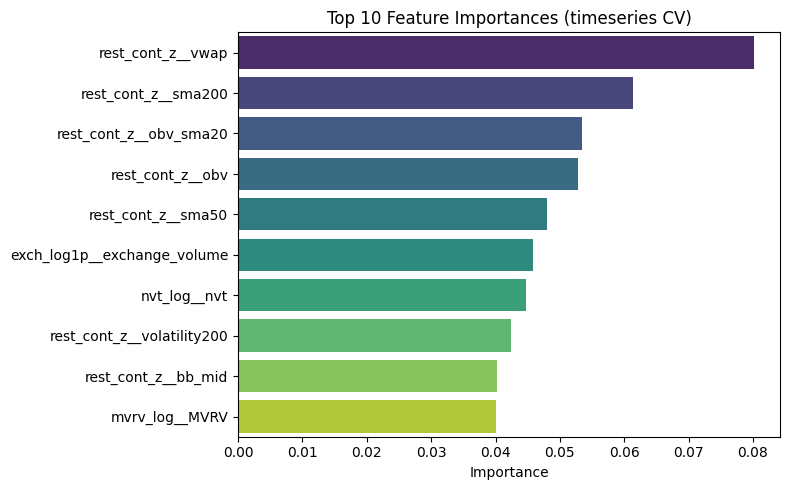

===== TIMESERIES CV – OOF METRICS =====
Accuracy       : 0.4793
Balanced Acc   : 0.4814
F1 Score       : 0.5004
Confusion Matrix (OOF):
[[4311 4334]
 [5937 5143]]



In [281]:
baseline_ts   = run_baseline_rf(X_train, y_train, split_type='timeseries')

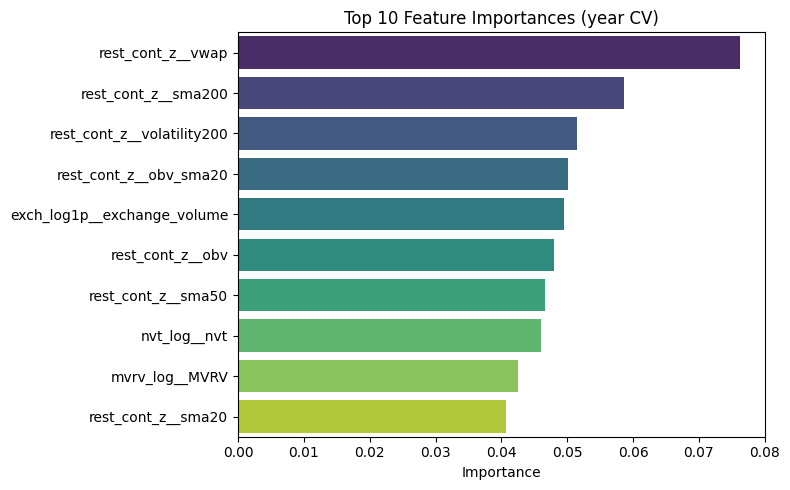

===== YEAR CV – OOF METRICS =====
Accuracy       : 0.4940
Balanced Acc   : 0.4773
F1 Score       : 0.5948
Confusion Matrix (OOF):
[[ 4288 11807]
 [ 5886 12987]]



In [282]:
baseline_year = run_baseline_rf(X_all, y_all, split_type='year')

#### LSTM

In [248]:
# ───────────────────────────────────────────────────────────────────────────────
# 1. SLIDING‐WINDOW DATASET FOR LSTM
# ───────────────────────────────────────────────────────────────────────────────

class SlidingWindowDataset(Dataset):
    def __init__(self, X: np.ndarray, y: np.ndarray, window_size: int = 30):
        """
        X: preprocessed numpy array of shape (n_samples, n_features)
        y: numpy array of labels (n_samples,)
        window_size: number of past days per training sample
        """
        self.window_size = window_size
        self.X = X.astype(np.float32)
        self.y = y.astype(np.int64)
        self.indices = np.arange(len(X) - window_size + 1)

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, idx):
        start = self.indices[idx]
        end   = start + self.window_size
        x_seq = self.X[start:end, :]    # shape: (window_size, n_features)
        y_lbl = self.y[end - 1]         # label at last time step
        return x_seq, y_lbl

# ───────────────────────────────────────────────────────────────────────────────
# 2. LSTM CLASSIFIER DEFINITION
# ───────────────────────────────────────────────────────────────────────────────

class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size=32, num_layers=1, num_classes=2):
        super().__init__()
        self.lstm = nn.LSTM(input_size=input_size,
                            hidden_size=hidden_size,
                            num_layers=num_layers,
                            batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # x: (batch_size, seq_len, input_size)
        _, (hn, _) = self.lstm(x)
        last_hidden = hn[-1]            # (batch_size, hidden_size)
        logits = self.fc(last_hidden)   # (batch_size, num_classes)
        return logits

In [249]:
def train_epoch(model, loader, optimizer, criterion, device):
    model.train()
    for x_batch, y_batch in loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        optimizer.zero_grad()
        logits = model(x_batch)                     # (batch, num_classes)
        loss = criterion(logits, y_batch)
        loss.backward()
        optimizer.step()

def eval_model(model, loader, device):
    model.eval()
    preds_list, labels_list = [], []
    with torch.no_grad():
        for x_batch, y_batch in loader:
            x_batch = x_batch.to(device)
            logits = model(x_batch)                          # (batch, num_classes)
            preds = torch.argmax(logits, dim=1).cpu().numpy()
            preds_list.append(preds)
            labels_list.append(y_batch.numpy())
    return np.concatenate(preds_list), np.concatenate(labels_list)

In [250]:
def run_lstm(X, y, split_type='timeseries',
             hidden_size=32, num_layers=1, lr=1e-3,
             window_size=30, batch_size=64, num_epochs=5):
    """
    Trains LSTM with:
      - split_type='timeseries': TimeSeriesSplit(3) on X_train/y_train, then evaluate on X_test/y_test
      - split_type='year':     leave‐one‐year‐out on X_all/y_all, then final train on 2018–2020, eval on 2021
    Assumes preprocess_data(df) function and dataframes prices, X_train, y_train, X_test, y_test, X_all, y_all exist.
    """
    device = "cuda" if torch.cuda.is_available() else "cpu"

    # Drop 'year' if present
    if 'year' in X.columns:
        X = X.drop(columns=['year'])
    n = len(X)
    oof_preds = np.zeros(n, dtype=int)

    # Build splits
    if split_type == 'timeseries':
        tscv = TimeSeriesSplit(n_splits=3)
        splits = list(tscv.split(np.arange(n)))
    else:
        years = X_all['year'].unique()
        splits = []
        for yr in years:
            train_idx = X_all[X_all['year'] != yr].index
            val_idx   = X_all[X_all['year'] == yr].index
            train_idx = [X.index.get_loc(i) for i in train_idx if i in X.index]
            val_idx   = [X.index.get_loc(i) for i in val_idx if i in X.index]
            if train_idx and val_idx:
                splits.append((train_idx, val_idx))

    # --- 4.1) OOF LOOP ---
    for train_idx, val_idx in splits:
        # 4.1.1) Preprocess
        pre = preprocess_data(prices)
        X_train_df = X.iloc[train_idx]
        X_val_df   = X.iloc[val_idx]

        X_train_proc = pre.fit_transform(X_train_df)
        X_val_proc   = pre.transform(X_val_df)

        y_train_fold = y.iloc[train_idx].to_numpy()
        y_val_fold   = y.iloc[val_idx].to_numpy()

        # 4.1.2) Build sliding‐window datasets
        train_ds = SlidingWindowDataset(X_train_proc, y_train_fold, window_size=window_size)
        val_ds   = SlidingWindowDataset(X_val_proc,   y_val_fold,   window_size=window_size)

        train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
        val_loader   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False)

        # 4.1.3) Instantiate model
        input_size = X_train_proc.shape[1]  # number of features after preprocessing
        model = LSTMClassifier(input_size=input_size,
                               hidden_size=hidden_size,
                               num_layers=num_layers,
                               num_classes=2).to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)

        # 4.1.4) Train for num_epochs
        for epoch in range(num_epochs):
            train_epoch(model, train_loader, optimizer, criterion, device)

        # 4.1.5) Predict on validation windows
        val_preds, _ = eval_model(model, val_loader, device)

        # 4.1.6) Align windowed preds to original indices
        valid_global_idxs = val_idx[window_size - 1 :]
        oof_preds[valid_global_idxs] = val_preds

    # 4.2) Compute OOF metrics
    valid_mask = np.zeros(n, dtype=bool)
    for _, val_idx in splits:
        valid_mask[val_idx[window_size - 1 :]] = True

    y_true_oof = y.to_numpy()[valid_mask]
    y_pred_oof = oof_preds[valid_mask]

    oof_acc = accuracy_score(y_true_oof, y_pred_oof)
    oof_bal = balanced_accuracy_score(y_true_oof, y_pred_oof)
    oof_f1  = f1_score(y_true_oof, y_pred_oof)
    oof_cm  = confusion_matrix(y_true_oof, y_pred_oof)

    print(f"===== {split_type.upper()} CV – LSTM OOF METRICS =====")
    print(f"Accuracy       : {oof_acc:.4f}")
    print(f"Balanced Acc   : {oof_bal:.4f}")
    print(f"F1 Score       : {oof_f1:.4f}")
    print("Confusion Matrix (OOF):")
    print(oof_cm)
    print()

    # --- 4.3) FINAL TRAIN on 2018–2020, EVAL on 2021 ---

    if split_type == 'timeseries':
        # Use X_train, y_train and X_test, y_test from global scope
        pre_final = preprocess_data(prices)
        X_proc_train = pre_final.fit_transform(X_train)
        y_proc_train = y_train.to_numpy()
        X_proc_test  = pre_final.transform(X_test)
        y_proc_test  = y_test.to_numpy()
    else:
        pre_final = preprocess_data(prices)
        train_mask = (prices['year'] <= 2020).values
        test_mask  = (prices['year'] == 2021).values

        X_proc_train = pre_final.fit_transform(X_all.iloc[train_mask])
        y_proc_train = y_all.iloc[train_mask].to_numpy()
        X_proc_test  = pre_final.transform(X_all.iloc[test_mask])
        y_proc_test  = y_all.iloc[test_mask].to_numpy()

    # Build sliding‐window for final training
    train_ds_final = SlidingWindowDataset(X_proc_train, y_proc_train, window_size=window_size)
    test_ds_final  = SlidingWindowDataset(X_proc_test,  y_proc_test,  window_size=window_size)

    train_loader_final = DataLoader(train_ds_final, batch_size=batch_size, shuffle=True)
    test_loader_final  = DataLoader(test_ds_final,  batch_size=batch_size, shuffle=False)

    # Re‐instantiate and train
    input_size = X_proc_train.shape[1]
    model_final = LSTMClassifier(input_size=input_size,
                                 hidden_size=hidden_size,
                                 num_layers=num_layers,
                                 num_classes=2).to(device)
    criterion_final = nn.CrossEntropyLoss()
    optimizer_final = torch.optim.Adam(model_final.parameters(), lr=lr)

    for epoch in range(10):
        train_epoch(model_final, train_loader_final, optimizer_final, criterion_final, device)

    test_preds, test_labels = eval_model(model_final, test_loader_final, device)

    test_acc = accuracy_score(test_labels, test_preds)
    test_bal = balanced_accuracy_score(test_labels, test_preds)
    test_f1  = f1_score(test_labels, test_preds)
    test_cm  = confusion_matrix(test_labels, test_preds)

    print(f"===== {split_type.upper()} CV – LSTM HOLD‐OUT METRICS =====")
    print(f"Accuracy       : {test_acc:.4f}")
    print(f"Balanced Acc   : {test_bal:.4f}")
    print(f"F1 Score       : {test_f1:.4f}")
    print("Confusion Matrix (Test):")
    print(test_cm)
    print("="*50)

    return {
        "oof_metrics": {"acc": oof_acc, "balanced_acc": oof_bal, "f1": oof_f1, "cm": oof_cm},
        "test_metrics": {"acc": test_acc, "balanced_acc": test_bal, "f1": test_f1, "cm": test_cm}
    }

In [251]:
def run_lstm_oof(X, y, split_type,
                 hidden_size, num_layers, lr,
                 window_size, batch_size, num_epochs):
    """
    Run the OOF‐CV loop only (no final 2018–2020 train / 2021 evaluate).
    Returns a dict of OOF metrics for this hyperparameter combination.
    """
    device = "cuda" if torch.cuda.is_available() else "cpu"

    # Drop 'year' if present
    if 'year' in X.columns:
        X = X.drop(columns=['year'])
    n = len(X)
    oof_preds = np.zeros(n, dtype=int)

    # Build splits (same as before)
    if split_type == 'timeseries':
        tscv = TimeSeriesSplit(n_splits=3)
        splits = list(tscv.split(np.arange(n)))
    else:
        years = X_all['year'].unique()
        splits = []
        for yr in years:
            train_idx = X_all[X_all['year'] != yr].index
            val_idx   = X_all[X_all['year'] == yr].index
            train_idx = [X.index.get_loc(i) for i in train_idx if i in X.index]
            val_idx   = [X.index.get_loc(i) for i in val_idx if i in X.index]
            if train_idx and val_idx:
                splits.append((train_idx, val_idx))

    # OOF loop
    for train_idx, val_idx in splits:
        # 1) Preprocess (fit on train prices, transform train/val)
        pre = preprocess_data(prices)
        X_train_df = X.iloc[train_idx]
        X_val_df   = X.iloc[val_idx]

        X_train_proc = pre.fit_transform(X_train_df)
        X_val_proc   = pre.transform(X_val_df)

        y_train_fold = y.iloc[train_idx].to_numpy()
        y_val_fold   = y.iloc[val_idx].to_numpy()

        # 2) Build sliding‐window datasets
        train_ds = SlidingWindowDataset(X_train_proc, y_train_fold, window_size=window_size)
        val_ds   = SlidingWindowDataset(X_val_proc,   y_val_fold,   window_size=window_size)

        train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
        val_loader   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False)

        # 3) Instantiate model with these hyperparameters
        input_size = X_train_proc.shape[1]
        model = LSTMClassifier(input_size=input_size,
                               hidden_size=hidden_size,
                               num_layers=num_layers,
                               num_classes=2).to(device)
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)

        # 4) Train for num_epochs
        for epoch in range(num_epochs):
            train_epoch(model, train_loader, optimizer, criterion, device)

        # 5) Predict on validation windows
        val_preds, _ = eval_model(model, val_loader, device)

        # 6) Align windowed preds back to global indices
        valid_global_idxs = val_idx[window_size - 1:]
        oof_preds[valid_global_idxs] = val_preds

    # Compute OOF‐metrics
    valid_mask = np.zeros(n, dtype=bool)
    for _, val_idx in splits:
        valid_mask[val_idx[window_size - 1:]] = True

    y_true_oof = y.to_numpy()[valid_mask]
    y_pred_oof = oof_preds[valid_mask]

    oof_acc = accuracy_score(y_true_oof, y_pred_oof)
    oof_bal = balanced_accuracy_score(y_true_oof, y_pred_oof)
    oof_f1  = f1_score(y_true_oof, y_pred_oof)
    oof_cm  = confusion_matrix(y_true_oof, y_pred_oof)

    # Return whichever metric you want to optimize; here we’ll return all
    return {
        "acc": oof_acc,
        "balanced_acc": oof_bal,
        "f1": oof_f1,
        "cm": oof_cm
    }

In [252]:
param_grid = {
    "hidden_size":  [32, 64],
    "num_layers":   [2],
    "lr":           [1e-3],
    "batch_size":   [32, 64],
    "window_size":  [20],
    "num_epochs":   [5],      
}

# 3.2 Create a list of all hyperparameter combinations
keys, values = zip(*param_grid.items())
all_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

# 3.3 Loop and record OOF-balanced‐accuracy (or whichever metric you choose)
results = []
for comb in all_combinations:
    hs = comb["hidden_size"]
    nl = comb["num_layers"]
    lr = comb["lr"]
    bs = comb["batch_size"]
    ws = comb["window_size"]
    ne = comb["num_epochs"]

    # Run OOF CV
    oof_metrics = run_lstm_oof(X_train, y_train,
                               split_type="timeseries",
                               hidden_size=hs,
                               num_layers=nl,
                               lr=lr,
                               window_size=ws,
                               batch_size=bs,
                               num_epochs=ne)

    # Store results
    results.append({
        "hidden_size":  hs,
        "num_layers":   nl,
        "lr":            lr,
        "batch_size":    bs,
        "window_size":   ws,
        "num_epochs":    ne,
        "oof_acc":       oof_metrics["acc"],
        "oof_balanced":  oof_metrics["balanced_acc"],
        "oof_f1":        oof_metrics["f1"]
    })

# Convert to a DataFrame for easy analysis
results_df = pd.DataFrame(results)

# Sort by your chosen metric, e.g. OOF balanced accuracy (descending)
results_df = results_df.sort_values(by="oof_balanced", ascending=False).reset_index(drop=True)

print("Top 5 hyperparameter combinations by OOF balanced accuracy:")
print(results_df.head())

Top 5 hyperparameter combinations by OOF balanced accuracy:
   hidden_size  num_layers     lr  batch_size  window_size  num_epochs  \
0           64           2  0.001          64           20           5   
1           32           2  0.001          64           20           5   
2           32           2  0.001          32           20           5   
3           64           2  0.001          32           20           5   

    oof_acc  oof_balanced    oof_f1  
0  0.549980      0.541124  0.604743  
1  0.543472      0.538899  0.586278  
2  0.528371      0.521032  0.580309  
3  0.529998      0.516167  0.600311  


In [253]:
# best hyperparameters (from prior tuning):
best_params = {
    "hidden_size":  32,
    "num_layers":   2,
    "lr":           1e-3,
    "window_size":  20,
    "batch_size":   32,
    "num_epochs":   5
}


lstm_ts_results = run_lstm(
    X=X_train,         
    y=y_train,         
    split_type='timeseries',
    hidden_size=best_params["hidden_size"],
    num_layers=best_params["num_layers"],
    lr=best_params["lr"],
    window_size=best_params["window_size"],
    batch_size=best_params["batch_size"],
    num_epochs=best_params["num_epochs"]
)


lstm_year_results = run_lstm(
    X=X_all,      
    y=y_all,            
    split_type='year',
    hidden_size=best_params["hidden_size"],
    num_layers=best_params["num_layers"],
    lr=best_params["lr"],
    window_size=best_params["window_size"],
    batch_size=best_params["batch_size"],
    num_epochs=best_params["num_epochs"]
)


print("=== TimeSeriesSplit CV + Final Hold-Out (2021) ===")
print(lstm_ts_results)

print("\n=== Leave-One-Year-Out CV + Final Hold-Out (2021) ===")
print(lstm_year_results)

===== TIMESERIES CV – LSTM OOF METRICS =====
Accuracy       : 0.5563
Balanced Acc   : 0.5457
F1 Score       : 0.6153
Confusion Matrix (OOF):
[[3964 4660]
 [4066 6978]]

===== TIMESERIES CV – LSTM HOLD‐OUT METRICS =====
Accuracy       : 0.5268
Balanced Acc   : 0.5047
F1 Score       : 0.6494
Confusion Matrix (Test):
[[ 766 3252]
 [ 839 3789]]
===== YEAR CV – LSTM OOF METRICS =====
Accuracy       : 0.5128
Balanced Acc   : 0.5123
F1 Score       : 0.5342
Confusion Matrix (OOF):
[[8143 7933]
 [9067 9749]]

===== YEAR CV – LSTM HOLD‐OUT METRICS =====
Accuracy       : 0.4855
Balanced Acc   : 0.4690
F1 Score       : 0.5943
Confusion Matrix (Test):
[[ 940 3078]
 [1370 3258]]
=== TimeSeriesSplit CV + Final Hold-Out (2021) ===
{'oof_metrics': {'acc': 0.5563351637177141, 'balanced_acc': 0.5457418932803111, 'f1': 0.6152896569967375, 'cm': array([[3964, 4660],
       [4066, 6978]])}, 'test_metrics': {'acc': 0.5268332176729124, 'balanced_acc': 0.5046771485962263, 'f1': 0.6494129745479476, 'cm': array(

#### VSN LSTM

In [254]:
# ─── Block 1: Imports, Dataset & Model Definitions, and Train/Eval Utilities ───

import numpy as np
import pandas as pd
import itertools

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, confusion_matrix

# -------------------------
# 1. Sliding-Window Dataset
# -------------------------
class SlidingWindowDataset(Dataset):
    def __init__(self, X: np.ndarray, y: np.ndarray, window_size: int = 30):
        """
        X: numpy array of shape (n_samples, n_features)
        y: numpy array of shape (n_samples,)
        window_size: number of past rows per sample
        """
        self.window_size = window_size
        self.X = X.astype(np.float32)
        self.y = y.astype(np.int64)
        self.indices = np.arange(len(X) - window_size + 1)

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, idx):
        start = self.indices[idx]
        end   = start + self.window_size
        x_seq = self.X[start:end, :]      
        y_lbl = self.y[end - 1]           
        return x_seq, y_lbl

# -------------------------
# 2. VSN_LSTM Model Definition
# -------------------------
class VSN_LSTM(nn.Module):
    def __init__(self, input_size, vsn_hidden=64, lstm_hidden=32, num_layers=1, num_classes=2):
        super().__init__()
        # VSN gating: two-layer MLP that outputs a weight per feature
        self.vsn = nn.Sequential(
            nn.Linear(input_size, vsn_hidden),
            nn.ReLU(),
            nn.Linear(vsn_hidden, input_size)
        )
        # LSTM for sequence modeling
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=lstm_hidden,
            num_layers=num_layers,
            batch_first=True
        )
        # Final classification head
        self.fc = nn.Linear(lstm_hidden, num_classes)

    def forward(self, x):
        # x: (batch_size, seq_len, input_size)
        batch, seq_len, feat_dim = x.size()
        x_flat = x.reshape(-1, feat_dim)                # (batch*seq_len, feat_dim)
        scores = self.vsn(x_flat)                       # (batch*seq_len, feat_dim)
        weights = torch.softmax(scores, dim=1)           # (batch*seq_len, feat_dim)
        gated_flat = x_flat * weights                    # elementwise gating
        x_gated = gated_flat.view(batch, seq_len, feat_dim)
        _, (hn, _) = self.lstm(x_gated)                  # hn: (num_layers, batch, lstm_hidden)
        last_hidden = hn[-1]                             # (batch, lstm_hidden)
        logits = self.fc(last_hidden)                    # (batch, num_classes)
        return logits

# -----------------------------------
# 3. Single-Epoch Train & Evaluation
# -----------------------------------
def train_epoch(model, loader, optimizer, criterion, device):
    model.train()
    for x_batch, y_batch in loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        optimizer.zero_grad()
        logits = model(x_batch)
        loss = criterion(logits, y_batch)
        loss.backward()
        optimizer.step()

def eval_model(model, loader, device):
    model.eval()
    preds_list, labels_list = [], []
    with torch.no_grad():
        for x_batch, y_batch in loader:
            x_batch = x_batch.to(device)
            logits = model(x_batch)
            preds = torch.argmax(logits, dim=1).cpu().numpy()
            preds_list.append(preds)
            labels_list.append(y_batch.numpy())
    return np.concatenate(preds_list), np.concatenate(labels_list)


In [255]:
# ─── Block 2: run_vsn_lstm (TimeSeriesSplit & Leave-One-Year-Out) ───

def run_vsn_lstm(X, y, split_type='timeseries',
                 vsn_hidden=64, lstm_hidden=32, num_layers=1, lr=1e-3,
                 window_size=30, batch_size=64, num_epochs=5):
    """
    Runs VSN_LSTM with two CV modes:
      - 'timeseries': 3‐fold TimeSeriesSplit on X_train/y_train, then evaluate on X_test/y_test
      - 'year': leave‐one-calendar‐year‐out on X_all/y_all, then final train on 2018–2020, eval on 2021
    Assumes preprocess_data, SlidingWindowDataset, X_train, y_train, X_all, y_all, X_test, y_test, prices exist.
    """
    device = "cuda" if torch.cuda.is_available() else "cpu"

    # Drop 'year' column if present
    if 'year' in X.columns:
        X = X.drop(columns=['year'])
    n = len(X)
    oof_preds = np.zeros(n, dtype=int)

    # Build splits
    if split_type == 'timeseries':
        tscv = TimeSeriesSplit(n_splits=3)
        splits = list(tscv.split(np.arange(n)))
    else:
        years = X_all['year'].unique()
        splits = []
        for yr in years:
            train_idx = X_all[X_all['year'] != yr].index
            val_idx   = X_all[X_all['year'] == yr].index
            train_idx = [X.index.get_loc(i) for i in train_idx if i in X.index]
            val_idx   = [X.index.get_loc(i) for i in val_idx if i in X.index]
            if train_idx and val_idx:
                splits.append((train_idx, val_idx))

    # OOF loop
    for train_idx, val_idx in splits:
        # Preprocess
        pre = preprocess_data(prices)
        X_tr_df = X.iloc[train_idx]
        X_va_df = X.iloc[val_idx]

        X_tr_proc = pre.fit_transform(X_tr_df)
        X_va_proc = pre.transform(X_va_df)

        y_tr = y.iloc[train_idx].to_numpy()
        y_va = y.iloc[val_idx].to_numpy()

        train_ds = SlidingWindowDataset(X_tr_proc, y_tr, window_size=window_size)
        val_ds   = SlidingWindowDataset(X_va_proc, y_va, window_size=window_size)

        train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
        val_loader   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False)

        input_size = X_tr_proc.shape[1]
        model = VSN_LSTM(
            input_size=input_size,
            vsn_hidden=vsn_hidden,
            lstm_hidden=lstm_hidden,
            num_layers=num_layers,
            num_classes=2
        ).to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)

        # Train epochs
        for epoch in range(num_epochs):
            train_epoch(model, train_loader, optimizer, criterion, device)

        # Predict on validation windows
        val_preds, _ = eval_model(model, val_loader, device)

        # Align predictions
        valid_global_idxs = val_idx[window_size - 1:]
        oof_preds[valid_global_idxs] = val_preds

    # Compute OOF metrics
    valid_mask = np.zeros(n, dtype=bool)
    for _, val_idx in splits:
        valid_mask[val_idx[window_size - 1:]] = True

    y_true_oof = y.to_numpy()[valid_mask]
    y_pred_oof = oof_preds[valid_mask]

    oof_acc = accuracy_score(y_true_oof, y_pred_oof)
    oof_bal = balanced_accuracy_score(y_true_oof, y_pred_oof)
    oof_f1  = f1_score(y_true_oof, y_pred_oof)
    oof_cm  = confusion_matrix(y_true_oof, y_pred_oof)

    print(f"===== {split_type.upper()} CV – VSN_LSTM OOF METRICS =====")
    print(f"Accuracy       : {oof_acc:.4f}")
    print(f"Balanced Acc   : {oof_bal:.4f}")
    print(f"F1 Score       : {oof_f1:.4f}")
    print("Confusion Matrix (OOF):")
    print(oof_cm)
    print()

    # Final train on 2018–2020 → Evaluate on 2021
    if split_type == 'timeseries':
        pre_final = preprocess_data(prices)
        X_pt = pre_final.fit_transform(X_train)
        y_pt = y_train.to_numpy()
        X_te = pre_final.transform(X_test)
        y_te = y_test.to_numpy()
    else:
        pre_final = preprocess_data(prices)
        train_mask = (prices['year'] <= 2020).values
        test_mask  = (prices['year'] == 2021).values

        X_pt = pre_final.fit_transform(X_all.iloc[train_mask])
        y_pt = y_all.iloc[train_mask].to_numpy()
        X_te = pre_final.transform(X_all.iloc[test_mask])
        y_te = y_all.iloc[test_mask].to_numpy()

    train_ds_f = SlidingWindowDataset(X_pt, y_pt, window_size=window_size)
    test_ds_f  = SlidingWindowDataset(X_te, y_te, window_size=window_size)

    train_loader_f = DataLoader(train_ds_f, batch_size=batch_size, shuffle=True)
    test_loader_f  = DataLoader(test_ds_f,  batch_size=batch_size, shuffle=False)

    model_f = VSN_LSTM(
        input_size=X_pt.shape[1],
        vsn_hidden=vsn_hidden,
        lstm_hidden=lstm_hidden,
        num_layers=num_layers,
        num_classes=2
    ).to(device)
    criterion_f = nn.CrossEntropyLoss()
    optimizer_f = torch.optim.Adam(model_f.parameters(), lr=lr)

    for epoch in range(10):
        train_epoch(model_f, train_loader_f, optimizer_f, criterion_f, device)

    test_preds, test_labels = eval_model(model_f, test_loader_f, device)

    test_acc = accuracy_score(test_labels, test_preds)
    test_bal = balanced_accuracy_score(test_labels, test_preds)
    test_f1  = f1_score(test_labels, test_preds)
    test_cm  = confusion_matrix(test_labels, test_preds)

    print(f"===== {split_type.upper()} CV – VSN_LSTM HOLD‐OUT METRICS =====")
    print(f"Accuracy       : {test_acc:.4f}")
    print(f"Balanced Acc   : {test_bal:.4f}")
    print(f"F1 Score       : {test_f1:.4f}")
    print("Confusion Matrix (Test):")
    print(test_cm)
    print("="*50)

    return {
        "oof_metrics": {"acc": oof_acc, "balanced_acc": oof_bal, "f1": oof_f1, "cm": oof_cm},
        "test_metrics": {"acc": test_acc, "balanced_acc": test_bal, "f1": test_f1, "cm": test_cm}
    }

In [256]:
# ─── Block 3: run_vsn_lstm_oof & Hyperparameter Grid Search ───

def run_vsn_lstm_oof(X, y, split_type='timeseries',
                     vsn_hidden=64, lstm_hidden=32, num_layers=1, lr=1e-3,
                     window_size=30, batch_size=64, num_epochs=5):
    """
    Identical to the first half of run_vsn_lstm, up through OOF metrics.
    Returns a dict: { "acc": ..., "balanced_acc": ..., "f1": ..., "cm": ... }
    """
    device = "cuda" if torch.cuda.is_available() else "cpu"

    # Drop 'year' column if present
    if 'year' in X.columns:
        X = X.drop(columns=['year'])
    n = len(X)
    oof_preds = np.zeros(n, dtype=int)

    # Build splits
    if split_type == 'timeseries':
        tscv = TimeSeriesSplit(n_splits=3)
        splits = list(tscv.split(np.arange(n)))
    else:
        years = X_all['year'].unique()
        splits = []
        for yr in years:
            train_idx = X_all[X_all['year'] != yr].index
            val_idx   = X_all[X_all['year'] == yr].index
            train_idx = [X.index.get_loc(i) for i in train_idx if i in X.index]
            val_idx   = [X.index.get_loc(i) for i in val_idx   if i in X.index]
            if train_idx and val_idx:
                splits.append((train_idx, val_idx))

    # OOF loop
    for train_idx, val_idx in splits:
        # Preprocess on train/val
        pre = preprocess_data(prices)
        X_tr_df = X.iloc[train_idx]
        X_va_df = X.iloc[val_idx]

        X_tr_proc = pre.fit_transform(X_tr_df)
        X_va_proc = pre.transform(X_va_df)

        y_tr = y.iloc[train_idx].to_numpy()
        y_va = y.iloc[val_idx].to_numpy()

        # Build sliding-window datasets
        train_ds = SlidingWindowDataset(X_tr_proc, y_tr, window_size=window_size)
        val_ds   = SlidingWindowDataset(X_va_proc, y_va, window_size=window_size)

        train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
        val_loader   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False)

        # Instantiate model with current hyperparameters
        input_size = X_tr_proc.shape[1]
        model = VSN_LSTM(
            input_size=input_size,
            vsn_hidden=vsn_hidden,
            lstm_hidden=lstm_hidden,
            num_layers=num_layers,
            num_classes=2
        ).to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)

        # Train for num_epochs
        for epoch in range(num_epochs):
            train_epoch(model, train_loader, optimizer, criterion, device)

        # Predict on validation windows
        val_preds, _ = eval_model(model, val_loader, device)

        # Align windowed predictions back to global indices
        valid_global_idxs = val_idx[window_size - 1:]
        oof_preds[valid_global_idxs] = val_preds

    # Compute OOF metrics
    valid_mask = np.zeros(n, dtype=bool)
    for _, val_idx in splits:
        valid_mask[val_idx[window_size - 1:]] = True

    y_true_oof = y.to_numpy()[valid_mask]
    y_pred_oof = oof_preds[valid_mask]

    oof_acc = accuracy_score(y_true_oof, y_pred_oof)
    oof_bal = balanced_accuracy_score(y_true_oof, y_pred_oof)
    oof_f1  = f1_score(y_true_oof, y_pred_oof)
    oof_cm  = confusion_matrix(y_true_oof, y_pred_oof)

    return {
        "acc":          oof_acc,
        "balanced_acc": oof_bal,
        "f1":           oof_f1,
        "cm":           oof_cm
    }

# --------------------
# Hyperparameter Grid
# --------------------
param_grid = {
    "vsn_hidden":  [32, 64],
    "lstm_hidden": [32, 64],
    "num_layers":  [1, 2],
    "lr":          [1e-3],
    "batch_size":  [32, 64],
    "window_size": [20, 30],
    "num_epochs":  [5]
}

# Create a list of all hyperparameter‐dicts
keys, values = zip(*param_grid.items())
all_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

results = []
for comb in all_combinations:
    vsn_h = comb["vsn_hidden"]
    lstm_h = comb["lstm_hidden"]
    nl    = comb["num_layers"]
    lr_   = comb["lr"]
    bs    = comb["batch_size"]
    ws    = comb["window_size"]
    ne    = comb["num_epochs"]

    # Run OOF‐CV with this combination
    oof_metrics = run_vsn_lstm_oof(
        X=X_train,
        y=y_train,
        split_type="timeseries",  # or 'year'
        vsn_hidden=vsn_h,
        lstm_hidden=lstm_h,
        num_layers=nl,
        lr=lr_,
        window_size=ws,
        batch_size=bs,
        num_epochs=ne
    )

    results.append({
        "vsn_hidden":    vsn_h,
        "lstm_hidden":   lstm_h,
        "num_layers":    nl,
        "lr":            lr_,
        "batch_size":    bs,
        "window_size":   ws,
        "num_epochs":    ne,
        "oof_acc":       oof_metrics["acc"],
        "oof_balanced":  oof_metrics["balanced_acc"],
        "oof_f1":        oof_metrics["f1"]
    })

# Convert to DataFrame & sort by OOF balanced accuracy
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="oof_balanced", ascending=False).reset_index(drop=True)

print("Top 5 hyperparameter combinations by OOF balanced accuracy:")
print(results_df.head(5))


Top 5 hyperparameter combinations by OOF balanced accuracy:
   vsn_hidden  lstm_hidden  num_layers     lr  batch_size  window_size  \
0          32           32           2  0.001          32           30   
1          32           32           2  0.001          64           30   
2          64           64           1  0.001          32           20   
3          32           64           1  0.001          64           20   
4          32           64           2  0.001          32           20   

   num_epochs   oof_acc  oof_balanced    oof_f1  
0           5  0.559629      0.544077  0.631027  
1           5  0.557185      0.538486  0.636576  
2           5  0.542404      0.537593  0.585978  
3           5  0.555878      0.536619  0.636723  
4           5  0.544387      0.534531  0.602387  


In [257]:
# ─── Block 4: Run run_vsn_lstm on Best Hyperparameters ───

# Example “best” hyperparameters (selected from grid search results)
best_params_vsn = {
    "vsn_hidden":  64,
    "lstm_hidden": 64,
    "num_layers":  1,
    "lr":          0.001,
    "window_size": 20,
    "batch_size":  32,
    "num_epochs":  5
}

# 1) TimeSeriesSplit CV (train 3-fold on X_train/y_train, final evaluate on X_test/y_test)
vsn_lstm_ts_results = run_vsn_lstm(
    X=X_train,
    y=y_train,
    split_type='timeseries',
    vsn_hidden=best_params_vsn["vsn_hidden"],
    lstm_hidden=best_params_vsn["lstm_hidden"],
    num_layers=best_params_vsn["num_layers"],
    lr=best_params_vsn["lr"],
    window_size=best_params_vsn["window_size"],
    batch_size=best_params_vsn["batch_size"],
    num_epochs=best_params_vsn["num_epochs"]
)

# 2) Leave-One-Year-Out CV (train on X_all excluding each year, final evaluate on 2021)
vsn_lstm_year_results = run_vsn_lstm(
    X=X_all,
    y=y_all,
    split_type='year',
    vsn_hidden=best_params_vsn["vsn_hidden"],
    lstm_hidden=best_params_vsn["lstm_hidden"],
    num_layers=best_params_vsn["num_layers"],
    lr=best_params_vsn["lr"],
    window_size=best_params_vsn["window_size"],
    batch_size=best_params_vsn["batch_size"],
    num_epochs=best_params_vsn["num_epochs"]
)

print("=== TimeSeriesSplit CV + Final Hold-Out (2021) for VSN_LSTM ===")
print(vsn_lstm_ts_results)

print("\n=== Leave-One-Year-Out CV + Final Hold-Out (2021) for VSN_LSTM ===")
print(vsn_lstm_year_results)


===== TIMESERIES CV – VSN_LSTM OOF METRICS =====
Accuracy       : 0.5451
Balanced Acc   : 0.5268
F1 Score       : 0.6250
Confusion Matrix (OOF):
[[3264 5360]
 [3587 7457]]

===== TIMESERIES CV – VSN_LSTM HOLD‐OUT METRICS =====
Accuracy       : 0.5031
Balanced Acc   : 0.5107
F1 Score       : 0.4647
Confusion Matrix (Test):
[[2485 1533]
 [2763 1865]]
===== YEAR CV – VSN_LSTM OOF METRICS =====
Accuracy       : 0.5281
Balanced Acc   : 0.5160
F1 Score       : 0.6049
Confusion Matrix (OOF):
[[ 5821 10255]
 [ 6210 12606]]

===== YEAR CV – VSN_LSTM HOLD‐OUT METRICS =====
Accuracy       : 0.5353
Balanced Acc   : 0.5000
F1 Score       : 0.6973
Confusion Matrix (Test):
[[   0 4018]
 [   0 4628]]
=== TimeSeriesSplit CV + Final Hold-Out (2021) for VSN_LSTM ===
{'oof_metrics': {'acc': 0.5450986373805166, 'balanced_acc': 0.5268434610352652, 'f1': 0.6250366707179079, 'cm': array([[3264, 5360],
       [3587, 7457]])}, 'test_metrics': {'acc': 0.5031228313671062, 'balanced_acc': 0.5107243742828835, 'f1':

### TCN

In [258]:
# ─── Block 1: Imports, Dataset & TCN Model Definitions ───

import numpy as np
import pandas as pd
import itertools
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    f1_score,
    confusion_matrix,
    classification_report
)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LinearRegression, Lasso, RidgeClassifier
import matplotlib.pyplot as plt

# -------------------------
# Sliding-Window Dataset
# -------------------------
class SlidingWindowDataset(Dataset):
    def __init__(self, X: np.ndarray, y: np.ndarray, window_size: int = 30):
        """
        X: numpy array of shape (n_samples, n_features)
        y: numpy array of shape (n_samples,)
        window_size: number of past rows per sample
        """
        self.window_size = window_size
        self.X = X.astype(np.float32)
        self.y = y.astype(np.int64)
        self.indices = np.arange(len(X) - window_size + 1)

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, idx):
        start = self.indices[idx]
        end = start + self.window_size
        x_seq = self.X[start:end, :]          # (window_size, n_features)
        y_lbl = self.y[end - 1]               # label at final timestep
        return x_seq, y_lbl

# -------------------------
# TCN Model Definition
# -------------------------
class _TemporalBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, dilation, padding, dropout):
        super().__init__()
        self.conv1 = nn.utils.weight_norm(
            nn.Conv1d(in_channels, out_channels, kernel_size,
                      stride=stride, padding=padding, dilation=dilation)
        )
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout)

        self.conv2 = nn.utils.weight_norm(
            nn.Conv1d(out_channels, out_channels, kernel_size,
                      stride=stride, padding=padding, dilation=dilation)
        )
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout)

        self.downsample = (
            nn.Conv1d(in_channels, out_channels, 1)
            if in_channels != out_channels else None
        )
        self.relu = nn.ReLU()
        self.dilation = dilation
        self.kernel_size = kernel_size
        self.init_weights()

    def init_weights(self):
        nn.init.kaiming_normal_(self.conv1.weight.data)
        nn.init.kaiming_normal_(self.conv2.weight.data)
        if self.downsample is not None:
            nn.init.kaiming_normal_(self.downsample.weight.data)

    def forward(self, x):
        # x: (batch_size, in_channels, seq_len)
        out = self.conv1(x)
        crop = (self.kernel_size - 1) * self.dilation
        if crop > 0:
            out = out[:, :, :-crop]
        out = self.relu1(out)
        out = self.dropout1(out)

        out = self.conv2(out)
        if crop > 0:
            out = out[:, :, :-crop]
        out = self.relu2(out)
        out = self.dropout2(out)

        res = x if self.downsample is None else self.downsample(x)
        if res.size(2) != out.size(2):
            res = res[:, :, -out.size(2):]
        return self.relu(out + res)

class TCNClassifier(nn.Module):
    def __init__(self, input_size, num_channels, kernel_size=3, dropout=0.1, num_classes=2):
        super().__init__()
        layers = []
        num_levels = len(num_channels)
        for i in range(num_levels):
            in_ch = input_size if i == 0 else num_channels[i - 1]
            out_ch = num_channels[i]
            dilation_size = 2 ** i
            padding = (kernel_size - 1) * dilation_size
            layers.append(
                _TemporalBlock(
                    in_ch, out_ch, kernel_size,
                    stride=1, dilation=dilation_size,
                    padding=padding, dropout=dropout
                )
            )
        self.tcn = nn.Sequential(*layers)
        self.global_pool = nn.AdaptiveMaxPool1d(1)
        self.fc = nn.Linear(num_channels[-1], num_classes)

    def forward(self, x):
        # x: (batch_size, seq_len, input_size)
        x = x.permute(0, 2, 1)         # → (batch_size, input_size, seq_len)
        y = self.tcn(x)               # → (batch_size, out_channels, seq_len)
        y = self.global_pool(y)       # → (batch_size, out_channels, 1)
        y = y.squeeze(-1)             # → (batch_size, out_channels)
        logits = self.fc(y)           # → (batch_size, num_classes)
        return logits

# -------------------------
# Train & Evaluate Helpers
# -------------------------
def train_epoch(model, loader, optimizer, criterion, device):
    model.train()
    for x_batch, y_batch in loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        optimizer.zero_grad()
        logits = model(x_batch)
        loss = criterion(logits, y_batch)
        loss.backward()
        optimizer.step()

def eval_model(model, loader, device):
    model.eval()
    softmax = nn.Softmax(dim=1)
    all_probs, all_preds, all_labels = [], [], []
    with torch.no_grad():
        for x_batch, y_batch in loader:
            x_batch = x_batch.to(device)
            logits = model(x_batch)
            probs = softmax(logits).cpu().numpy()
            preds = np.argmax(probs, axis=1)
            all_probs.append(probs)
            all_preds.append(preds)
            all_labels.append(y_batch.numpy())
    all_probs = np.concatenate(all_probs, axis=0)
    all_preds = np.concatenate(all_preds, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)
    return all_probs, all_preds, all_labels


In [259]:
# ─── Block 2: run_tcn, run_tcn_oof, and Hyperparameter Search ───

def run_tcn(X, y, split_type='timeseries',
            num_channels=[32, 32, 32], kernel_size=3, dropout=0.1, lr=1e-3,
            window_size=30, batch_size=64, num_epochs=5):
    """
    Trains TCN with:
      - split_type='timeseries': TimeSeriesSplit(3) on X_train/y_train, final evaluate on X_test/y_test
      - split_type='year': leave-one-year-out on X_all/y_all, final evaluate on 2021

    Assumes:
      - preprocess_data: returns transformer with fit_transform & transform methods
      - SlidingWindowDataset, X_train, y_train, X_all, y_all, X_test, y_test, prices DataFrames are defined.
    """
    device = "cuda" if torch.cuda.is_available() else "cpu"

    if 'year' in X.columns:
        X = X.drop(columns=['year'])
    n = len(X)
    oof_preds = np.zeros(n, dtype=int)
    oof_probs = np.zeros((n, 2), dtype=float)

    # Build splits
    if split_type == 'timeseries':
        tscv = TimeSeriesSplit(n_splits=3)
        splits = list(tscv.split(np.arange(n)))
    else:
        years = X_all['year'].unique()
        splits = []
        for yr in years:
            train_idx_full = X_all[X_all['year'] != yr].index
            val_idx_full = X_all[X_all['year'] == yr].index
            train_idx = [X.index.get_loc(i) for i in train_idx_full if i in X.index]
            val_idx = [X.index.get_loc(i) for i in val_idx_full if i in X.index]
            if train_idx and val_idx:
                splits.append((train_idx, val_idx))

    # OOF loop
    for train_idx, val_idx in splits:
        pre = preprocess_data(prices)
        X_tr_df = X.iloc[train_idx]
        X_va_df = X.iloc[val_idx]
        X_tr = pre.fit_transform(X_tr_df)
        X_va = pre.transform(X_va_df)
        y_tr = y.iloc[train_idx].to_numpy()
        y_va = y.iloc[val_idx].to_numpy()

        train_ds = SlidingWindowDataset(X_tr, y_tr, window_size=window_size)
        val_ds = SlidingWindowDataset(X_va, y_va, window_size=window_size)
        train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

        input_size = X_tr.shape[1]
        model = TCNClassifier(
            input_size=input_size,
            num_channels=num_channels,
            kernel_size=kernel_size,
            dropout=dropout,
            num_classes=2
        ).to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)

        for epoch in range(num_epochs):
            train_epoch(model, train_loader, optimizer, criterion, device)

        val_probs, val_preds, _ = eval_model(model, val_loader, device)
        valid_idxs = val_idx[window_size - 1:]
        oof_preds[valid_idxs] = val_preds
        oof_probs[valid_idxs] = val_probs

    valid_mask = np.zeros(n, dtype=bool)
    for _, val_idx in splits:
        valid_mask[val_idx[window_size - 1:]] = True

    y_true_oof = y.to_numpy()[valid_mask]
    y_pred_oof = oof_preds[valid_mask]
    oof_acc = accuracy_score(y_true_oof, y_pred_oof)
    oof_bal = balanced_accuracy_score(y_true_oof, y_pred_oof)
    oof_f1 = f1_score(y_true_oof, y_pred_oof)
    oof_cm = confusion_matrix(y_true_oof, y_pred_oof)

    print(f"===== {split_type.upper()} CV – TCN OOF METRICS =====")
    print(f"Accuracy       : {oof_acc:.4f}")
    print(f"Balanced Acc   : {oof_bal:.4f}")
    print(f"F1 Score       : {oof_f1:.4f}")
    print("Confusion Matrix (OOF):")
    print(oof_cm)
    print()

    # Final train/hold-out
    if split_type == 'timeseries':
        pre_final = preprocess_data(prices)
        X_pt = pre_final.fit_transform(X_train)
        y_pt = y_train.to_numpy()
        X_te = pre_final.transform(X_test)
        y_te = y_test.to_numpy()
    else:
        pre_final = preprocess_data(prices)
        train_mask = (prices['year'] <= 2020).values
        test_mask = (prices['year'] == 2021).values
        X_pt = pre_final.fit_transform(X_all.iloc[train_mask])
        y_pt = y_all.iloc[train_mask].to_numpy()
        X_te = pre_final.transform(X_all.iloc[test_mask])
        y_te = y_all.iloc[test_mask].to_numpy()

    train_ds_f = SlidingWindowDataset(X_pt, y_pt, window_size=window_size)
    test_ds_f = SlidingWindowDataset(X_te, y_te, window_size=window_size)
    train_loader_f = DataLoader(train_ds_f, batch_size=batch_size, shuffle=True)
    test_loader_f = DataLoader(test_ds_f, batch_size=batch_size, shuffle=False)

    model_f = TCNClassifier(
        input_size=X_pt.shape[1],
        num_channels=num_channels,
        kernel_size=kernel_size,
        dropout=dropout,
        num_classes=2
    ).to(device)
    criterion_f = nn.CrossEntropyLoss()
    optimizer_f = torch.optim.Adam(model_f.parameters(), lr=lr)

    for epoch in range(10):
        train_epoch(model_f, train_loader_f, optimizer_f, criterion_f, device)

    test_probs, test_preds, test_labels = eval_model(model_f, test_loader_f, device)
    test_acc = accuracy_score(test_labels, test_preds)
    test_bal = balanced_accuracy_score(test_labels, test_preds)
    test_f1 = f1_score(test_labels, test_preds)
    test_cm = confusion_matrix(test_labels, test_preds)

    print(f"===== {split_type.upper()} CV – TCN HOLD‐OUT METRICS =====")
    print(f"Accuracy       : {test_acc:.4f}")
    print(f"Balanced Acc   : {test_bal:.4f}")
    print(f"F1 Score       : {test_f1:.4f}")
    print("Confusion Matrix (Test):")
    print(test_cm)
    print("="*50)

    return {
        "oof_metrics": {"acc": oof_acc, "balanced_acc": oof_bal, "f1": oof_f1, "cm": oof_cm},
        "test_metrics": {"acc": test_acc, "balanced_acc": test_bal, "f1": test_f1, "cm": test_cm},
        "oof_probs": oof_probs,
        "oof_preds": oof_preds,
        "test_probs": test_probs,
        "test_preds": test_preds,
        "test_labels": test_labels,
        "train_mask": train_mask if split_type == 'year' else (valid_mask == False)  # simple placeholder
    }

def run_tcn_oof(X, y, split_type='timeseries',
                num_channels=[32, 32, 32], kernel_size=3, dropout=0.1, lr=1e-3,
                window_size=30, batch_size=64, num_epochs=5):
    """
    Only the OOF‐CV part of run_tcn. Returns OOF metrics.
    """
    device = "cuda" if torch.cuda.is_available() else "cpu"

    if 'year' in X.columns:
        X = X.drop(columns=['year'])
    n = len(X)
    oof_preds = np.zeros(n, dtype=int)
    oof_probs = np.zeros((n, 2), dtype=float)

    if split_type == 'timeseries':
        tscv = TimeSeriesSplit(n_splits=3)
        splits = list(tscv.split(np.arange(n)))
    else:
        years = X_all['year'].unique()
        splits = []
        for yr in years:
            train_idx_full = X_all[X_all['year'] != yr].index
            val_idx_full = X_all[X_all['year'] == yr].index
            train_idx = [X.index.get_loc(i) for i in train_idx_full if i in X.index]
            val_idx = [X.index.get_loc(i) for i in val_idx_full if i in X.index]
            if train_idx and val_idx:
                splits.append((train_idx, val_idx))

    for train_idx, val_idx in splits:
        pre = preprocess_data(prices)
        X_tr_df = X.iloc[train_idx]
        X_va_df = X.iloc[val_idx]
        X_tr = pre.fit_transform(X_tr_df)
        X_va = pre.transform(X_va_df)
        y_tr = y.iloc[train_idx].to_numpy()
        y_va = y.iloc[val_idx].to_numpy()

        train_ds = SlidingWindowDataset(X_tr, y_tr, window_size=window_size)
        val_ds = SlidingWindowDataset(X_va, y_va, window_size=window_size)
        train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

        input_size = X_tr.shape[1]
        model = TCNClassifier(
            input_size=input_size,
            num_channels=num_channels,
            kernel_size=kernel_size,
            dropout=dropout,
            num_classes=2
        ).to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)

        for epoch in range(num_epochs):
            train_epoch(model, train_loader, optimizer, criterion, device)

        val_probs, val_preds, _ = eval_model(model, val_loader, device)
        valid_idxs = val_idx[window_size - 1:]
        oof_preds[valid_idxs] = val_preds
        oof_probs[valid_idxs] = val_probs

    valid_mask = np.zeros(n, dtype=bool)
    for _, val_idx in splits:
        valid_mask[val_idx[window_size - 1:]] = True

    y_true_oof = y.to_numpy()[valid_mask]
    y_pred_oof = oof_preds[valid_mask]
    oof_acc = accuracy_score(y_true_oof, y_pred_oof)
    oof_bal = balanced_accuracy_score(y_true_oof, y_pred_oof)
    oof_f1 = f1_score(y_true_oof, y_pred_oof)
    oof_cm = confusion_matrix(y_true_oof, y_pred_oof)

    return {
        "acc": oof_acc,
        "balanced_acc": oof_bal,
        "f1": oof_f1,
        "cm": oof_cm,
        "oof_probs": oof_probs,
        "oof_preds": oof_preds
    }



In [260]:

# Hyperparameter grid for TCN
param_grid = {
    "num_channels": [[32, 32, 32], [64, 64, 64]],
    "kernel_size":  [3, 5],
    "dropout":      [0.1, 0.2],
    "lr":           [1e-3],
    "batch_size":   [32, 64],
    "window_size":  [20, 30],
    "num_epochs":   [5]
}

keys, values = zip(*param_grid.items())
all_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

results = []
for comb in all_combinations:
    nc = comb["num_channels"]
    ks = comb["kernel_size"]
    dr = comb["dropout"]
    lr = comb["lr"]
    bs = comb["batch_size"]
    ws = comb["window_size"]
    ne = comb["num_epochs"]

    oof_metrics = run_tcn_oof(
        X=X_train,
        y=y_train,
        split_type="timeseries",
        num_channels=nc,
        kernel_size=ks,
        dropout=dr,
        lr=lr,
        window_size=ws,
        batch_size=bs,
        num_epochs=ne
    )

    results.append({
        "num_channels": nc,
        "kernel_size": ks,
        "dropout": dr,
        "lr": lr,
        "batch_size": bs,
        "window_size": ws,
        "num_epochs": ne,
        "oof_acc": oof_metrics["acc"],
        "oof_balanced": oof_metrics["balanced_acc"],
        "oof_f1": oof_metrics["f1"]
    })

results_df = pd.DataFrame(results).sort_values(by="oof_balanced", ascending=False).reset_index(drop=True)
print("Top 5 hyperparameter combinations by OOF balanced accuracy:")
print(results_df.head())

Top 5 hyperparameter combinations by OOF balanced accuracy:
   num_channels  kernel_size  dropout     lr  batch_size  window_size  \
0  [32, 32, 32]            3      0.2  0.001          64           30   
1  [32, 32, 32]            5      0.2  0.001          64           30   
2  [64, 64, 64]            3      0.1  0.001          32           30   
3  [64, 64, 64]            5      0.1  0.001          64           30   
4  [64, 64, 64]            3      0.2  0.001          32           30   

   num_epochs   oof_acc  oof_balanced    oof_f1  
0           5  0.552653      0.548826  0.592778  
1           5  0.550973      0.543675  0.601284  
2           5  0.543080      0.542558  0.573304  
3           5  0.543029      0.541650  0.575978  
4           5  0.551533      0.541040  0.610671  


In [261]:

# Example: Run TCN with best hyperparameters
best_tcn_params = {
    "num_channels": [32, 32, 32],
    "kernel_size":  5,
    "dropout":      0.1,
    "lr":           0.0005
}
tcn_ts = run_tcn(
    X=X_train, y=y_train, split_type='timeseries',
    num_channels=best_tcn_params["num_channels"],
    kernel_size=best_tcn_params["kernel_size"],
    dropout=best_tcn_params["dropout"],
    lr=best_tcn_params["lr"],
    window_size=30, batch_size=64, num_epochs=5
)
tcn_year = run_tcn(
    X=X_all, y=y_all, split_type='year',
    num_channels=best_tcn_params["num_channels"],
    kernel_size=best_tcn_params["kernel_size"],
    dropout=best_tcn_params["dropout"],
    lr=best_tcn_params["lr"],
    window_size=30, batch_size=64, num_epochs=5
)

===== TIMESERIES CV – TCN OOF METRICS =====
Accuracy       : 0.5078
Balanced Acc   : 0.4983
F1 Score       : 0.5677
Confusion Matrix (OOF):
[[3626 4988]
 [4678 6346]]

===== TIMESERIES CV – TCN HOLD‐OUT METRICS =====
Accuracy       : 0.5237
Balanced Acc   : 0.4965
F1 Score       : 0.6661
Confusion Matrix (Test):
[[ 420 3598]
 [ 515 4103]]
===== YEAR CV – TCN OOF METRICS =====
Accuracy       : 0.5080
Balanced Acc   : 0.5006
F1 Score       : 0.5663
Confusion Matrix (OOF):
[[ 6508  9567]
 [ 7580 11197]]

===== YEAR CV – TCN HOLD‐OUT METRICS =====
Accuracy       : 0.5344
Balanced Acc   : 0.4997
F1 Score       : 0.6966
Confusion Matrix (Test):
[[   0 4018]
 [   3 4615]]


#### Tripple Barrier method (Meta labelling)

In [262]:
# Prepare Meta-Training Data from TCN Outputs 

# Drop unnecessary columns from prices_train_meta
cols_to_drop = [
    'coin', 'regime',
    'ret_regime_1', 'cumret_regime_1', 'ret_regime_2',
    'cumret_regime_0', 'ret_regime_1', 'cumret_regime_1',
    'ret_regime_2', 'cumret_regime_2',
    'tVal', 'day'
]
prices_train_meta = prices_train_meta.drop(columns=cols_to_drop, errors='ignore')

# Extract TCN OOF probabilities and predictions
tcn_oof_probs = tcn_year["oof_probs"]        # shape: (n_samples, 2)
tcn_oof_preds = tcn_year["oof_preds"]        # shape: (n_samples,)
train_mask = tcn_year.get("train_mask", np.ones(len(prices_train_meta), dtype=bool))

probs_train = tcn_oof_probs[train_mask]
preds_train = tcn_oof_preds[train_mask]

prices_train_meta['tcn_prob_0'] = probs_train[:, 0]
prices_train_meta['tcn_prob_1'] = probs_train[:, 1]

# Map TCN preds {0,1} → {-1, +1} for trading signal
mapped = preds_train.copy()
mapped[preds_train == 0] = -1
mapped[preds_train == 1] = 1
prices_train_meta['best_predictions'] = mapped

##### Function to add meta-label

In [263]:
# Triple-Barrier Meta-Labeling Functions

def triple_barrier_labeling(df, price_col='close', dir_col='best_predictions',
                            horizon_col='windowSize', pt=0.02, sl=0.02, vol_window=20):
    """
    Returns a DataFrame with columns ['t_out','barrier','y','m'] for each row.
    m = 1 if the raw outcome y agrees with direction d, else 0.
    """
    out = pd.DataFrame(index=df.index, columns=['t_out', 'barrier', 'y', 'm'])
    prices = df[price_col].values
    directions = df[dir_col].fillna(0).astype(int).values
    horizons = df[horizon_col].fillna(0).astype(int).values
    N = len(df)

    log_ret = np.log(df[price_col] / df[price_col].shift(1))
    vol = log_ret.rolling(window=vol_window, min_periods=1).std().fillna(0).values

    for idx, (p0, d, h) in enumerate(zip(prices, directions, horizons)):
        if d == 0:
            out.iloc[idx] = [pd.NaT, None, 0, 0]
            continue

        vol_i = vol[idx]
        profit_bar = p0 * (1 + d * pt * vol_i)
        stop_bar = p0 * (1 - d * sl * vol_i)
        end_idx = min(idx + h, N - 1)

        y_raw = 0
        t_hit = df.index[end_idx]
        barrier_hit = 'time'

        for j in range(idx, end_idx + 1):
            pj = prices[j]
            if (d == 1 and pj >= profit_bar) or (d == -1 and pj <= profit_bar):
                y_raw = 1
                t_hit = df.index[j]
                barrier_hit = 'profit'
                break
            if (d == 1 and pj <= stop_bar) or (d == -1 and pj >= stop_bar):
                y_raw = -1
                t_hit = df.index[j]
                barrier_hit = 'stop'
                break

        m = int(y_raw == d)
        out.iloc[idx] = [t_hit, barrier_hit, y_raw, m]

    return out

def add_meta_labels(df, price_col='close', dir_col='best_predictions',
                    horizon_col='windowSize', pt=1.0, sl=1.0, vol_window=20):
    """
    Adds triple-barrier labels (t_out, barrier, y, m) to df.
    """
    labels = triple_barrier_labeling(
        df,
        price_col=price_col,
        dir_col=dir_col,
        horizon_col=horizon_col,
        pt=pt,
        sl=sl,
        vol_window=vol_window
    )
    return df.join(labels)

# Apply to prices_train_meta
prices_train_meta = add_meta_labels(
    prices_train_meta,
    price_col='close',
    dir_col='best_predictions',
    horizon_col='windowSize',
    pt=1.0,
    sl=1.0
)

# Drop columns not needed for meta training
drop_cols = ['t_out', 'barrier', 'y', 'windowSize', 'bin', 't1']
prices_train_meta = prices_train_meta.drop(columns=drop_cols, errors='ignore')

X_prices_train_meta = prices_train_meta.drop(columns=['m'])
y_prices_train_meta = prices_train_meta['m'].astype(int)


#### Meta Model

In [264]:
# Meta-Model Hyperparameter Search & Validation ───

tscv = TimeSeriesSplit(n_splits=3)

# ------- RandomForest Meta Model -------
rf_param_grid = {
    'n_estimators':    [50, 100, 200],
    'max_depth':       [None, 5, 10],
    'min_samples_leaf': [1, 5]
}
rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_search = GridSearchCV(
    estimator=rf_base,
    param_grid=rf_param_grid,
    cv=tscv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
rf_search.fit(X_prices_train_meta, y_prices_train_meta)
print("→ RF best params:", rf_search.best_params_)
print("→ RF best CV accuracy:", rf_search.best_score_)
best_rf_meta = rf_search.best_estimator_


Fitting 3 folds for each of 18 candidates, totalling 54 fits


→ RF best params: {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 200}
→ RF best CV accuracy: 0.5184790874524715


In [265]:
# ------- XGBoost Meta Model -------
xgb_param_grid = {
    'n_estimators':   [50, 100, 200],
    'max_depth':      [3, 6, 9],
    'learning_rate':  [0.01, 0.1],
    'subsample':      [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}
xgb_base = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    verbosity=0
)
xgb_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=xgb_param_grid,
    cv=tscv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
xgb_search.fit(X_prices_train_meta, y_prices_train_meta)
print("→ XGB best params:", xgb_search.best_params_)
print("→ XGB best CV accuracy:", xgb_search.best_score_)
best_xgb_meta = xgb_search.best_estimator_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


→ XGB best params: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
→ XGB best CV accuracy: 0.5280608365019012


In [266]:
# ------- LightGBM Meta Model -------
lgbm_param_grid = {
    'n_estimators':  [50, 100, 200],
    'max_depth':     [-1, 5, 10],
    'learning_rate': [0.01, 0.1],
    'num_leaves':    [31, 63],
    'subsample':     [0.7, 1.0]
}
lgbm_base = LGBMClassifier(
    objective='binary',
    random_state=42,
    n_jobs=-1,
    verbosity=-1
)
lgbm_search = GridSearchCV(
    estimator=lgbm_base,
    param_grid=lgbm_param_grid,
    cv=tscv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
lgbm_search.fit(X_prices_train_meta, y_prices_train_meta)
print("→ LGBM best params:", lgbm_search.best_params_)
print("→ LGBM best CV accuracy:", lgbm_search.best_score_)
best_lgbm_meta = lgbm_search.best_estimator_

Fitting 3 folds for each of 72 candidates, totalling 216 fits
→ LGBM best params: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50, 'num_leaves': 31, 'subsample': 0.7}
→ LGBM best CV accuracy: 0.521723700887199


In [267]:
# ------- Validate on final 20% hold-out (chronological split) -------
n_total = len(X_prices_train_meta)
split_index = int(n_total * 0.8)
X_m_train = X_prices_train_meta.iloc[:split_index]
y_m_train = y_prices_train_meta.iloc[:split_index]
X_m_test  = X_prices_train_meta.iloc[split_index:]
y_m_test  = y_prices_train_meta.iloc[split_index:]

# Fit and evaluate RF, XGB, LGBM on hold-out
for name, model in [
    ("RF-meta", best_rf_meta),
    ("XGB-meta", best_xgb_meta),
    ("LGBM-meta", best_lgbm_meta)
]:
    model.fit(X_m_train, y_m_train)
    yhat = model.predict(X_m_test)
    print(f"\n=== {name} on final 20% hold‐out ===")
    print("Accuracy:", accuracy_score(y_m_test, yhat))
    print("Classification Report:")
    print(classification_report(y_m_test, yhat, digits=4))
    print("Confusion Matrix:")
    print(confusion_matrix(y_m_test, yhat))



=== RF-meta on final 20% hold‐out ===
Accuracy: 0.49838433757840717
Classification Report:
              precision    recall  f1-score   support

           0     0.4591    0.5128    0.4845      2418
           1     0.5398    0.4861    0.5116      2843

    accuracy                         0.4984      5261
   macro avg     0.4995    0.4995    0.4980      5261
weighted avg     0.5027    0.4984    0.4991      5261

Confusion Matrix:
[[1240 1178]
 [1461 1382]]

=== XGB-meta on final 20% hold‐out ===
Accuracy: 0.5200532218209466
Classification Report:
              precision    recall  f1-score   support

           0     0.4518    0.2072    0.2841      2418
           1     0.5383    0.7861    0.6390      2843

    accuracy                         0.5201      5261
   macro avg     0.4950    0.4967    0.4616      5261
weighted avg     0.4985    0.5201    0.4759      5261

Confusion Matrix:
[[ 501 1917]
 [ 608 2235]]

=== LGBM-meta on final 20% hold‐out ===
Accuracy: 0.5158715073180004
Cl

In [268]:
# ─── Block 6: Linear / Ridge / Lasso Meta-Model & Threshold Tuning ───

# Split 80% train / 20% validation for final meta-model
n_meta = len(X_prices_train_meta)
split_at = int(n_meta * 0.8)
X_meta_train = X_prices_train_meta.iloc[:split_at]
y_meta_train = y_prices_train_meta.iloc[:split_at]
X_meta_val = X_prices_train_meta.iloc[split_at:]
y_meta_val = y_prices_train_meta.iloc[split_at:]

scaler_meta = StandardScaler()
X_train_scaled = scaler_meta.fit_transform(X_meta_train)
X_val_scaled = scaler_meta.transform(X_meta_val)

# Fit Linear Regression, Lasso, Ridge (treat y as continuous)
lr = LinearRegression().fit(X_train_scaled, y_meta_train)
lasso = Lasso(alpha=0.01, random_state=42, max_iter=5000).fit(X_train_scaled, y_meta_train)
ridge = Ridge(alpha=0.01, random_state=42, max_iter=5000).fit(X_train_scaled, y_meta_train)

# Get continuous scores on validation
lr_scores = lr.predict(X_val_scaled)
lasso_scores = lasso.predict(X_val_scaled)
ridge_scores = ridge.predict(X_val_scaled)

# Threshold at 0.5
lr_pred = (lr_scores >= 0.5).astype(int)
lasso_pred = (lasso_scores >= 0.5).astype(int)
ridge_pred = (ridge_scores >= 0.5).astype(int)

# Evaluate
for name, pred in [
    ("Linear Regression", lr_pred),
    ("Lasso (α=0.01)", lasso_pred),
    ("Ridge (α=0.01)", ridge_pred)
]:
    print(f"\n=== {name} on Validation ===")
    print("Accuracy:", accuracy_score(y_meta_val, pred))
    print("Classification Report:")
    print(classification_report(y_meta_val, pred, digits=4))
    print("Confusion Matrix:")
    print(confusion_matrix(y_meta_val, pred))



=== Linear Regression on Validation ===
Accuracy: 0.5457137426344801
Classification Report:
              precision    recall  f1-score   support

           0     0.5163    0.1836    0.2709      2418
           1     0.5515    0.8537    0.6701      2843

    accuracy                         0.5457      5261
   macro avg     0.5339    0.5186    0.4705      5261
weighted avg     0.5353    0.5457    0.4866      5261

Confusion Matrix:
[[ 444 1974]
 [ 416 2427]]

=== Lasso (α=0.01) on Validation ===
Accuracy: 0.5225242349363239
Classification Report:
              precision    recall  f1-score   support

           0     0.4752    0.3730    0.4180      2418
           1     0.5492    0.6497    0.5952      2843

    accuracy                         0.5225      5261
   macro avg     0.5122    0.5114    0.5066      5261
weighted avg     0.5152    0.5225    0.5138      5261

Confusion Matrix:
[[ 902 1516]
 [ 996 1847]]

=== Ridge (α=0.01) on Validation ===
Accuracy: 0.5459038205664323
Classi

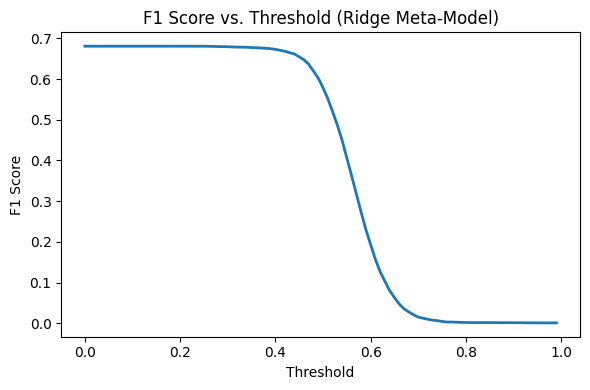


Best threshold = 0.21, F1 Score = 0.6811


In [269]:
# Tune threshold for Ridge on entire meta-training set
scaled_all = scaler_meta.fit_transform(X_prices_train_meta)
ridge_scores_all = ridge.predict(scaled_all)
thresholds = np.arange(0.0, 1.0, 0.01)
f1_scores = []
for T in thresholds:
    meta_pred = (ridge_scores_all >= T).astype(int)
    f1_scores.append(f1_score(y_prices_train_meta, meta_pred))

plt.figure(figsize=(6, 4))
plt.plot(thresholds, f1_scores, lw=2)
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. Threshold (Ridge Meta-Model)")
plt.tight_layout()
plt.show()

best_idx = np.nanargmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]
print(f"\nBest threshold = {best_threshold:.2f}, F1 Score = {best_f1:.4f}")


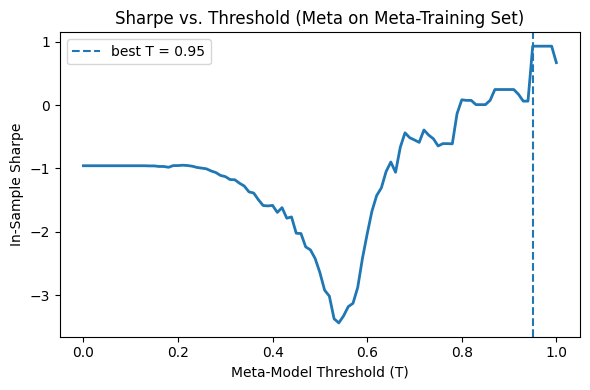


→ Best threshold by Sharpe = 0.95 (Sharpe = 0.9310)


In [270]:
# ─── A) Threshold Search by Sharpe (no TP/SL caps) ───

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

# 1) Re‐compute ridge raw scores on the ENTIRE meta‐training set:
scaled_all = scaler_meta.fit_transform(X_prices_train_meta)  # (n_samples, n_features)
ridge_scores_all = ridge.predict(scaled_all)                 # continuous scores (shape = n_samples,)

# 2) Pull out the primary (TCN) signal for meta‐training (∈ {-1,+1}):
#    We already stored this as "best_predictions" in prices_train_meta.
primary_signal = prices_train_meta["best_predictions"].iloc[:len(ridge_scores_all)].to_numpy()

# 3) Get the “close” price series aligned to meta‐training:
prices_meta = prices_train_meta["close"].iloc[:len(ridge_scores_all)].to_numpy()

# 4) Compute hourly returns on the meta‐training price series:
#    ret[i] = (price[i] / price[i-1]) − 1; set ret[0] = 0
rets = np.concatenate(([0.0], prices_meta[1:] / prices_meta[:-1] - 1.0))

# 5) Loop over thresholds and compute Sharpe for each:
thresholds = np.arange(0.0, 1.0 + 1e-9, 0.01)   # {0.00, 0.01, …, 1.00}
sharpe_values = []

for T in thresholds:
    # (a) meta‐prediction ∈ {0,1}
    meta_pred = (ridge_scores_all >= T).astype(int)   # shape = (n_samples,)
    # (b) final backtest signal ∈ {−1, 0, +1}
    final_signal = meta_pred * primary_signal         # elementwise multiply

    # (c) Strategy hourly returns (no clipping):
    strat_ret = final_signal * rets                   # shape = (n_samples,)

    # (d) Annualize: assume 252 trading days × 24 hours = 6048 “bars” per year
    ann_factor = 252 * 24
    mu = np.mean(strat_ret) * ann_factor
    sigma = np.std(strat_ret) * np.sqrt(ann_factor)
    sharpe = mu / sigma if sigma > 0 else 0.0

    sharpe_values.append(sharpe)

# 6) Plot Sharpe vs. Threshold
plt.figure(figsize=(6,4))
plt.plot(thresholds, sharpe_values, lw=2)
plt.xlabel("Meta‐Model Threshold (T)")
plt.ylabel("In‐Sample Sharpe")
plt.title("Sharpe vs. Threshold (Meta on Meta‐Training Set)")
plt.axvline(thresholds[np.nanargmax(sharpe_values)], ls="--",
            label=f"best T = {thresholds[np.nanargmax(sharpe_values)]:.2f}")
plt.legend()
plt.tight_layout()
plt.show()

# 7) Pick the threshold that maximizes Sharpe:
best_idx = np.nanargmax(sharpe_values)
best_T_by_sharpe = thresholds[best_idx]
best_sharpe = sharpe_values[best_idx]
print(f"\n→ Best threshold by Sharpe = {best_T_by_sharpe:.2f} (Sharpe = {best_sharpe:.4f})")


In [271]:
# ─── Block 7: Final Confusion Matrix for Meta-Model on Test Set ───

# 1) Define window_size consistently (same as used for TCN / meta‐model)
window_size = 30  

# 2) Prepare X_test_meta by dropping the first (window_size − 1) rows,
#    because SlidingWindowDataset produces labels only from index (window_size − 1) onward.
X_test_meta = X_test.iloc[window_size - 1 :].copy()

# 3) Add TCN test probabilities and mapped TCN predictions
X_test_meta['tcn_prob_0'] = tcn_year['test_probs'][:, 0]
X_test_meta['tcn_prob_1'] = tcn_year['test_probs'][:, 1]

mapped_test = tcn_year['test_preds'].copy()
mapped_test[mapped_test == 0] = -1
mapped_test[mapped_test == 1] = 1
X_test_meta['best_predictions'] = mapped_test


In [272]:
cols_to_drop = [
    'coin', 'regime',
    'ret_regime_1', 'cumret_regime_1', 'ret_regime_2',
    'cumret_regime_0', 'ret_regime_1', 'cumret_regime_1',
    'ret_regime_2', 'cumret_regime_2',
    'tVal', 'day', 't1','windowSize','year'
]
X_test_meta = X_test_meta.drop(columns=cols_to_drop, errors='ignore')

In [273]:

X_test_scaled = scaler_meta.transform(X_test_meta)

# 5) Obtain Ridge “scores” on the test set and apply the chosen threshold
ridge_scores_test = ridge.predict(X_test_scaled)
final_meta_pred = (ridge_scores_test >= 0.18).astype(int)  # ∈ {0,1}


y_test_aligned = y_test.iloc[window_size - 1 :].to_numpy()      # primary labels ∈ {–1,+1}
mapped_test_arr = mapped_test                                       # ∈ {–1,+1}
y_test_meta = (y_test_aligned * mapped_test_arr).astype(int)        # ∈ {–1,+1}×{–1,+1} ⇒ {+1,−1}
# Convert to {0,1}: meta‐label m = 1 if y_test_meta==+1 (correct direction), else 0
y_test_meta = (y_test_meta == 1).astype(int)                        # ∈ {0,1}

# 7) Compute confusion matrix of final_meta_pred vs true y_test_meta
cm_meta = confusion_matrix(y_test_meta, final_meta_pred)
print("Confusion Matrix: Meta-Model on Test Set")
print(cm_meta)



Confusion Matrix: Meta-Model on Test Set
[[3798  223]
 [4327  288]]


#### Backtesting

In [274]:
# ─── Block 8: Run Backtest on Final Signals ───

def run_backtest_with_tp_sl(df, tp_pct=0.02, sl_pct=0.02):
    """
    df must be in ascending time order, containing:
      • 'close'           (price at close of each bar)
      • 'y_hat_backtest'  (signal ∈ {+1, 0, -1} for NEXT bar)
    tp_pct, sl_pct: thresholds for profit and loss per bar.
    Returns df_with_metrics and metrics_dict.
    """
    df = df.copy()
    df['ret'] = df['close'].pct_change().fillna(0)
    df['signal'] = df['y_hat_backtest'].shift(1).fillna(0)
    df['raw_ret'] = df['signal'] * df['ret']
    df['strat_ret'] = df['raw_ret'].clip(lower=-sl_pct, upper=tp_pct)
    df['equity'] = (1 + df['strat_ret']).cumprod()
    df['bnh_equity'] = (1 + df['ret']).cumprod()

    df['rolling_max'] = df['equity'].cummax()
    df['drawdown'] = (df['equity'] - df['rolling_max']) / df['rolling_max']
    max_drawdown = df['drawdown'].min()

    freq = pd.infer_freq(df.index)
    if freq is None or freq.startswith('D'):
        annual_factor = 252
    elif freq.startswith('H'):
        annual_factor = 252 * 24
    elif freq.startswith('T') or freq.startswith('min'):
        annual_factor = 252 * 24 * 60
    else:
        annual_factor = 252

    total_return = df['equity'].iloc[-1] - 1
    n_years = len(df) / annual_factor
    cagr = df['equity'].iloc[-1] ** (1.0 / n_years) - 1
    ann_vol = df['strat_ret'].std() * np.sqrt(annual_factor)
    sharpe = cagr / ann_vol if ann_vol != 0 else np.nan

    neg_mask = df['strat_ret'] < 0
    if neg_mask.any():
        downside_dev = df.loc[neg_mask, 'strat_ret'].std() * np.sqrt(annual_factor)
    else:
        downside_dev = 0.0
    sortino = cagr / downside_dev if downside_dev != 0 else np.nan

    signal_arr = df['signal'].fillna(0).values
    hold_lengths = []
    current_len = 0
    for s in signal_arr:
        if s != 0:
            current_len += 1
        else:
            if current_len > 0:
                hold_lengths.append(current_len)
            current_len = 0
    if current_len > 0:
        hold_lengths.append(current_len)
    avg_holding = np.mean(hold_lengths) if hold_lengths else 0

    total_return_bnh = df['bnh_equity'].iloc[-1] - 1
    cagr_bnh = df['bnh_equity'].iloc[-1] ** (1.0 / n_years) - 1
    ann_vol_bnh = df['ret'].std() * np.sqrt(annual_factor)
    sharpe_bnh = cagr_bnh / ann_vol_bnh if ann_vol_bnh != 0 else np.nan

    metrics = {
        "CAGR_strategy":       cagr,
        "Volatility_strategy": ann_vol,
        "Sharpe_strategy":     sharpe,
        "Sortino_strategy":    sortino,
        "MaxDrawdown":         max_drawdown,
        "AvgHoldingBars":      avg_holding,
        "TotalReturn_strategy": total_return,
        "CAGR_BnH":            cagr_bnh,
        "Volatility_BnH":      ann_vol_bnh,
        "Sharpe_BnH":          sharpe_bnh,
        "TotalReturn_BnH":     total_return_bnh,
        "Years":               n_years
    }

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    ax1.plot(df.index, df['equity'], label="Strategy Equity", color="blue")
    ax1.plot(df.index, df['bnh_equity'], label="Buy & Hold Equity", color="gray", linestyle="--")
    ax1.set_ylabel("Cumulative Return")
    ax1.legend(loc="upper left")
    ax1.set_title("Equity Curves: Strategy vs. Buy & Hold")

    ax2.plot(df.index, df['drawdown'], color="red")
    ax2.fill_between(df.index, df['drawdown'], 0, color="red", alpha=0.3)
    ax2.set_ylabel("Drawdown")
    ax2.set_xlabel("Date")
    ax2.set_title("Strategy Drawdown")
    plt.tight_layout()
    plt.show()

    print("===== BACKTEST METRICS WITH TP & SL =====")
    print(f"Years                                   : {n_years:.2f}")
    print(f"Total Return (Strategy)    : {total_return:.2%}")
    print(f"CAGR (Strategy)            : {cagr:.4f}")
    print(f"Volatility (Strategy)      : {ann_vol:.4f}")
    print(f"Sharpe (Strategy)          : {sharpe:.4f}")
    print(f"Sortino (Strategy)         : {sortino:.4f}")
    print(f"Max Drawdown               : {max_drawdown:.4f}")
    print(f"Avg Holding Period (bars)  : {avg_holding:.2f}")
    print(f"Total Return (Buy & Hold)  : {total_return_bnh:.2%}")
    print(f"CAGR (Buy & Hold)          : {cagr_bnh:.4f}")
    print(f"Volatility (Buy & Hold)    : {ann_vol_bnh:.4f}")
    print(f"Sharpe (Buy & Hold)        : {sharpe_bnh:.4f}")
    print("=" * 40)

    return df, metrics



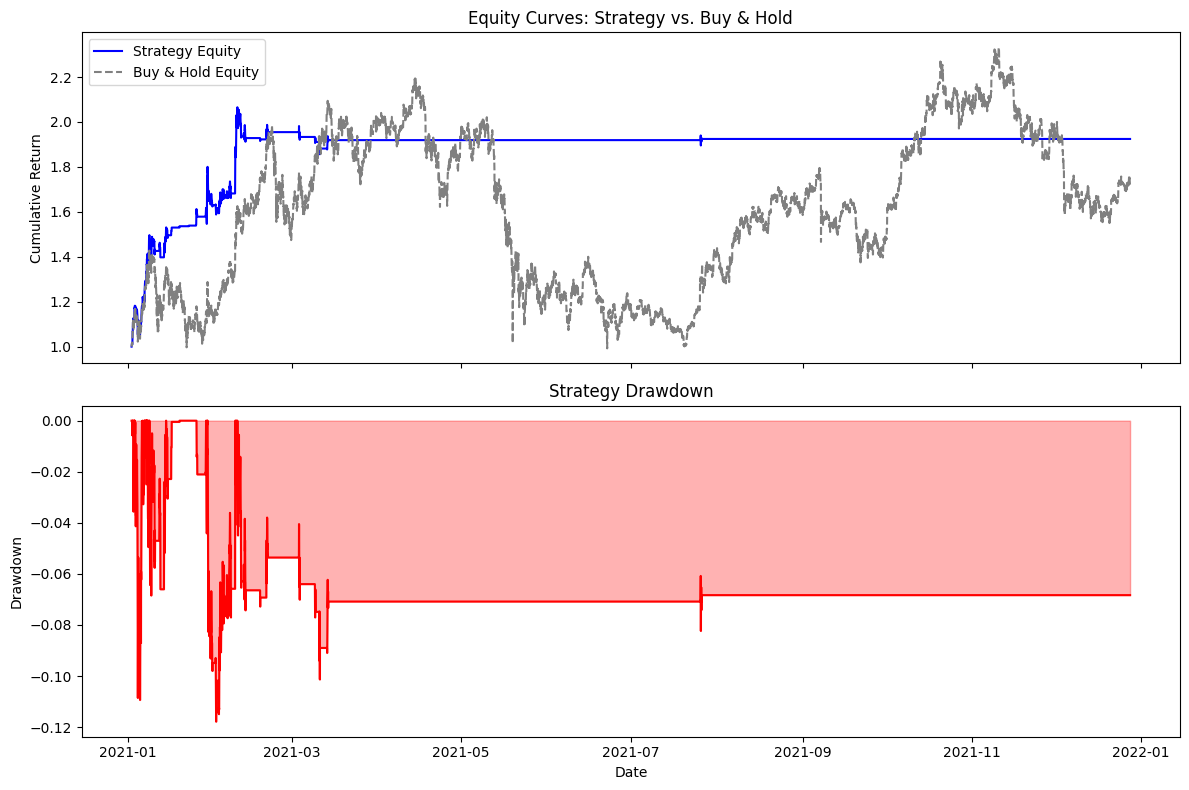

===== BACKTEST METRICS WITH TP & SL =====
Years                                   : 34.27
Total Return (Strategy)    : 92.45%
CAGR (Strategy)            : 0.0193
Volatility (Strategy)      : 0.0501
Sharpe (Strategy)          : 0.3852
Sortino (Strategy)         : 0.1724
Max Drawdown               : -0.1179
Avg Holding Period (bars)  : 12.78
Total Return (Buy & Hold)  : 71.63%
CAGR (Buy & Hold)          : 0.0159
Volatility (Buy & Hold)    : 0.1604
Sharpe (Buy & Hold)        : 0.0991
{'CAGR_strategy': 0.01928697416158376, 'Volatility_strategy': 0.050075482093368165, 'Sharpe_strategy': 0.3851580325402012, 'Sortino_strategy': 0.1724487189181078, 'MaxDrawdown': -0.11785259579257437, 'AvgHoldingBars': 12.775, 'TotalReturn_strategy': 0.9245041649741683, 'CAGR_BnH': 0.01588653891440228, 'Volatility_BnH': 0.16038000796420107, 'Sharpe_BnH': 0.09905560621962536, 'TotalReturn_BnH': 0.7162640797811597, 'Years': 34.26984126984127}


<Axes: title={'center': 'Drawdown'}, xlabel='date'>

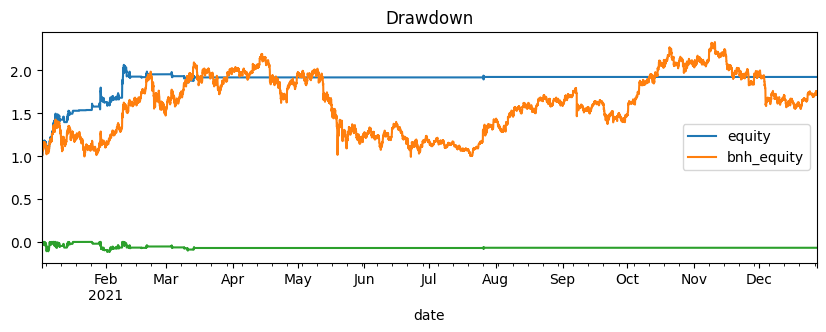

In [275]:
# 1) Assume you already have:
#    • prices: a DataFrame indexed by datetime with a "close" column
#    • X_test_meta: the DataFrame of test‐features (after dropping first window_size−1 rows)
#      which now contains:
#         – "tcn_prob_0", "tcn_prob_1"
#         – "best_predictions"  (primary model signal ∈ {-1, +1})
#    • final_meta_pred: a NumPy array (shape = len(X_test_meta), dtype=int) containing {0,1}
#      from your thresholded Ridge output.
#
#    We want to form y_hat_backtest = final_meta_pred * best_predictions  ∈ {−1, 0, +1}.

# 2) Create “y_hat_backtest” by multiplying:
mapped_primary = X_test_meta["best_predictions"].to_numpy()  # ∈ {-1,+1}
meta_filter   = final_meta_pred                              # ∈ {0,1}

#   If meta_filter[i] == 1 → keep primary[i] (±1)
#   If meta_filter[i] == 0 → go flat (0)
y_hat = meta_filter * mapped_primary                         # shape = (n_test_samples,)

# 3) Build a small DataFrame indexed exactly like X_test_meta (datetime‐index),
#    containing “close” and our final “y_hat_backtest” signal:
df_backtest = pd.DataFrame({
    "close":            prices.loc[X_test_meta.index, "close"],    # pull matching timestamps
    "y_hat_backtest":   y_hat
}, index=X_test_meta.index)

# 4) Sanity‐check: make sure there are no NaNs and index is sorted ascending:
df_backtest = df_backtest.sort_index()
assert df_backtest["y_hat_backtest"].isnull().sum() == 0, "Signal column contains NaNs!"

# 5) Now simply call the backtest function. For example, use a 2% TP/SL:
df_with_metrics, backtest_metrics = run_backtest_with_tp_sl(df_backtest, tp_pct=0.7, sl_pct=0.025)

# 6) Inspect output:
print(backtest_metrics)
# If you want to visualize the equity vs. buy‐and‐hold:
df_with_metrics[["equity", "bnh_equity"]].plot(figsize=(10, 5), title="Equity Curves")
df_with_metrics["drawdown"].plot(figsize=(10, 3), title="Drawdown")




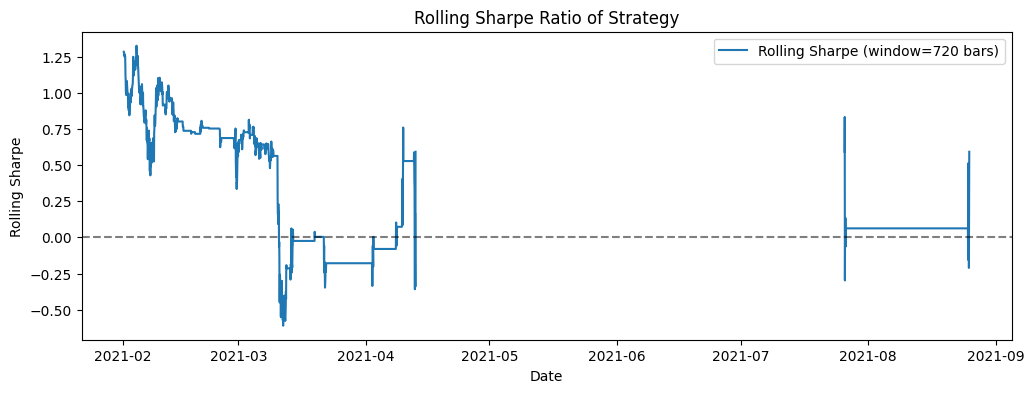

In [276]:
# Choose a rolling window (in bars). 
# If data is hourly, 24 × 30 = 720 bars ≈ one calendar month.
rolling_window_bars = 720  

# Compute rolling mean and rolling std of strat_ret
rolling_mean      = df_with_metrics['strat_ret'].rolling(window=rolling_window_bars).mean()
rolling_std       = df_with_metrics['strat_ret'].rolling(window=rolling_window_bars).std()

# Annualize: sqrt(annual_factor) * rolling_std. Use the same annual_factor as before.
freq = pd.infer_freq(df_with_metrics.index)
if freq is None or freq.startswith('D'):
    annual_factor = 252
elif freq.startswith('H'):
    annual_factor = 252 * 24
elif freq.startswith('T') or freq.startswith('min'):
    annual_factor = 252 * 24 * 60
else:
    annual_factor = 252

rolling_sharpe = (rolling_mean * annual_factor) / (rolling_std * np.sqrt(annual_factor))

plt.figure(figsize=(12, 4))
plt.plot(df_with_metrics.index, rolling_sharpe, label=f"Rolling Sharpe (window={rolling_window_bars} bars)")
plt.axhline(0, color='black', alpha=0.5, linestyle='--')
plt.ylabel("Rolling Sharpe")
plt.xlabel("Date")
plt.title("Rolling Sharpe Ratio of Strategy")
plt.legend()
plt.show()


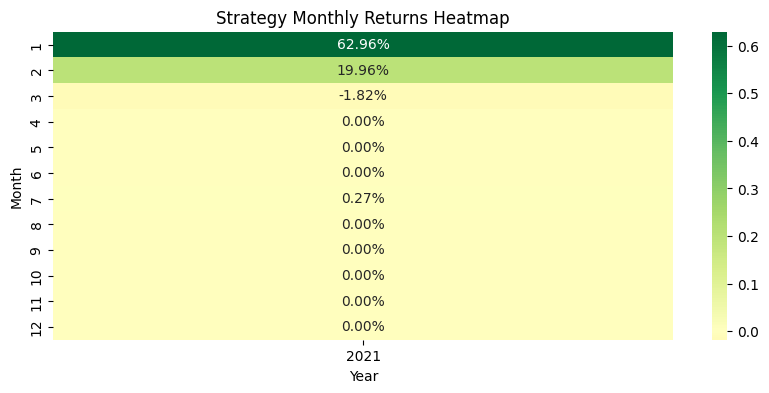

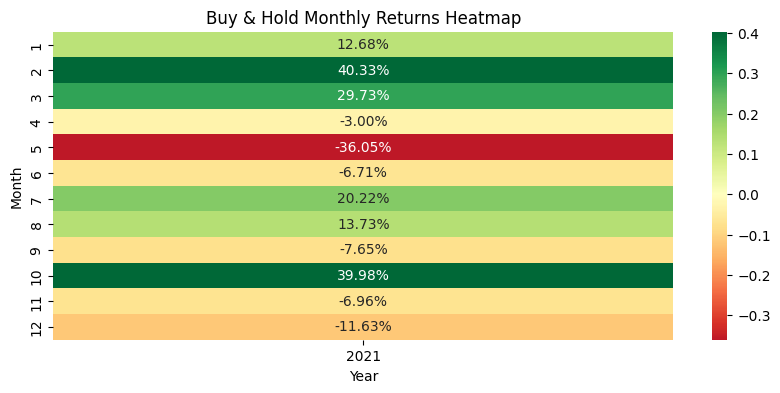

In [277]:
# Compute calendar‐month returns for strategy and BnH
df = df_with_metrics.copy()
df['year']  = df.index.year
df['month'] = df.index.month

# For each (year, month), take the last equity value and divide by the first equity value
# within that calendar‐month to get the month’s return.
monthly = df.groupby(['year', 'month']).agg({
    'equity': 'last',
    'bnh_equity': 'last'
})
# We also need the first equity for each month
monthly_first = df.groupby(['year', 'month']).agg({
    'equity': 'first',
    'bnh_equity': 'first'
}).rename(columns={'equity':'equity_first','bnh_equity':'bnh_first'})

monthly = monthly.join(monthly_first)
monthly['strat_month_return'] = monthly['equity'] / monthly['equity_first'] - 1
monthly['bnh_month_return']   = monthly['bnh_equity'] / monthly['bnh_first'] - 1

# Pivot to a year×month DataFrame for heatmap
strat_ret_pivot = monthly['strat_month_return'].unstack(level=0)  # index=month, columns=year
bnh_ret_pivot   = monthly['bnh_month_return'].unstack(level=0)

import seaborn as sns

plt.figure(figsize=(10, 4))
sns.heatmap(strat_ret_pivot, annot=True, fmt=".2%", cmap="RdYlGn", center=0)
plt.title("Strategy Monthly Returns Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

plt.figure(figsize=(10, 4))
sns.heatmap(bnh_ret_pivot, annot=True, fmt=".2%", cmap="RdYlGn", center=0)
plt.title("Buy & Hold Monthly Returns Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()


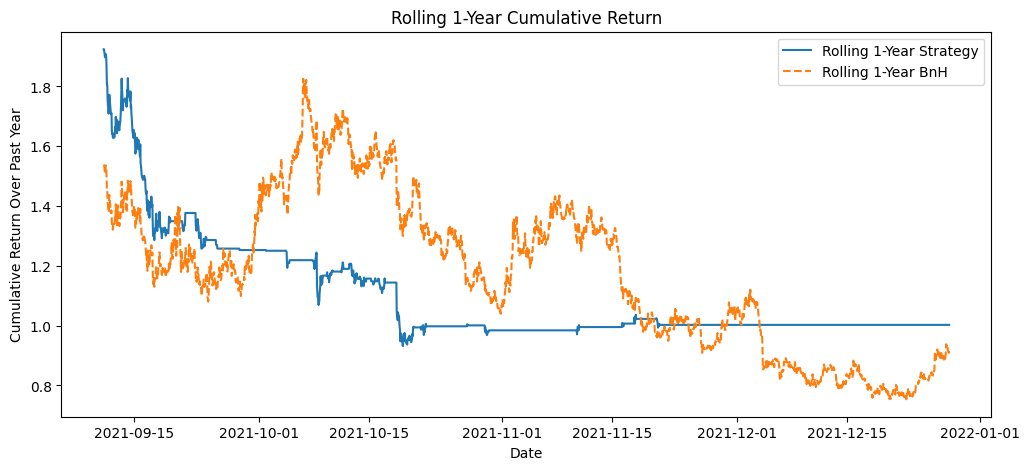

In [278]:
# Rolling 30-day cumulative return: for an hourly series that is 30×24 = 720 bars
rolling_window = 252 * 24  # e.g. a full “annual” in hour units, or choose 720 for roughly 30 days.

df = df_with_metrics.copy()
df['rolling_strat_equity'] = df['strat_ret'].add(1).rolling(window=rolling_window).apply(np.prod, raw=True)
df['rolling_bnh_equity']   = df['ret'].add(1).rolling(window=rolling_window).apply(np.prod, raw=True)

plt.figure(figsize=(12, 5))
plt.plot(df.index, df['rolling_strat_equity'], label="Rolling 1‐Year Strategy")
plt.plot(df.index, df['rolling_bnh_equity'],   label="Rolling 1‐Year BnH", linestyle='--')
plt.title("Rolling 1-Year Cumulative Return")
plt.ylabel("Cumulative Return Over Past Year")
plt.xlabel("Date")
plt.legend()
plt.show()


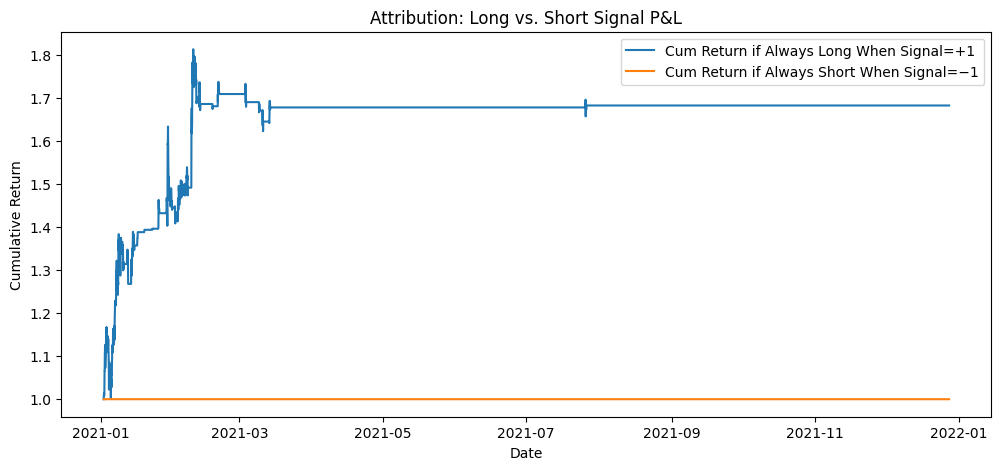

In [279]:
df = df_with_metrics.copy()

# Separate returns based on the prior bar’s signal
long_mask  = df['signal'] == 1
short_mask = df['signal'] == -1

long_returns  = df.loc[long_mask,  'ret']
short_returns = df.loc[short_mask, 'ret']

# Cumulative returns of being long-only
cum_long = (1 + long_returns).cumprod().reindex(df.index, method='ffill').fillna(1)
# Cumulative returns of being short-only
cum_short = (1 - short_returns).cumprod().reindex(df.index, method='ffill').fillna(1)

plt.figure(figsize=(12, 5))
plt.plot(df.index, cum_long,  label="Cum Return if Always Long When Signal=+1")
plt.plot(df.index, cum_short, label="Cum Return if Always Short When Signal=−1")
plt.title("Attribution: Long vs. Short Signal P&L")
plt.ylabel("Cumulative Return")
plt.xlabel("Date")
plt.legend()
plt.show()
